In [1]:
# high  r2, adj r2, assumptions of lr, mean error

In [2]:
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.style.use('ggplot')

In [5]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\GitHub_projects\\IITR\\Assignements'

# Problem statement

# Data Acquisition

In [6]:
df = pd.read_csv("car_price.csv")
df.head()

symboling normalized_losses Fuel_type make num_of_doors   aspiration  \
0          3                 ?       gas  std          two  convertible   
1          3                 ?       gas  std          two  convertible   
2          1                 ?       gas  std          two    hatchback   
3          2               164       gas  std         four        sedan   
4          2               164       gas  std         four        sedan   

  wheel_base engine_location  drive_wheels   body_style  length  width  \
0        rwd           front          88.6  alfa-romero   168.8   64.1   
1        rwd           front          88.6  alfa-romero   168.8   64.1   
2        rwd           front          94.5  alfa-romero   171.2   65.5   
3        fwd           front          99.8         audi   176.6   66.2   
4        4wd           front          99.4         audi   176.6   66.4   

   height  curb_weight engine_type num_of_cylinders  engine_size fuel_system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   
2    52.4         2823        ohcv              six          152        mpfi   
3    54.3         2337         ohc             four          109        mpfi   
4    54.3         2824         ohc             five          136        mpfi   

   bore stroke  compression_ratio horsepower peak_rpm  city_mpg  highway_mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  3.47   2.68                9.0        111     5000        21           27   
2  2.68   3.47                9.0        154     5000        19           26   
3  3.19    3.4               10.0        102     5500        24           30   
4  3.19    3.4                8.0        115     5500        18           22   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450

In [7]:
df.columns

Index(['symboling', 'normalized_losses', 'Fuel_type', 'make', 'num_of_doors',
       'aspiration', 'wheel_base', 'engine_location', 'drive_wheels',
       'body_style', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [8]:
print("Number of Rows:" , df.shape[0])
print("Number of Columns:" , df.shape[1])

Number of Rows: 205
Number of Columns: 26


In [9]:
categorical = list(df.select_dtypes(include="object").columns)
print("Categorical features:\n", categorical)
print("\n")
numerical = list(df.select_dtypes (exclude = "object").columns)
print ("Continous features:\n", numerical)

Categorical features:
 ['normalized_losses', 'Fuel_type', 'make', 'num_of_doors', 'aspiration', 'wheel_base', 'engine_location', 'body_style', 'engine_type', 'num_of_cylinders', 'fuel_system', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']


Continous features:
 ['symboling', 'drive_wheels', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'compression_ratio', 'city_mpg', 'highway_mpg']


In [10]:
# Five point Summary of numerical attributes
df.describe().T

count         mean         std     min     25%     50%  \
symboling          205.0     0.834146    1.245307    -2.0     0.0     1.0   
drive_wheels       205.0    98.756585    6.021776    86.6    94.5    97.0   
length             205.0   174.049268   12.337289   141.1   166.3   173.2   
width              205.0    65.907805    2.145204    60.3    64.1    65.5   
height             205.0    53.724878    2.443522    47.8    52.0    54.1   
curb_weight        205.0  2555.565854  520.680204  1488.0  2145.0  2414.0   
engine_size        205.0   126.907317   41.642693    61.0    97.0   120.0   
compression_ratio  205.0    10.142537    3.972040     7.0     8.6     9.0   
city_mpg           205.0    25.219512    6.542142    13.0    19.0    24.0   
highway_mpg        205.0    30.751220    6.886443    16.0    25.0    30.0   

                      75%     max  
symboling             2.0     3.0  
drive_wheels        102.4   120.9  
length              183.1   208.1  
width                66.9    72.3  
height               55.5    59.8  
curb_weight        2935.0  4066.0  
engine_size         141.0   326.0  
compression_ratio     9.4    23.0  
city_mpg             30.0    49.0  
highway_mpg          34.0    54.0

In [11]:
# Five point Summary of cattegorical attributes
df.describe(include="object").T

count unique     top freq
normalized_losses   205     52       ?   41
Fuel_type           205      2     gas  185
make                205      2     std  168
num_of_doors        205      3    four  114
aspiration          205      5   sedan   96
wheel_base          205      3     fwd  120
engine_location     205      2   front  202
body_style          205     22  toyota   32
engine_type         205      7     ohc  148
num_of_cylinders    205      7    four  159
fuel_system         205      8    mpfi   94
bore                205     39    3.62   23
stroke              205     37     3.4   20
horsepower          205     60      68   19
peak_rpm            205     24    5500   37
price               205    187       ?    4

# Data Preparation

## Null Values

In [12]:
df.isnull().sum()

symboling            0
normalized_losses    0
Fuel_type            0
make                 0
num_of_doors         0
aspiration           0
wheel_base           0
engine_location      0
drive_wheels         0
body_style           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [13]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

In [14]:
# As we have seen, that there are no Null values in the dataset, but we do have mixed values which need to be handled.

## Check for Mixed Values

In [15]:
for i in df.describe(include="all"):
    print(" ")
    print("**********",i,"**********")
    print(df[i].unique())
    print(" ")

 
********** symboling **********
[ 3  1  2  0 -1 -2]
 
 
********** normalized_losses **********
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
 
 
********** Fuel_type **********
['gas' 'diesel']
 
 
********** make **********
['std' 'turbo']
 
 
********** num_of_doors **********
['two' 'four' '?']
 
 
********** aspiration **********
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
 
 
********** wheel_base **********
['rwd' 'fwd' '4wd']
 
 
********** engine_location **********
['front' 'rear']
 
 
********** drive_wheels **********
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  9

In [16]:
# normalized_losses: "?"
# num_of_doors: "?"
# bore: "?"
# stroke: "?"
# horsepower: "?"
# peak_rpm: "?"
# price: "?"

# Looks like all the mixed values are "?"

In [17]:
# Replacing "?" with np.nan()

for i in df.select_dtypes(include="object"):
    print(" ")
    print("**********",i,"**********")
    print(df[i].unique())
    print(" ")

 
********** normalized_losses **********
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
 
 
********** Fuel_type **********
['gas' 'diesel']
 
 
********** make **********
['std' 'turbo']
 
 
********** num_of_doors **********
['two' 'four' '?']
 
 
********** aspiration **********
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
 
 
********** wheel_base **********
['rwd' 'fwd' '4wd']
 
 
********** engine_location **********
['front' 'rear']
 
 
********** body_style **********
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
 
 
********** engine_type *********

In [18]:
df.replace("?",np.nan, inplace=True)

In [19]:
df.head()

symboling normalized_losses Fuel_type make num_of_doors   aspiration  \
0          3               NaN       gas  std          two  convertible   
1          3               NaN       gas  std          two  convertible   
2          1               NaN       gas  std          two    hatchback   
3          2               164       gas  std         four        sedan   
4          2               164       gas  std         four        sedan   

  wheel_base engine_location  drive_wheels   body_style  length  width  \
0        rwd           front          88.6  alfa-romero   168.8   64.1   
1        rwd           front          88.6  alfa-romero   168.8   64.1   
2        rwd           front          94.5  alfa-romero   171.2   65.5   
3        fwd           front          99.8         audi   176.6   66.2   
4        4wd           front          99.4         audi   176.6   66.4   

   height  curb_weight engine_type num_of_cylinders  engine_size fuel_system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   
2    52.4         2823        ohcv              six          152        mpfi   
3    54.3         2337         ohc             four          109        mpfi   
4    54.3         2824         ohc             five          136        mpfi   

   bore stroke  compression_ratio horsepower peak_rpm  city_mpg  highway_mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  3.47   2.68                9.0        111     5000        21           27   
2  2.68   3.47                9.0        154     5000        19           26   
3  3.19    3.4               10.0        102     5500        24           30   
4  3.19    3.4                8.0        115     5500        18           22   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450

In [20]:
df.isnull().sum()

symboling             0
normalized_losses    41
Fuel_type             0
make                  0
num_of_doors          2
aspiration            0
wheel_base            0
engine_location       0
drive_wheels          0
body_style            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [21]:
df.isnull().sum()[df.isnull().sum()!=0]

normalized_losses    41
num_of_doors          2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   Fuel_type          205 non-null    object 
 3   make               205 non-null    object 
 4   num_of_doors       203 non-null    object 
 5   aspiration         205 non-null    object 
 6   wheel_base         205 non-null    object 
 7   engine_location    205 non-null    object 
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

## Imputation

In [23]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

### Normalized Losses

In [24]:
df["normalized_losses"] = pd.to_numeric(df["normalized_losses"], downcast="integer")

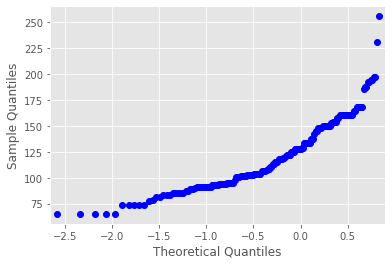

ShapiroResult(statistic=nan, pvalue=1.0)


In [25]:
qqplot(df["normalized_losses"], line='s')
plt.show()
print(shapiro(df["normalized_losses"]))

In [26]:
# Normalized_Losses is Non-Normal.

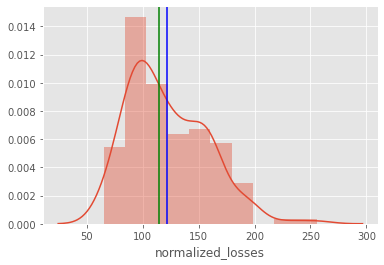

In [27]:
sns.distplot(df["normalized_losses"])
plt.axvline(x=df["normalized_losses"].mean(), color="b")
plt.axvline(x=df["normalized_losses"].median(), color="g")
plt.show()

In [28]:
# The normalized_losses data is slightly right-skewed, so we will impute values using median()

In [29]:
df["normalized_losses"].fillna(df["normalized_losses"].median(), inplace=True)

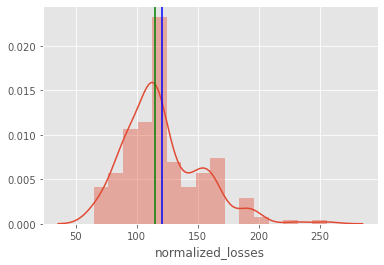

In [30]:
sns.distplot(df["normalized_losses"])
plt.axvline(x=df["normalized_losses"].mean(), color="b")
plt.axvline(x=df["normalized_losses"].median(), color="g")
plt.show()

### Number of Doors

In [31]:
df["num_of_doors"].mode()

0    four
dtype: object

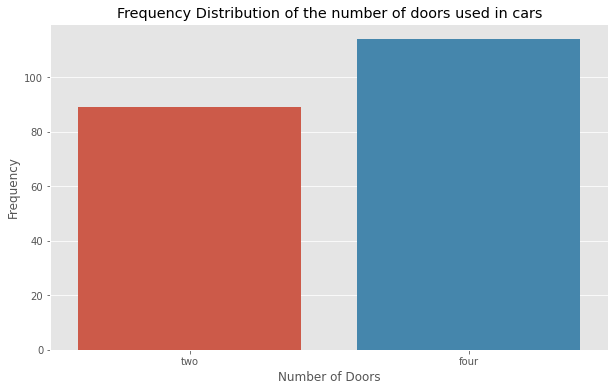

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(df["num_of_doors"])
plt.xlabel("Number of Doors")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of the number of doors used in cars")
plt.show()

In [33]:
df["num_of_doors"].replace({np.nan:"four"}, inplace=True)

### Bore

In [34]:
df["bore"] = pd.to_numeric(df["bore"], downcast="float")

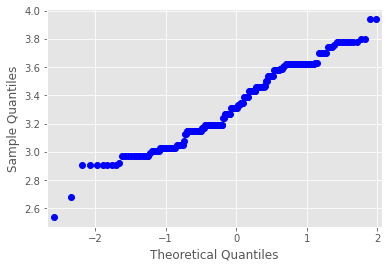

ShapiroResult(statistic=nan, pvalue=1.0)


In [35]:
qqplot(df["bore"], line='s')
plt.show()
print(shapiro(df["bore"]))

In [36]:
# Bore is Non-Normal.

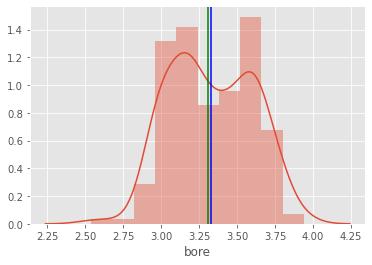

In [37]:
sns.distplot(df["bore"])
plt.axvline(x=df["bore"].mean(), color="b")
plt.axvline(x=df["bore"].median(), color="g")
plt.show()

In [38]:
# The data seems bimodal

In [39]:
df["bore"].fillna(df["bore"].median(), inplace=True)

### Stroke

In [40]:
df["stroke"] = pd.to_numeric(df["stroke"], downcast="float")

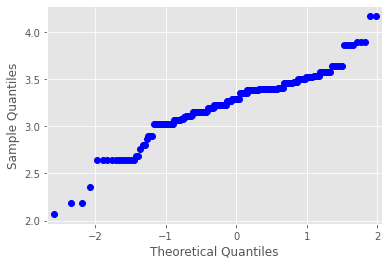

ShapiroResult(statistic=nan, pvalue=1.0)


In [41]:
qqplot(df["stroke"], line='s')
plt.show()
print(shapiro(df["stroke"]))

In [42]:
# Stroke is Non-Normal.

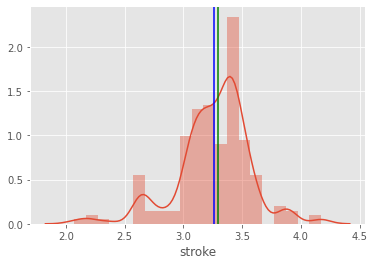

In [43]:
sns.distplot(df["stroke"])
plt.axvline(x=df["stroke"].mean(), color="b")
plt.axvline(x=df["stroke"].median(), color="g")
plt.show()

In [44]:
# The data seems left-skewed

In [45]:
df["stroke"].fillna(df["stroke"].median(), inplace=True)

#### Horsepower

In [46]:
df["horsepower"] = pd.to_numeric(df["horsepower"], downcast="integer")

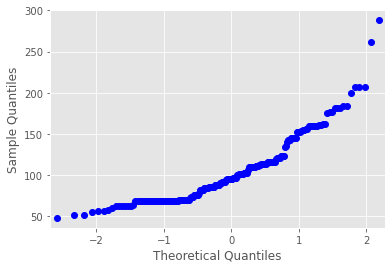

ShapiroResult(statistic=nan, pvalue=1.0)


In [47]:
qqplot(df["horsepower"], line='s')
plt.show()
print(shapiro(df["horsepower"]))

In [48]:
# Horsepower is Non-Normal.

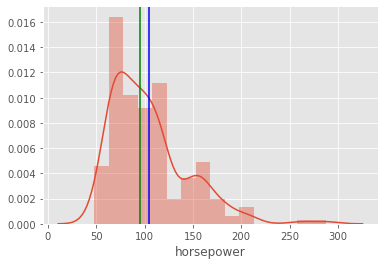

In [49]:
sns.distplot(df["horsepower"])
plt.axvline(x=df["horsepower"].mean(), color="b")
plt.axvline(x=df["horsepower"].median(), color="g")
plt.show()

In [50]:
# The horsepower is slightly right-skewed, so we will impute values using median()

In [51]:
df["horsepower"].fillna(df["horsepower"].median(), inplace=True)

#### Peak RPM

In [52]:
df["peak_rpm"] = pd.to_numeric(df["peak_rpm"], downcast="integer", errors="coerce")

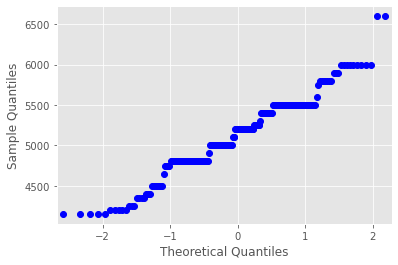

ShapiroResult(statistic=nan, pvalue=1.0)


In [53]:
qqplot(df["peak_rpm"], line='s')
plt.show()
print(shapiro(df["peak_rpm"]))

In [54]:
# peak_rpm is Non-Normal.

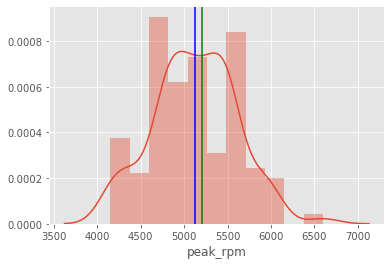

In [55]:
sns.distplot(df["peak_rpm"])
plt.axvline(x=df["peak_rpm"].mean(), color="b")
plt.axvline(x=df["peak_rpm"].median(), color="g")
plt.show()

In [56]:
# The peak_rpm seems bimodal.

In [57]:
df["peak_rpm"].fillna(df["peak_rpm"].median(), inplace=True)

#### Price

In [58]:
df["price"] = pd.to_numeric(df["price"], downcast="integer", errors="coerce")

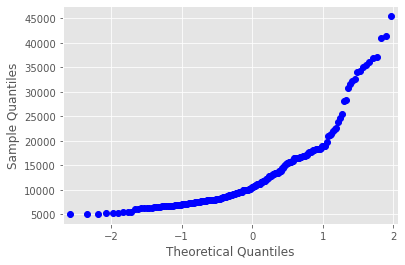

ShapiroResult(statistic=nan, pvalue=1.0)


In [59]:
qqplot(df["price"], line='s')
plt.show()
print(shapiro(df["price"]))

In [60]:
# price is Non-Normal.

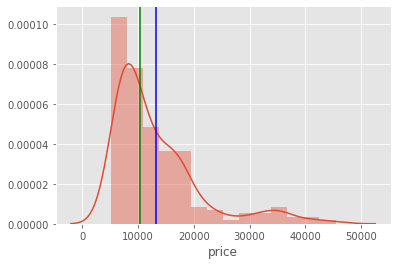

In [61]:
sns.distplot(df["price"])
plt.axvline(x=df["price"].mean(), color="b")
plt.axvline(x=df["price"].median(), color="g")
plt.show()

In [62]:
# The data is right-skewed.

In [63]:
df["price"].fillna(df["price"].median(), inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    float64
 2   Fuel_type          205 non-null    object 
 3   make               205 non-null    object 
 4   num_of_doors       205 non-null    object 
 5   aspiration         205 non-null    object 
 6   wheel_base         205 non-null    object 
 7   engine_location    205 non-null    object 
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

## Relationships between Continuous Variables

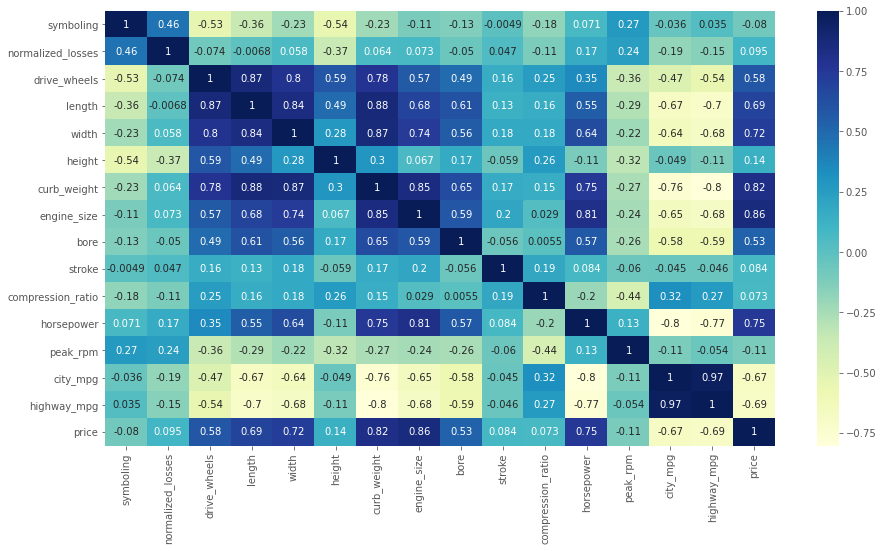

In [65]:
corr=df.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.show()

In [66]:
# Correlation measures relationaship between 2 continuous variables.

# The best predictors of price of a car seem to be:
# The price of a car seem to be directly proportional (strong to moderately) to engine_size, curb_weight, horsepower, width, length drive_wheels and bore of the car
# The prie of a car seems to be inversely proportional (moderately) to the highway_mpg, city_mpg
# We also see high level of multi-coolineariy between predictors: drive_wheels, length, width, curb_weight, horsepower, city_mpg, highway_mpg

# Univariate Analysis

## Converting Categoric to Numeric

In [67]:
for i in df.describe(include="object"):
    print(" ")
    print("**********",i,"**********")
    print(df[i].value_counts(normalize=True)*100)
    print(" ")

 
********** Fuel_type **********
gas       90.243902
diesel     9.756098
Name: Fuel_type, dtype: float64
 
 
********** make **********
std      81.95122
turbo    18.04878
Name: make, dtype: float64
 
 
********** num_of_doors **********
four    56.585366
two     43.414634
Name: num_of_doors, dtype: float64
 
 
********** aspiration **********
sedan          46.829268
hatchback      34.146341
wagon          12.195122
hardtop         3.902439
convertible     2.926829
Name: aspiration, dtype: float64
 
 
********** wheel_base **********
fwd    58.536585
rwd    37.073171
4wd     4.390244
Name: wheel_base, dtype: float64
 
 
********** engine_location **********
front    98.536585
rear      1.463415
Name: engine_location, dtype: float64
 
 
********** body_style **********
toyota           15.609756
nissan            8.780488
mazda             8.292683
honda             6.341463
mitsubishi        6.341463
volkswagen        5.853659
subaru            5.853659
peugot            5.365854
vol

In [68]:
# Nominal: All the Categoric attributtes are Nominal 

# We will use One Hot Encoding to handle Nominal data, as we dont want to induce order to the data using Label Encoding
# Either Nominal or Ordinal data, we can use replace() to handle dichotomous categorical data

### Nominal

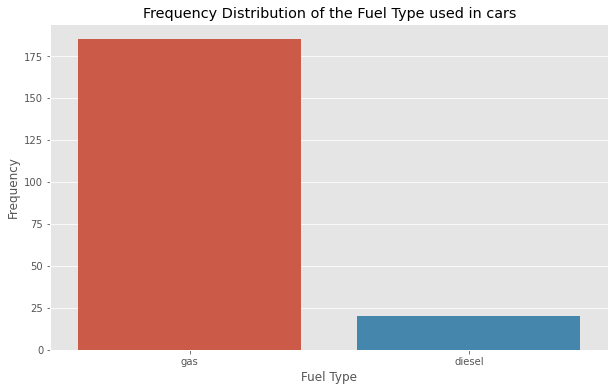

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(df["Fuel_type"])
plt.xlabel("Fuel Type")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of the Fuel Type used in cars")
plt.show()

In [70]:
# We can use the replace() to convert "Y" to 1 in Over18 and for OverTime
df["Fuel_type"].replace({"gas":1, "diesel":0}, inplace=True)

In [71]:
df["Fuel_type"].value_counts()

1    185
0     20
Name: Fuel_type, dtype: int64

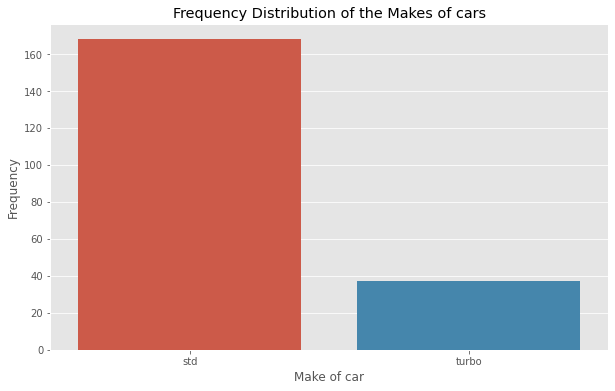

In [72]:
plt.figure(figsize=(10, 6))
sns.countplot(df["make"])
plt.xlabel("Make of car")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of the Makes of cars")
plt.show()

In [73]:
df["make"].replace({"std":1, "turbo":0}, inplace=True)

In [74]:
df["make"].value_counts()

1    168
0     37
Name: make, dtype: int64

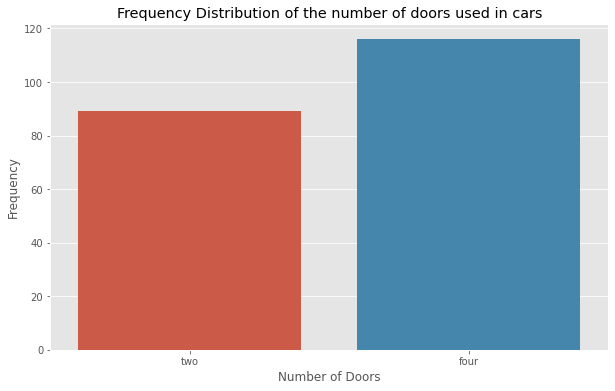

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(df["num_of_doors"])
plt.xlabel("Number of Doors")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of the number of doors used in cars")
plt.show()

In [76]:
df["num_of_doors"].replace({"four":1, "two":0}, inplace=True)

In [77]:
df["num_of_doors"].value_counts()

1    116
0     89
Name: num_of_doors, dtype: int64

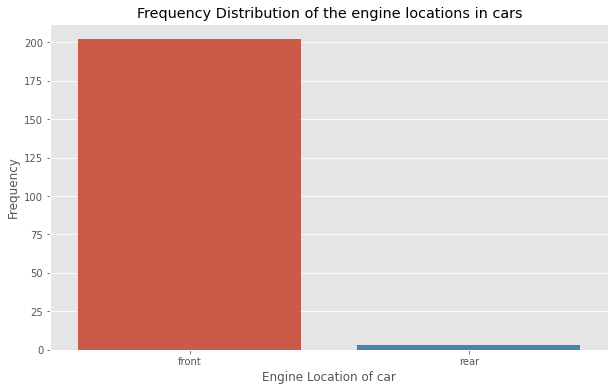

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(df["engine_location"])
plt.xlabel("Engine Location of car")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of the engine locations in cars")
plt.show()

In [79]:
df["engine_location"].replace({"front":1, "rear":0}, inplace=True)

In [80]:
df["engine_location"].value_counts()

1    202
0      3
Name: engine_location, dtype: int64

In [81]:
df.dtypes

symboling              int64
normalized_losses    float64
Fuel_type              int64
make                   int64
num_of_doors           int64
aspiration            object
wheel_base            object
engine_location        int64
drive_wheels         float64
body_style            object
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float32
stroke               float32
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

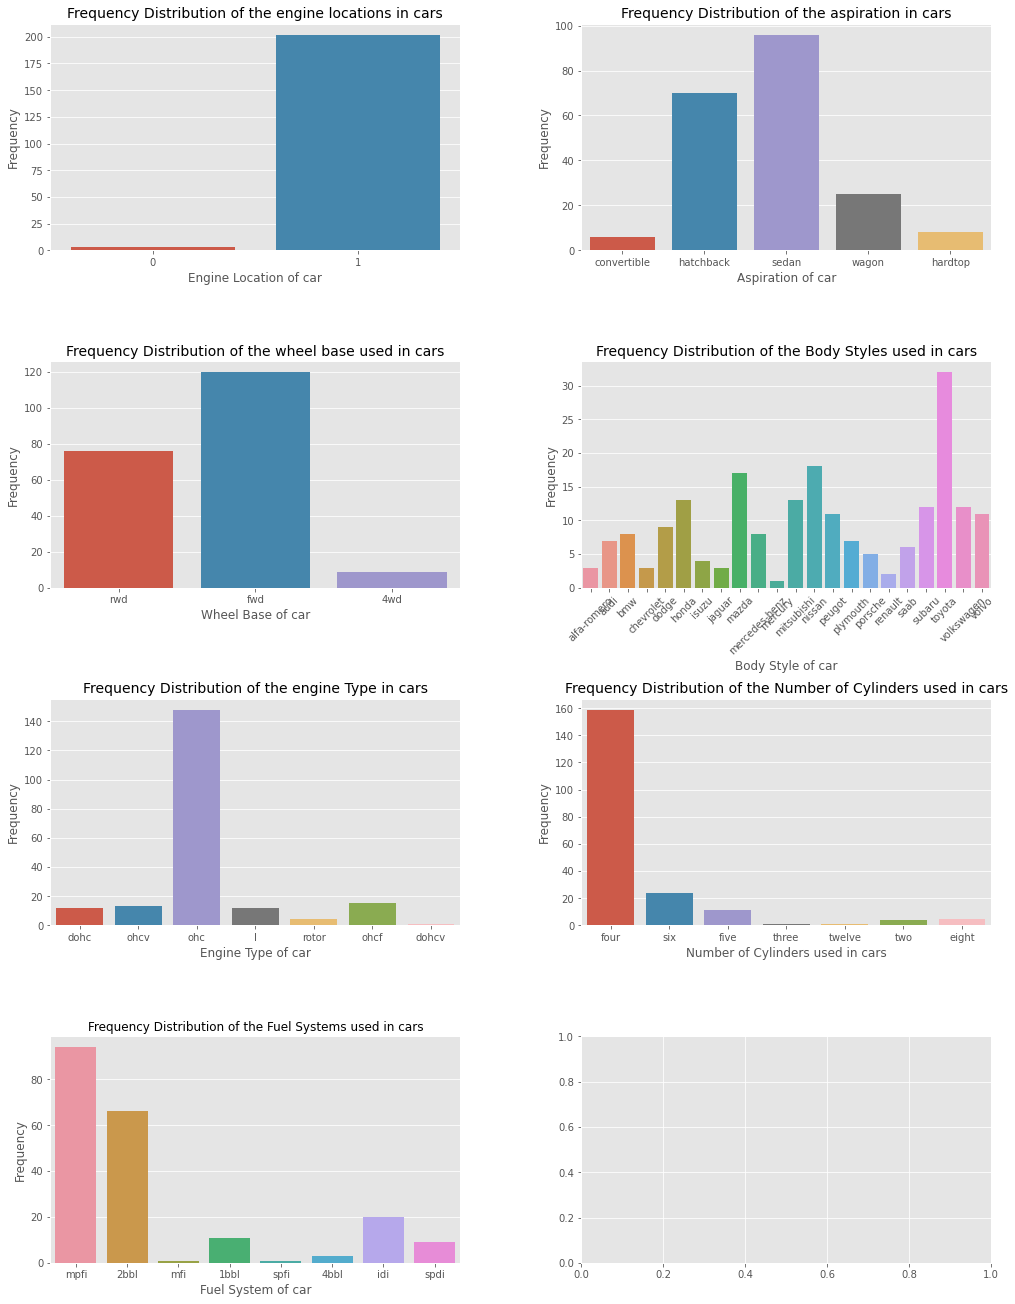

In [82]:
fig, ax =  plt.subplots(4, 2, figsize=(16, 20))

fig.tight_layout(pad=9.0)

sns.countplot(df["engine_location"], ax=ax[0][0])
ax[0][0].set_xlabel("Engine Location of car")
ax[0][0].set_ylabel("Frequency")
ax[0][0].set_title("Frequency Distribution of the engine locations in cars", size=14)

sns.countplot(df["aspiration"], ax=ax[0][1])
ax[0][1].set_xlabel("Aspiration of car")
ax[0][1].set_ylabel("Frequency")
ax[0][1].set_title("Frequency Distribution of the aspiration in cars", size=14)

sns.countplot(df["wheel_base"], ax=ax[1][0])
ax[1][0].set_xlabel("Wheel Base of car")
ax[1][0].set_ylabel("Frequency")
ax[1][0].set_title("Frequency Distribution of the wheel base used in cars", size=14)

sns.countplot(df["body_style"], ax=ax[1][1])
ax[1][1].set_xlabel("Body Style of car")
ax[1][1].set_ylabel("Frequency")
ax[1][1].set_title("Frequency Distribution of the Body Styles used in cars", size=14)
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), rotation="45")


sns.countplot(df["engine_type"], ax=ax[2][0])
ax[2][0].set_xlabel("Engine Type of car")
ax[2][0].set_ylabel("Frequency")
ax[2][0].set_title("Frequency Distribution of the engine Type in cars", size=14)

sns.countplot(df["num_of_cylinders"], ax=ax[2][1])
ax[2][1].set_xlabel("Number of Cylinders used in cars")
ax[2][1].set_ylabel("Frequency")
ax[2][1].set_title("Frequency Distribution of the Number of Cylinders used in cars", size=14)

sns.countplot(df["fuel_system"], ax=ax[3][0])
ax[3][0].set_xlabel("Fuel System of car")
ax[3][0].set_ylabel("Frequency")
ax[3][0].set_title("Frequency Distribution of the Fuel Systems used in cars", size=12)

plt.show()

Insights from Categoric Predictors:
* Wheelbase is the distance between the front and rear wheels. Here most cars have fwd drive while miniscule of cars are 4 wheel drive.
* Aspiration is an (internal combustion) engine property showing whether the oxygen intake is through standard (atmospheric pressure) or through turbocharging (pressurised oxygen intake). We see that most cars are std, rather than turbo charged engines.
* Most cars purchased are of type sedan followed by hatchback.
* Most cars have engine location at the front.
* Cars are mostly forward wheel drive
* Most number of cars in the data set are from Toyota brand
* Majority of engine types used is ohc and the cylinders are four.
* Fuel systems are majority mpfi followed by 2bbl.

In [83]:
# We are left with aspiration, wheel_base, body_style, engine_type, num_of_cylinders, fuel_system
# These Nominal Features have multiple levels, so we will use One Hot Encoding to handle them.
# We use drop_first=true to avoid curse of dimensionality.

In [84]:
df1 = pd.get_dummies(data=df, columns=["aspiration", "wheel_base", "body_style", "engine_type", "num_of_cylinders", "fuel_system"], drop_first=True)
df1.head(10)

symboling  normalized_losses  Fuel_type  make  num_of_doors  \
0          3              115.0          1     1             0   
1          3              115.0          1     1             0   
2          1              115.0          1     1             0   
3          2              164.0          1     1             1   
4          2              164.0          1     1             1   
5          2              115.0          1     1             0   
6          1              158.0          1     1             1   
7          1              115.0          1     1             1   
8          1              158.0          1     0             1   
9          0              115.0          1     0             0   

   engine_location  drive_wheels  length  width  height  curb_weight  \
0                1          88.6   168.8   64.1    48.8         2548   
1                1          88.6   168.8   64.1    48.8         2548   
2                1          94.5   171.2   65.5    52.4         2823   
3                1          99.8   176.6   66.2    54.3         2337   
4                1          99.4   176.6   66.4    54.3         2824   
5                1          99.8   177.3   66.3    53.1         2507   
6                1         105.8   192.7   71.4    55.7         2844   
7                1         105.8   192.7   71.4    55.7         2954   
8                1         105.8   192.7   71.4    55.9         3086   
9                1          99.5   178.2   67.9    52.0         3053   

   engine_size  bore  stroke  compression_ratio  horsepower  peak_rpm  \
0          130  3.47    2.68                9.0       111.0    5000.0   
1          130  3.47    2.68                9.0       111.0    5000.0   
2          152  2.68    3.47                9.0       154.0    5000.0   
3          109  3.19    3.40               10.0       102.0    5500.0   
4          136  3.19    3.40                8.0       115.0    5500.0   
5          136  3.19    3.40                8.5       110.0    5500.0   
6          136  3.19    3.40                8.5       110.0    5500.0   
7          136  3.19    3.40                8.5       110.0    5500.0   
8          131  3.13    3.40                8.3       140.0    5500.0   
9          131  3.13    3.40                7.0       160.0    5500.0   

   city_mpg  highway_mpg    price  aspiration_hardtop  aspiration_hatchback  \
0        21           27  13495.0                   0                     0   
1        21           27  16500.0                   0                     0   
2        19           26  16500.0                   0                     1   
3        24           30  13950.0                   0                     0   
4        18           22  17450.0                   0                     0   
5        19           25  15250.0                   0                     0   
6        19           25  17710.0                   0                     0   
7        19           25  18920.0                   0                     0   
8        17           20  23875.0                   0                     0   
9        16           22  10295.0                   0                     1   

   aspiration_sedan  aspiration_wagon  wheel_base_fwd  wheel_base_rwd  \
0                 0                 0               0               1   
1                 0                 0               0               1   
2                 0                 0               0               1   
3                 1                 0               1               0   
4                 1                 0               0               0   
5                 1                 0               1               0   
6                 1                 0               1               0   
7                 0                 1               1               0   
8                 1                 0               1               0   
9                 0                 0               0               0   

   bo

In [85]:
df.shape

(205, 26)

In [86]:
df1.shape  # we have large number of attributes

(205, 66)

## Other columns

In [87]:
df["symboling"].value_counts(normalize=True)

 0    0.326829
 1    0.263415
 2    0.156098
 3    0.131707
-1    0.107317
-2    0.014634
Name: symboling, dtype: float64

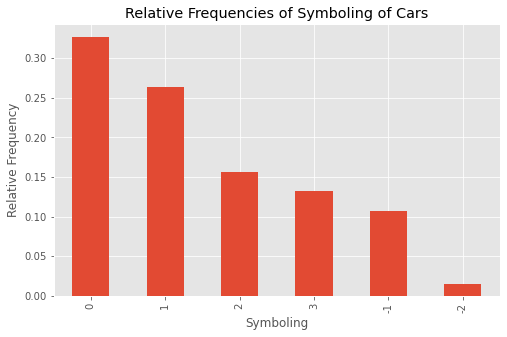

In [88]:
plt.figure(figsize=(8, 5))
df["symboling"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Symboling")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of Symboling of Cars")
plt.show()

Symboling: Since, symboling corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. If it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. eg: A value of +3 indicates that the auto is risky, -2 that it is probably pretty safe. In the dataset most cars (60 percent) have symboling of either 0 or 1, which makes them moderately risky while the cars which have low or high symboling values seems to be lacking.

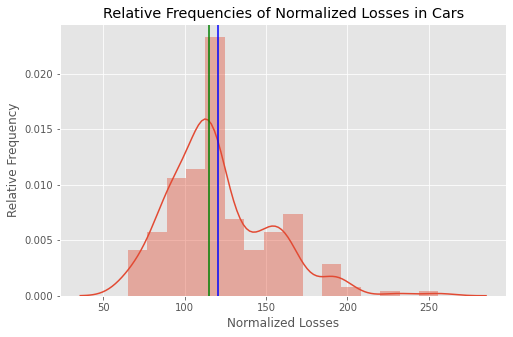

In [89]:
plt.figure(figsize=(8, 5))
sns.distplot(df["normalized_losses"])
plt.axvline(x=df["normalized_losses"].mean(), color="b")
plt.axvline(x=df["normalized_losses"].median(), color="g")
plt.xlabel("Normalized Losses")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of Normalized Losses in Cars")
plt.show()

Normalized Losses of cars occur mostly at 120 with the range being from 65 to 256. There are some cars that seem to have more losses which is skewing the data towards the right side.

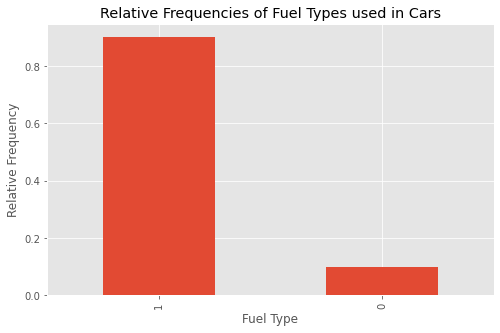

In [90]:
plt.figure(figsize=(8, 5))
df["Fuel_type"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Fuel Type")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of Fuel Types used in Cars")
plt.show()

Most cars (80 percent) are of the Gas type, while a minority of cars use Diesel engines

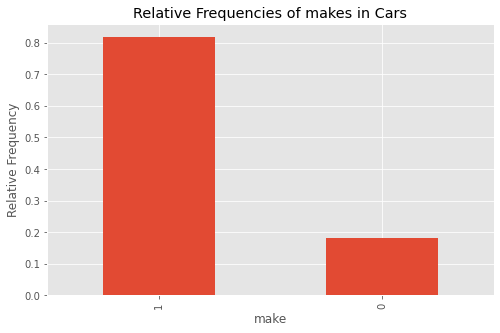

In [91]:
plt.figure(figsize=(8, 5))
df["make"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("make")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of makes in Cars")
plt.show()

Most cars (80 percent appriximately) are of the Std type, while a minority of cars use Turbo charged engines

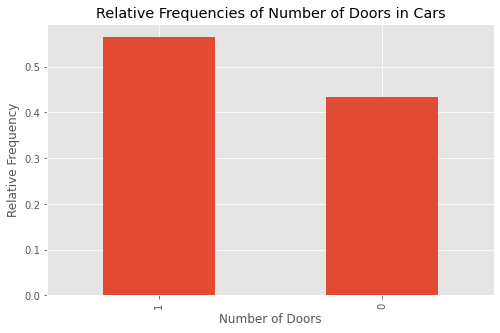

In [92]:
plt.figure(figsize=(8, 5))
df["num_of_doors"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Number of Doors")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of Number of Doors in Cars")
plt.show()

Over 50 percent of cars have foor doors while around 40 percent of cars have two doors.

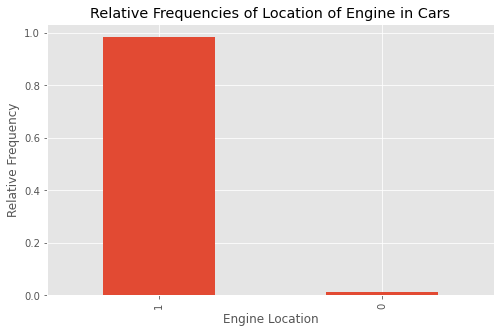

In [93]:
plt.figure(figsize=(8, 5))
df["engine_location"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Engine Location")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of Location of Engine in Cars")
plt.show()

Most cars have engines placed in the front of cars while a miniscule of cars have engines placed in the rear side of the car

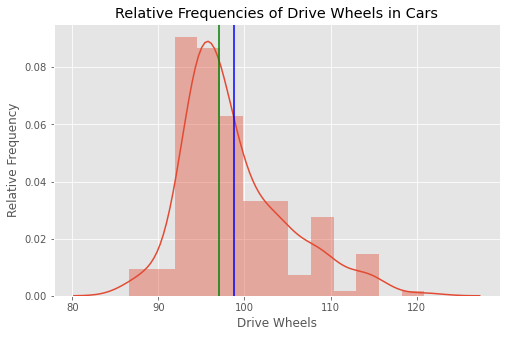

In [94]:
plt.figure(figsize=(8, 5))
sns.distplot(df["drive_wheels"])
plt.axvline(x=df["drive_wheels"].mean(), color="b")
plt.axvline(x=df["drive_wheels"].median(), color="g")
plt.xlabel("Drive Wheels")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of Drive Wheels in Cars")
plt.show()

Wheel base is distance between centre of front and rear wheels. Most cars have drive base of about 97-98

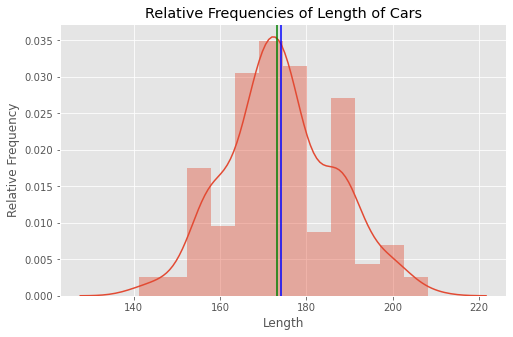

In [95]:
plt.figure(figsize=(8, 5))
sns.distplot(df["length"])
plt.axvline(x=df["length"].mean(), color="b")
plt.axvline(x=df["length"].median(), color="g")
plt.xlabel("Length")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of Length of Cars")
plt.show()

Most cars have lengths between 153-154

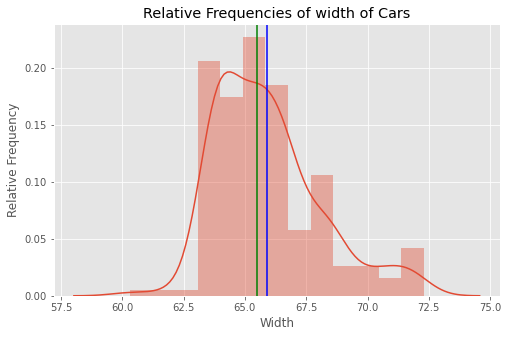

In [96]:
plt.figure(figsize=(8, 5))
sns.distplot(df["width"])
plt.axvline(x=df["width"].mean(), color="b")
plt.axvline(x=df["width"].median(), color="g")
plt.xlabel("Width")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of width of Cars")
plt.show()

Most cars have width between 65-66

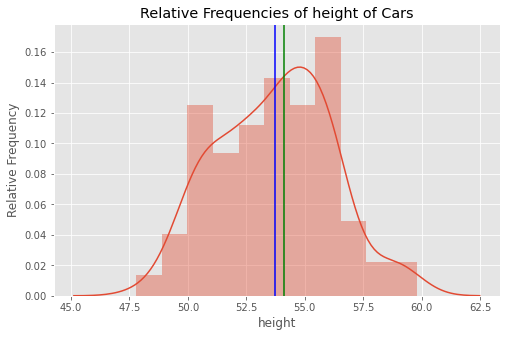

In [97]:
plt.figure(figsize=(8, 5))
sns.distplot(df["height"])
plt.axvline(x=df["height"].mean(), color="b")
plt.axvline(x=df["height"].median(), color="g")
plt.xlabel("height")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of height of Cars")
plt.show()

Most cars have height between 53-54

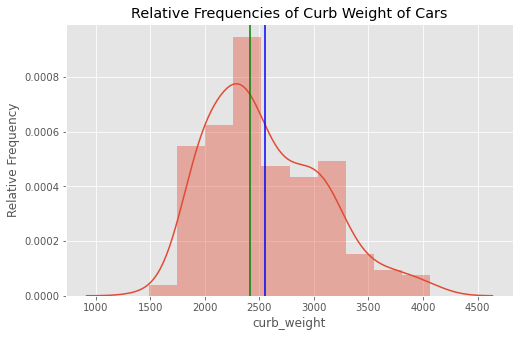

In [98]:
plt.figure(figsize=(8, 5))
sns.distplot(df["curb_weight"])
plt.axvline(x=df["curb_weight"].mean(), color="b")
plt.axvline(x=df["curb_weight"].median(), color="g")
plt.xlabel("curb_weight")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of Curb Weight of Cars")
plt.show()

Curb weaight is the weight of the car without occupants or baggage. Most cars have curb weights around 2555

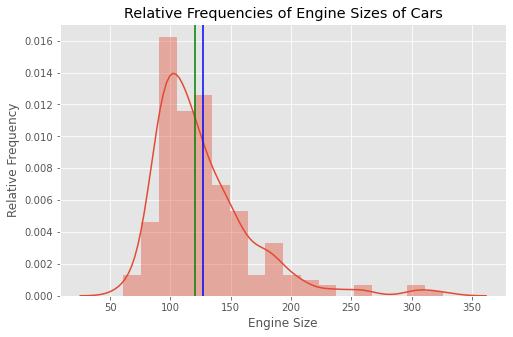

In [99]:
plt.figure(figsize=(8, 5))
sns.distplot(df["engine_size"])
plt.axvline(x=df["engine_size"].mean(), color="b")
plt.axvline(x=df["engine_size"].median(), color="g")
plt.xlabel("Engine Size")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of Engine Sizes of Cars")
plt.show()

Most engine sizes are 126

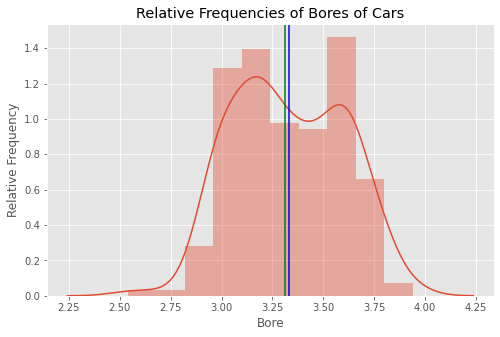

In [100]:
plt.figure(figsize=(8, 5))
sns.distplot(df["bore"])
plt.axvline(x=df["bore"].mean(), color="b")
plt.axvline(x=df["bore"].median(), color="g")
plt.xlabel("Bore")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of Bores of Cars")
plt.show()

Most cars have bores of 3.30

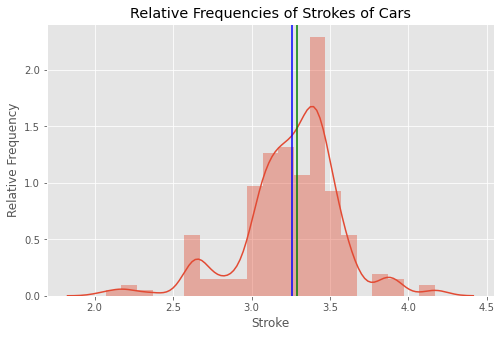

In [101]:
plt.figure(figsize=(8, 5))
sns.distplot(df["stroke"])
plt.axvline(x=df["stroke"].mean(), color="b")
plt.axvline(x=df["stroke"].median(), color="g")
plt.xlabel("Stroke")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of Strokes of Cars")
plt.show()

Stroke is the volume of the engine (distance travelled by the piston in each cycle). Most cars have stroke of 3.30

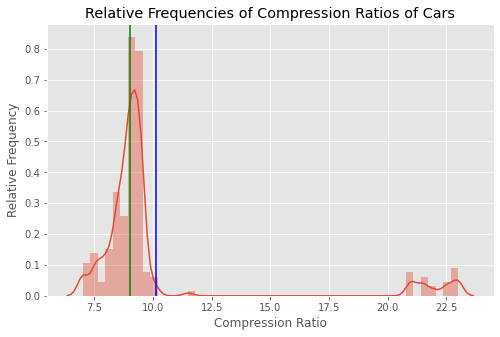

In [102]:
plt.figure(figsize=(8, 5))
sns.distplot(df["compression_ratio"])
plt.axvline(x=df["compression_ratio"].mean(), color="b")
plt.axvline(x=df["compression_ratio"].median(), color="g")
plt.xlabel("Compression Ratio")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of Compression Ratios of Cars")
plt.show()

Compression ratio is the ratio of volume of compression chamber at largest capacity to least capacity. Usually cars have compression rations as 9 but since there there are cars which have very high compression ratios the averqage compression ratio of cars is 10

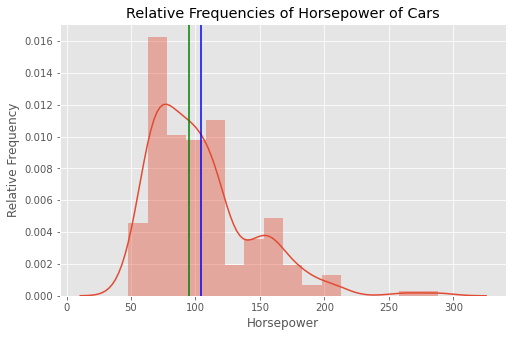

In [103]:
plt.figure(figsize=(8, 5))
sns.distplot(df["horsepower"])
plt.axvline(x=df["horsepower"].mean(), color="b")
plt.axvline(x=df["horsepower"].median(), color="g")
plt.xlabel("Horsepower")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of Horsepower of Cars")
plt.show()

Usually cars have horsepower as 95 but since there there are cars which have very high horsepower the averqage horsepowerpower of cars is 104

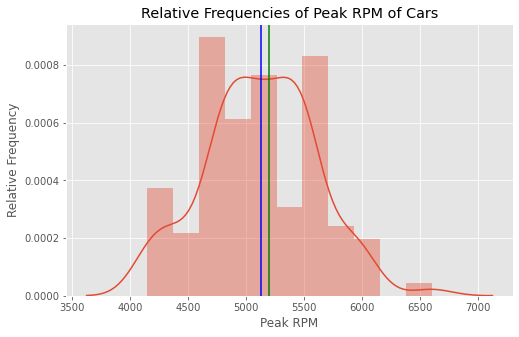

In [104]:
plt.figure(figsize=(8, 5))
sns.distplot(df["peak_rpm"])
plt.axvline(x=df["peak_rpm"].mean(), color="b")
plt.axvline(x=df["peak_rpm"].median(), color="g")
plt.xlabel("Peak RPM")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of Peak RPM of Cars")
plt.show()

Most cars have Peak RPM as 5200, but as there are cars that have lower Peak RPM its value drops to 5126

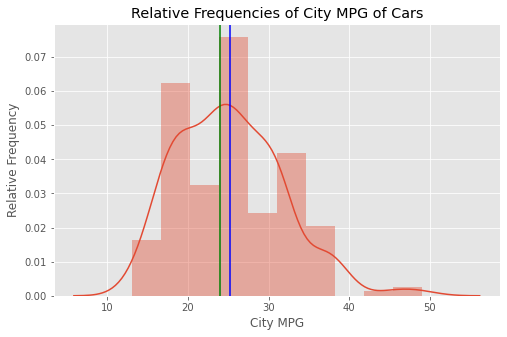

In [105]:
plt.figure(figsize=(8, 5))
sns.distplot(df["city_mpg"])
plt.axvline(x=df["city_mpg"].mean(), color="b")
plt.axvline(x=df["city_mpg"].median(), color="g")
plt.xlabel("City MPG")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of City MPG of Cars")
plt.show()

Most City MPG is between 24-25

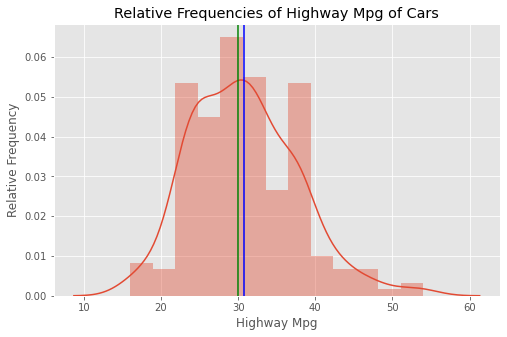

In [106]:
plt.figure(figsize=(8, 5))
sns.distplot(df["highway_mpg"])
plt.axvline(x=df["highway_mpg"].mean(), color="b")
plt.axvline(x=df["highway_mpg"].median(), color="g")
plt.xlabel("Highway Mpg")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of Highway Mpg of Cars")
plt.show()

Most Highway MPG is between 30-31

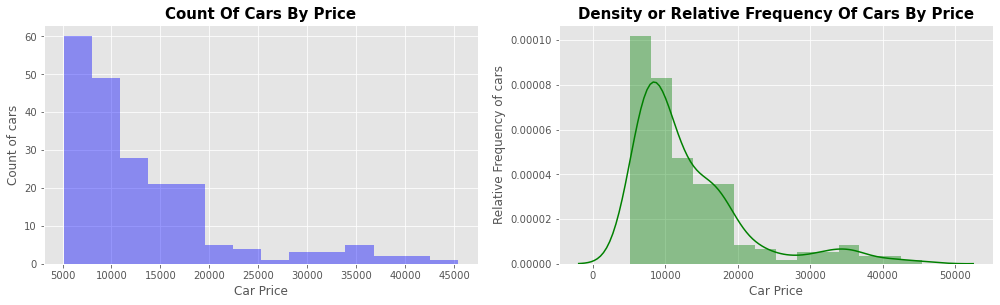

In [107]:
# target variable: price of car

fig, ax= plt.subplots(1, 2, figsize=(15,5))

plt.tight_layout(pad=5)
sns.distplot(df['price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By Price', size=15, weight="bold")

sns.distplot(df['price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars', size=12)
ax[1].set_title('Density or Relative Frequency Of Cars By Price', size=15, weight="bold")
plt.show()

The target variable price has a positive skew, however majority of the cars are low priced.

More than 50% of the cars (around 105-107 out of total of 205) are priced 10,000 and close to 35% cars are priced between 10,000 and 20,000. So around 88% of cars in US market are priced between 5,000 to 20,000.

Based on above observations and graph on right side (KDE/green one) it appears there are 2 distributions one for cars priced between 5,000 and 25000 and another distribution for high priced cars 25,000 and above. (Notice the approximate bell curve from little less than 30000 upto 45,000/50,000)

# Multi-Variate Analysis

## Linear Relationship

---------- drive_wheels ----------


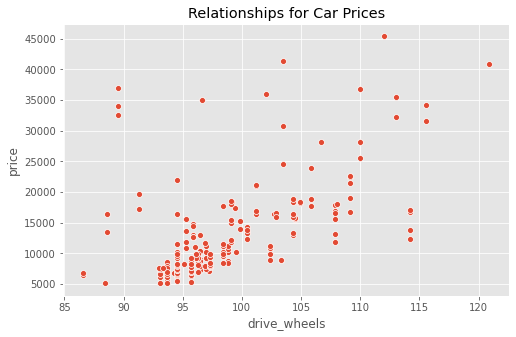

The Pearson's Correlation Coefficient is 0.584846838972225  with a P-value of P = 3.338017082369928e-20

---------- length ----------


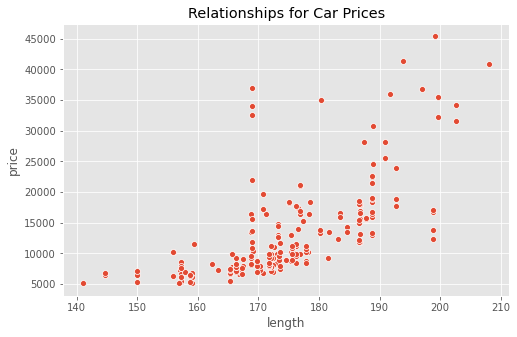

The Pearson's Correlation Coefficient is 0.6865674442855646  with a P-value of P = 6.4288440073763e-30

---------- width ----------


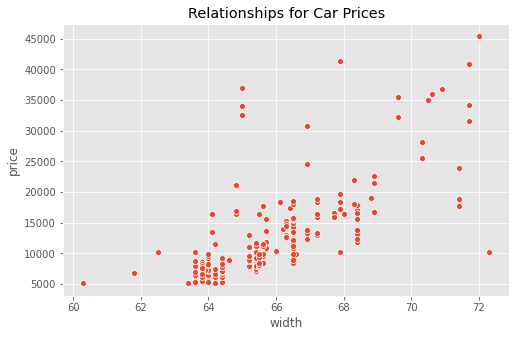

The Pearson's Correlation Coefficient is 0.7245583242779026  with a P-value of P = 1.1789696449955338e-34

---------- curb_weight ----------


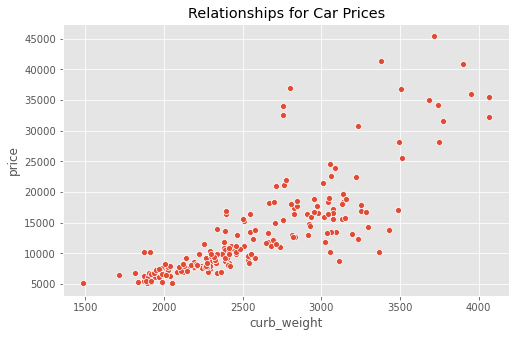

The Pearson's Correlation Coefficient is 0.819816683995632  with a P-value of P = 4.794551240414322e-51

---------- engine_size ----------


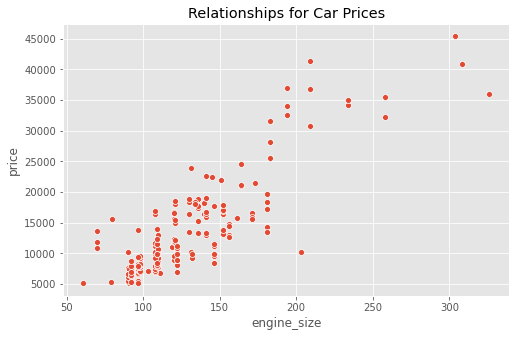

The Pearson's Correlation Coefficient is 0.8603427324326134  with a P-value of P = 2.511193868051146e-61

---------- bore ----------


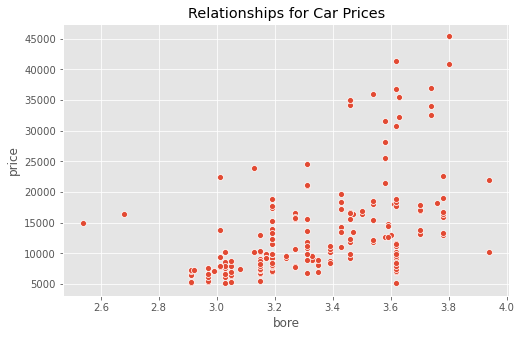

The Pearson's Correlation Coefficient is 0.5328613303314083  with a P-value of P = 1.9640192743770355e-16

---------- horsepower ----------


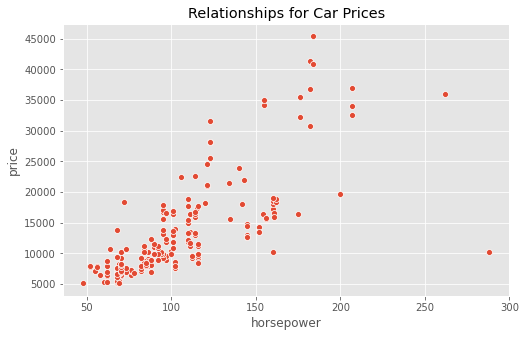

The Pearson's Correlation Coefficient is 0.7499191229023526  with a P-value of P = 2.7701494645427533e-38

---------- city_mpg ----------


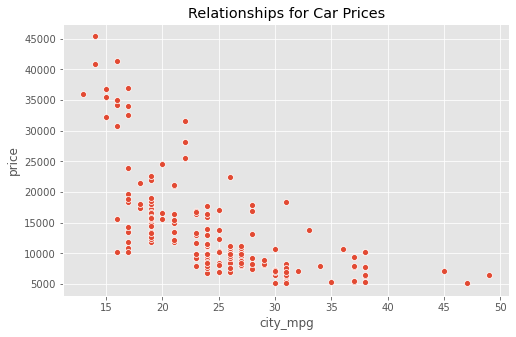

The Pearson's Correlation Coefficient is -0.6688215192284404  with a P-value of P = 6.034974884198224e-28

---------- highway_mpg ----------


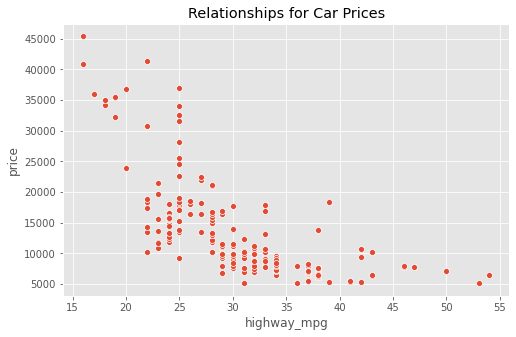

The Pearson's Correlation Coefficient is -0.6930373012364786  with a P-value of P = 1.1310420947833799e-30

---------- price ----------


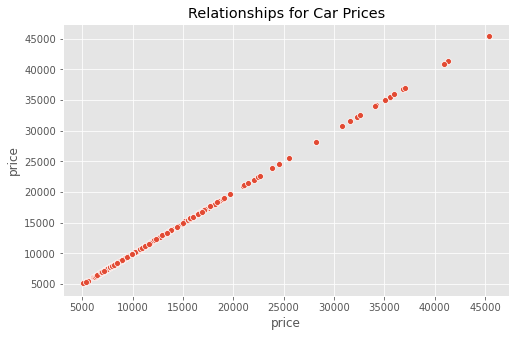

The Pearson's Correlation Coefficient is 1.0  with a P-value of P = 0.0

---------- wheel_base_fwd ----------


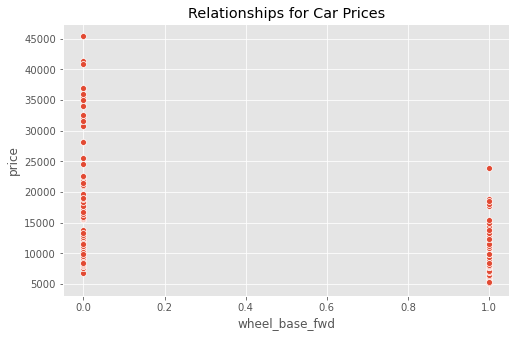

The Pearson's Correlation Coefficient is -0.5877520522997131  with a P-value of P = 1.961404190564608e-20

---------- wheel_base_rwd ----------


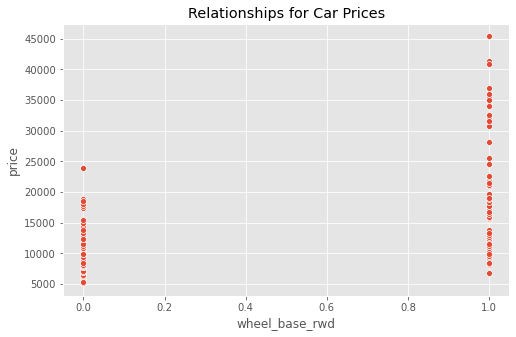

The Pearson's Correlation Coefficient is 0.6330798425502475  with a P-value of P = 2.3299896030830796e-24

---------- body_style_mercedes-benz ----------


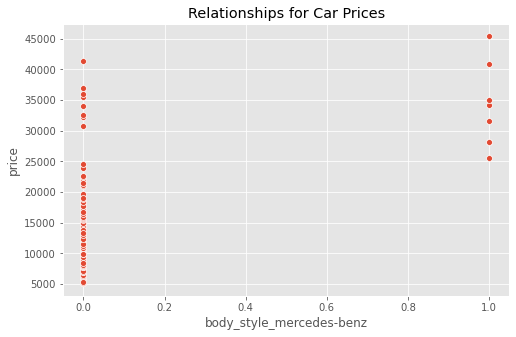

The Pearson's Correlation Coefficient is 0.5255084803586002  with a P-value of P = 5.962973082626384e-16

---------- num_of_cylinders_four ----------


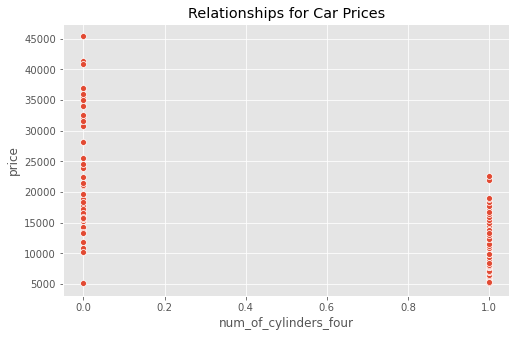

The Pearson's Correlation Coefficient is -0.6734783816771673  with a P-value of P = 1.88938355350745e-28

---------- num_of_cylinders_six ----------


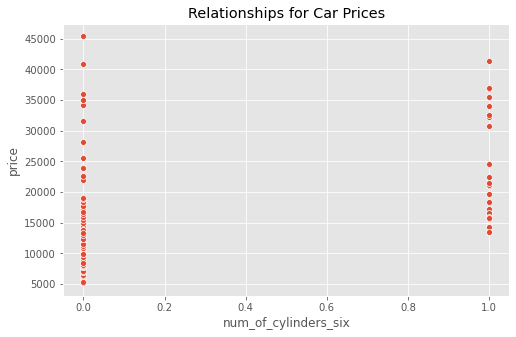

The Pearson's Correlation Coefficient is 0.4874489347557931  with a P-value of P = 1.2426957819130876e-13

---------- fuel_system_2bbl ----------


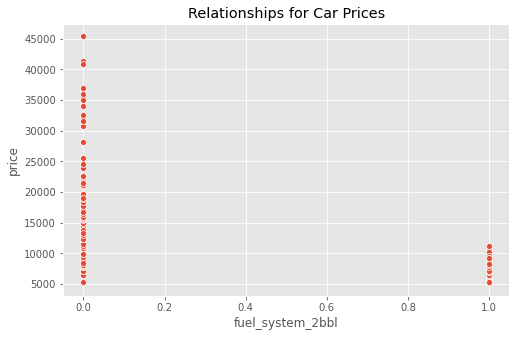

The Pearson's Correlation Coefficient is -0.49361297898469503  with a P-value of P = 5.471035961528363e-14

---------- fuel_system_mpfi ----------


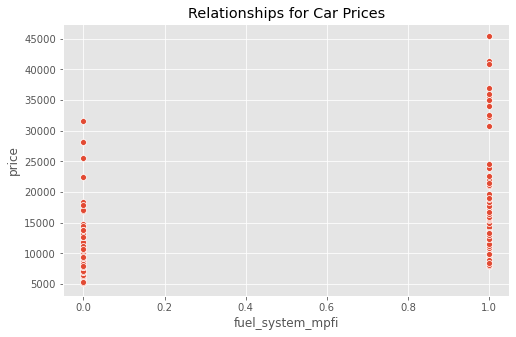

The Pearson's Correlation Coefficient is 0.5033663186745433  with a P-value of P = 1.4437375282003743e-14



In [108]:
# Relationship between Independent Variables and target (Price)

from scipy import stats
from scipy.stats import pearsonr

for column in df1.corr(method='pearson').columns:
    pearson, p_value = stats.pearsonr(df1[column], df1['price'])
    if (pearson>0.4 or pearson<-0.4):
        print("----------",column,"----------")
        plt.figure(figsize=(8,5))
        plt.title('Relationships for Car Prices')
        sns.scatterplot(x=column, y='price', data=df1)
        plt.show()
        df1[[column,'price']].corr()
        print("The Pearson's Correlation Coefficient is", pearson, " with a P-value of P =", p_value)
        print("")

* Postitive Linear Relationship: Drive wheels, Length, Width, curb_weight, engine size, bore, horsepower\
* Negative Linear Relationship: City MPG, Highway MPG
* Coorelation only mearures relationship between two continuous variables
* Other variables either don't have a relation with price or relationship isn't strong. None of the varibales appear to have polynomial relation with price
* In linear regression assumptions validation section we will check for linearity assumption in detail

## Correlation

In [109]:
# correlation between variables of type "int64" or "float64"
corr = df1.corr()
corr

symboling  normalized_losses  Fuel_type      make  \
symboling                  1.000000           0.457484   0.194311  0.059866   
normalized_losses          0.457484           1.000000   0.104668  0.011273   
Fuel_type                  0.194311           0.104668   1.000000  0.401397   
make                       0.059866           0.011273   0.401397  1.000000   
num_of_doors              -0.663595          -0.348850  -0.188496 -0.052803   
engine_location           -0.212471           0.021510  -0.040070 -0.057191   
drive_wheels              -0.531954          -0.073709  -0.308346 -0.257611   
length                    -0.357612          -0.006837  -0.212679 -0.234539   
width                     -0.232919           0.058378  -0.233880 -0.300567   
height                    -0.541038          -0.365674  -0.284631 -0.087311   
curb_weight               -0.227691           0.064343  -0.217275 -0.324902   
engine_size               -0.105790           0.072536  -0.069594 -0.108217   
bore                      -0.132563          -0.050428  -0.054923 -0.213281   
stroke                    -0.004929           0.046739  -0.241083 -0.221932   
compression_ratio         -0.178515          -0.114772  -0.984356 -0.295541   
horsepower                 0.071064           0.166964   0.164393 -0.241193   
peak_rpm                   0.273851           0.241134   0.477507  0.184326   
city_mpg                  -0.035823          -0.189530  -0.255963  0.202362   
highway_mpg                0.034606          -0.149357  -0.191392  0.254416   
price                     -0.080149           0.095489  -0.112439 -0.175745   
aspiration_hardtop         0.168845           0.034298  -0.018635  0.029074   
aspiration_hatchback       0.435648           0.205236   0.202093 -0.009786   
aspiration_sedan          -0.378341          -0.025142  -0.185623 -0.017111   
aspiration_wagon          -0.298243          -0.285199  -0.028183 -0.018908   
wheel_base_fwd             0.102839          -0.212838   0.090342  0.145681   
wheel_base_rwd            -0.076381           0.273564  -0.122035 -0.112470   
body_style_audi            0.068348           0.122589   0.061822 -0.051445   
body_style_bmw            -0.074482           0.202613   0.066258  0.094571   
body_style_chevrolet       0.016270          -0.079126   0.040070  0.057191   
body_style_dodge           0.028609           0.086751   0.070457 -0.085162   
body_style_honda          -0.045822          -0.144344   0.085556  0.122115   
body_style_isuzu          -0.009555          -0.024899   0.046383  0.066203   
body_style_jaguar         -0.081830           0.016901   0.040070  0.057191   
body_style_mazda           0.068625           0.021632  -0.020356  0.141121   
body_style_mercedes-benz  -0.135313          -0.083999  -0.273316 -0.167416   
body_style_mercury         0.009347          -0.012358   0.023020 -0.149190   
body_style_mitsubishi      0.211978           0.150905   0.085556 -0.190153   
body_style_nissan          0.041422           0.142443   0.043921  0.100783   
body_style_peugot         -0.159891           0.177668  -0.286482 -0.225968   
body_style_plymouth        0.025103           0.037928   0.061822 -0.051445   
body_style_porsche         0.224755           0.042858   0.051988  0.074202   
body_style_renault         0.013252          -0.017519   0.032636  0.046581   
body_style_saab            0.232847           0.035026   0.057092 -0.069008   
body_style_subaru         -0.067071          -0.222808   0.081986  0.008961   
body_style_toyota         -0.094046          -0.137758   0.005524  0.166890   
body_style_volkswagen      0.167106          -0.011265  -0.198133  0.008961   
body_style_volvo          -0.403849          -0.218742   0.005338 -0.169682   
engine_type_dohcv          0.009347          -0.012358   0.023020  0.032857   
engine_type_l             -0.133979           0.170806  -0.268163 -0.207156   
engine_type_ohc           -0.082855          -0.156069  -0.020584  0.020162 

In [110]:
# np.zeros_like() returns an array of zeros with the same shape and type as the given array. By passing in the correlation matrix, we get an array of zeros
# The dtype=np.bool parameter overrides the data type, so our array is an array of booleans.
mask = np.zeros_like(corr, dtype=np.bool)
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [111]:
# np.triu_indices_from(mask) returns the indices for the upper triangle of the array.
# we set the upper values of the triangle to True
mask[np.triu_indices_from(mask)]= True
mask[np.triu_indices_from(mask)]

array([ True,  True,  True, ...,  True,  True,  True])

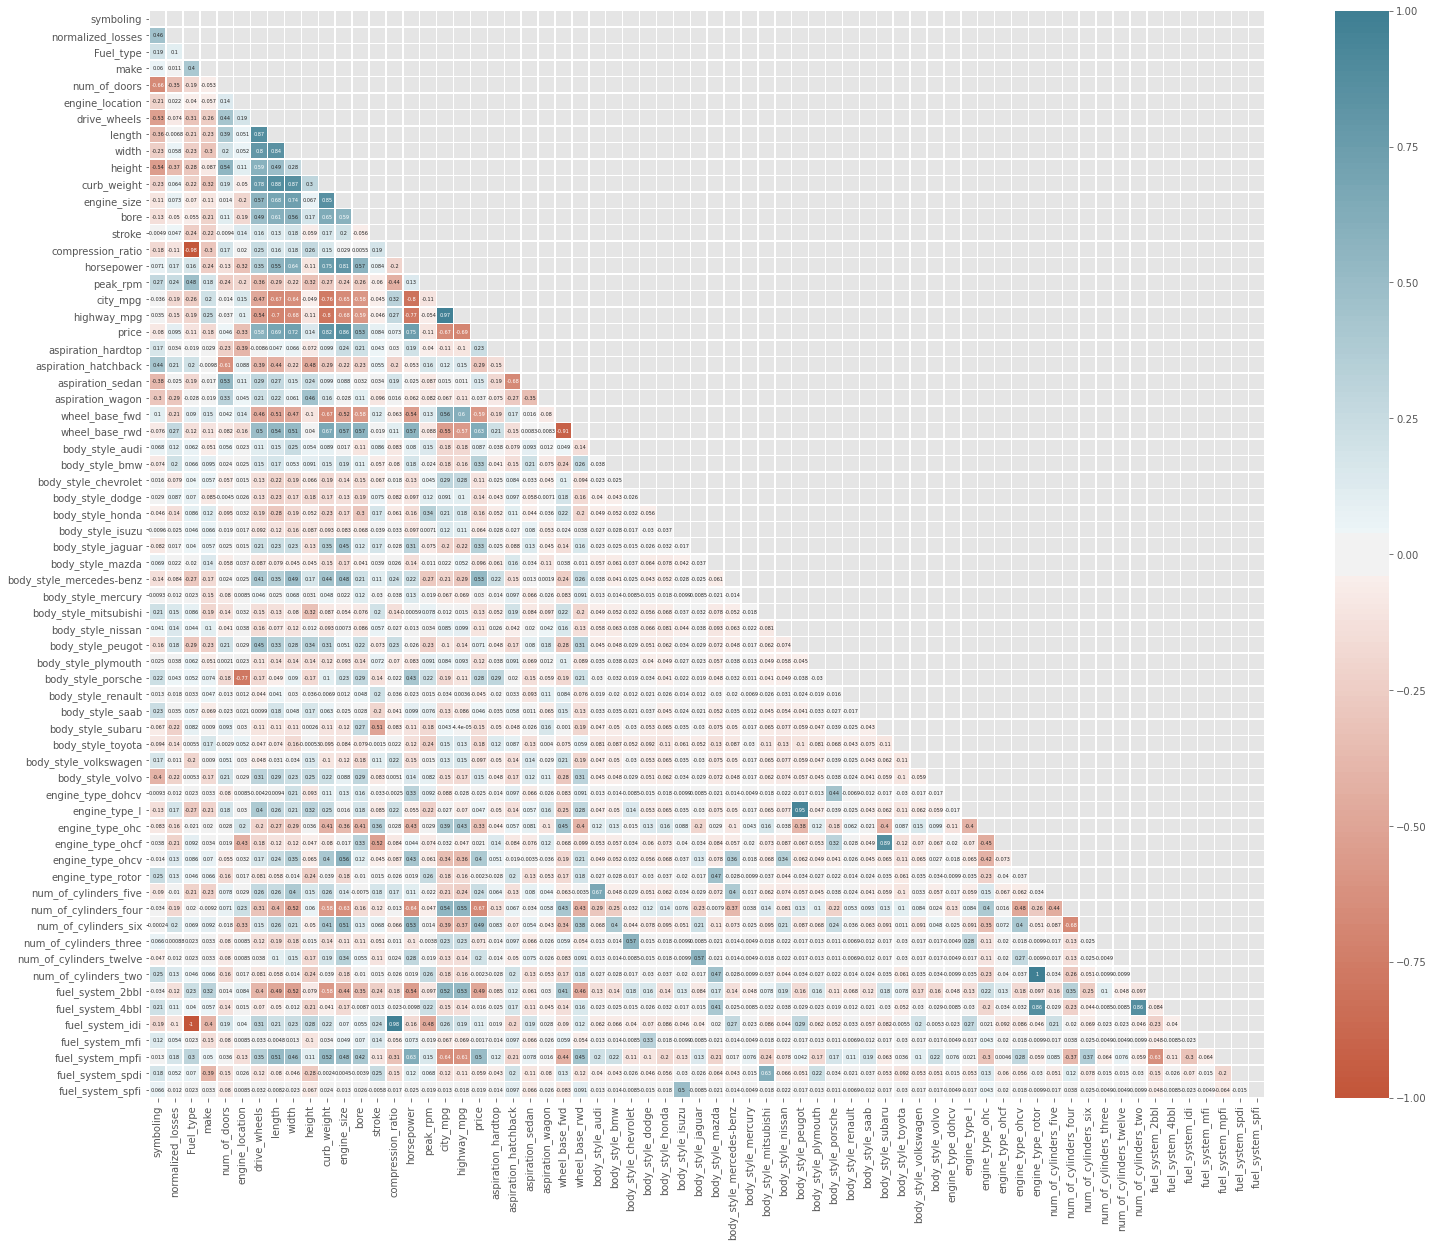

In [112]:
plt.figure(figsize=(25,20))
ax = sns.heatmap(corr,
                      mask = mask,
                      #square = True,
                      linewidths = .5,
                      #cmap = 'coolwarm',
                      cmap=sns.diverging_palette(20, 220, n=200),
                      #cbar_kws = {'shrink': .4,'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 5})
ax.set_xticklabels(ax.get_xticklabels());
ax.set_yticklabels(ax.get_yticklabels());

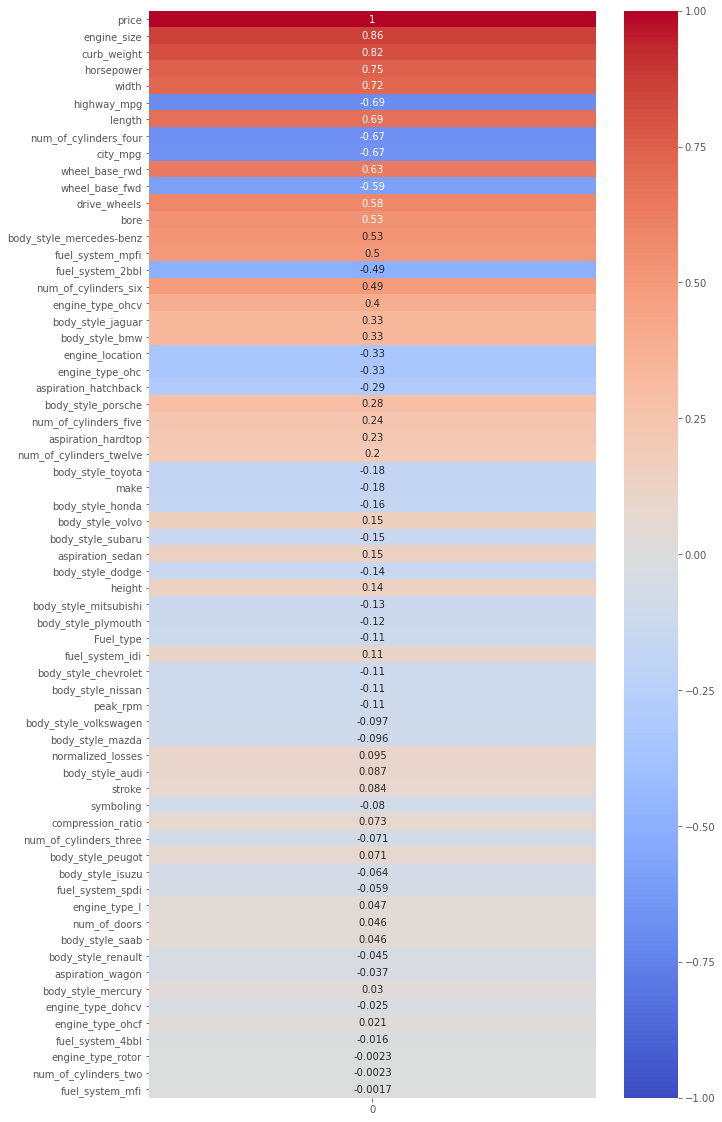

In [113]:
correlations = df1.corrwith(df1['price']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()    # return absolute value of a number
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

# Outliers

-------------------- symboling --------------------


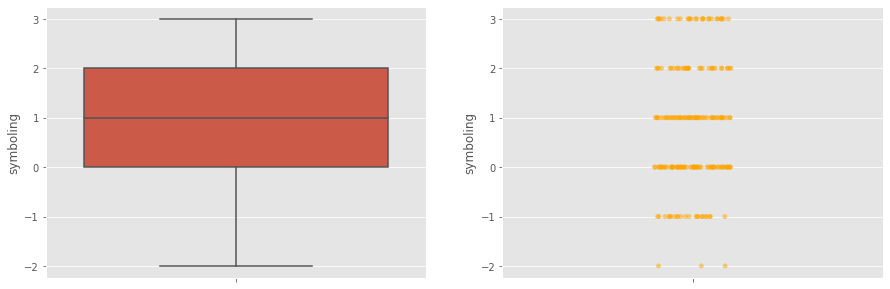


-------------------- normalized_losses --------------------


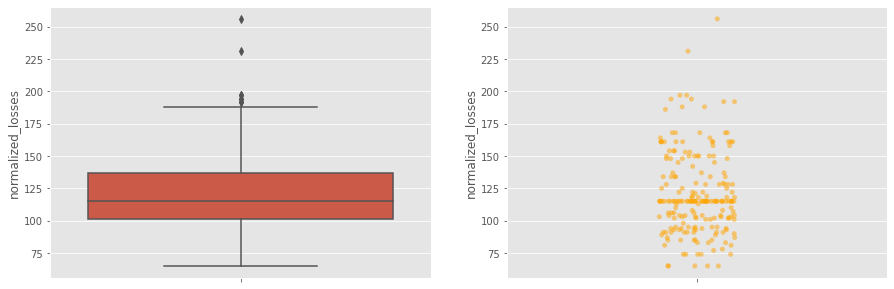


-------------------- Fuel_type --------------------


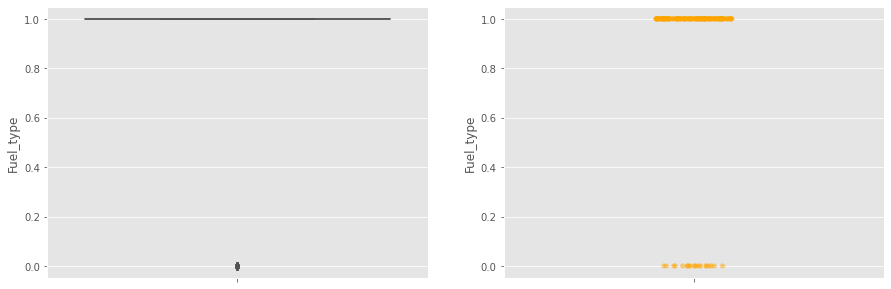


-------------------- make --------------------


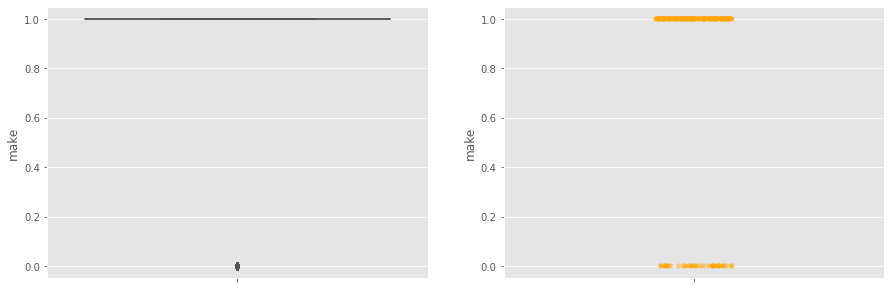


-------------------- num_of_doors --------------------


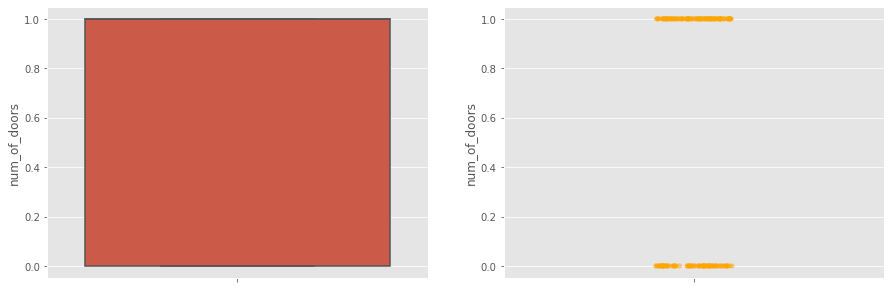


-------------------- engine_location --------------------


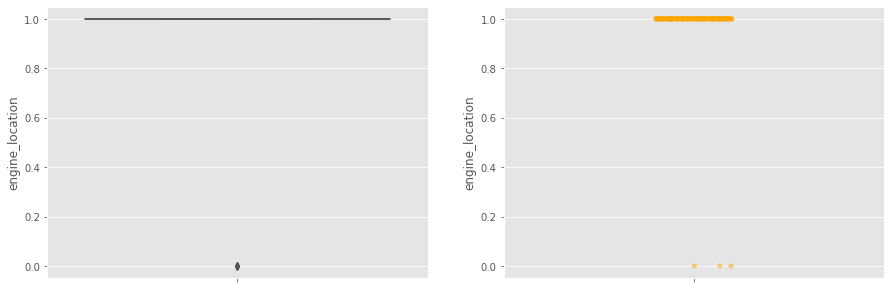


-------------------- drive_wheels --------------------


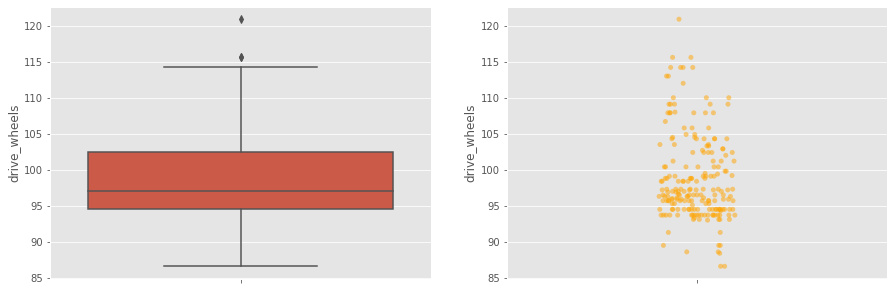


-------------------- length --------------------


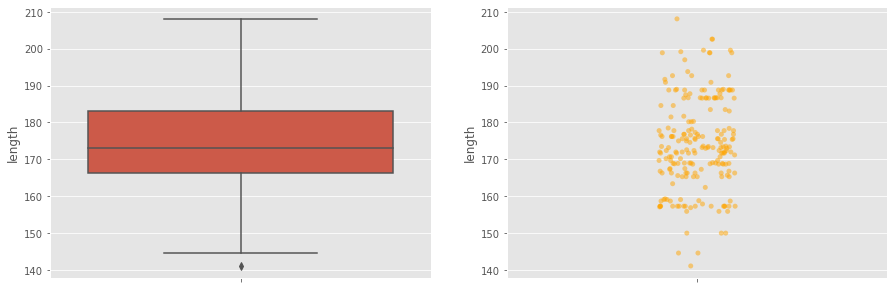


-------------------- width --------------------


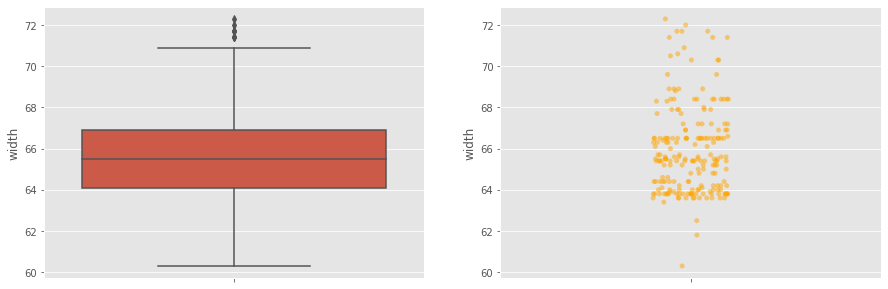


-------------------- height --------------------


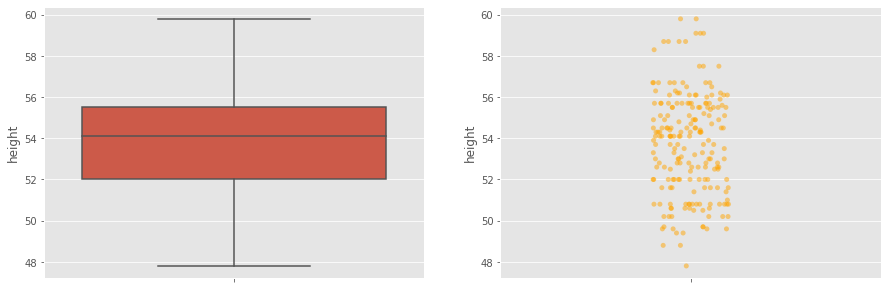


-------------------- curb_weight --------------------


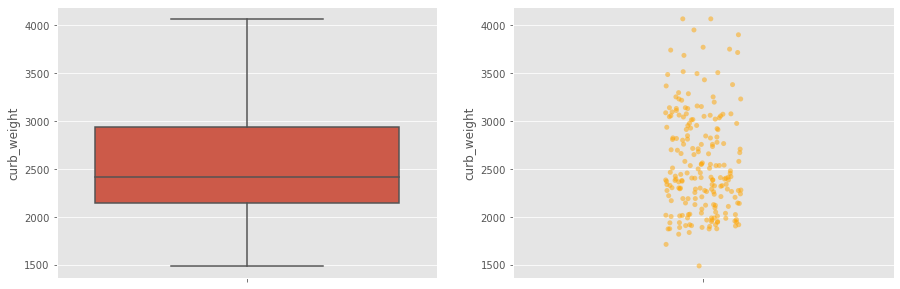


-------------------- engine_size --------------------


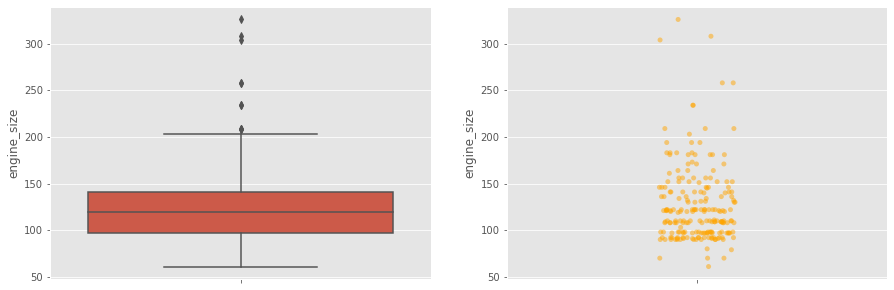


-------------------- bore --------------------


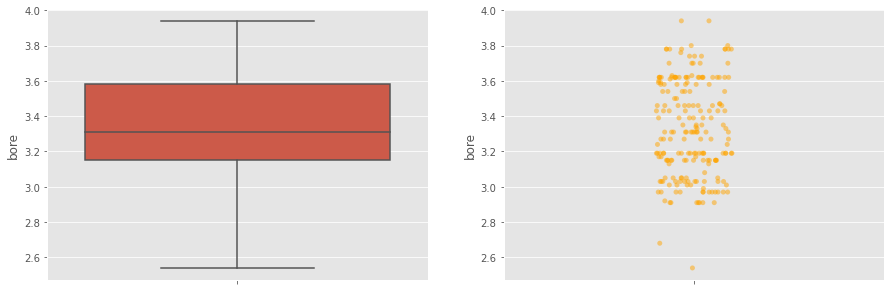


-------------------- stroke --------------------


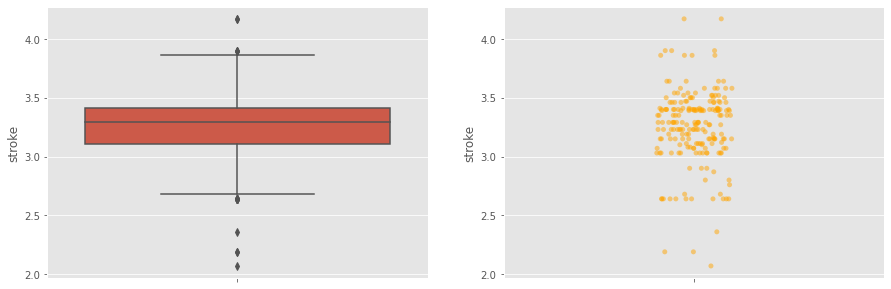


-------------------- compression_ratio --------------------


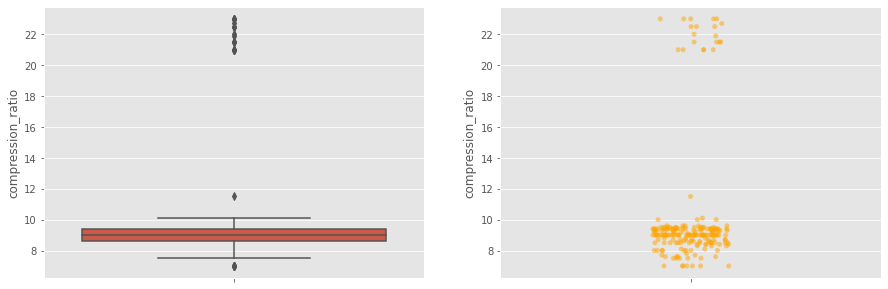


-------------------- horsepower --------------------


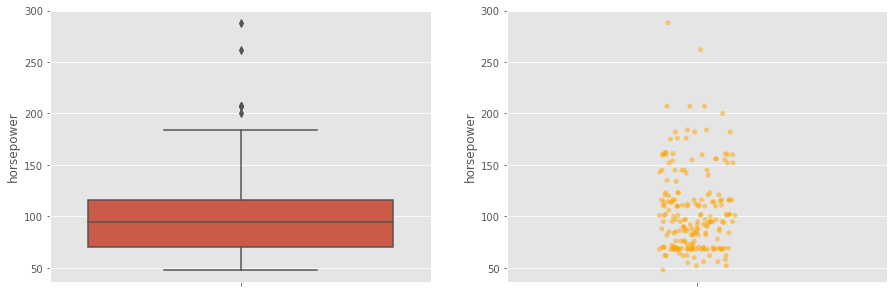


-------------------- peak_rpm --------------------


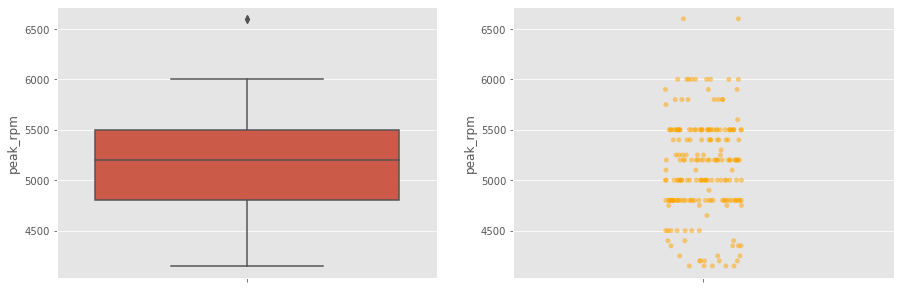


-------------------- city_mpg --------------------


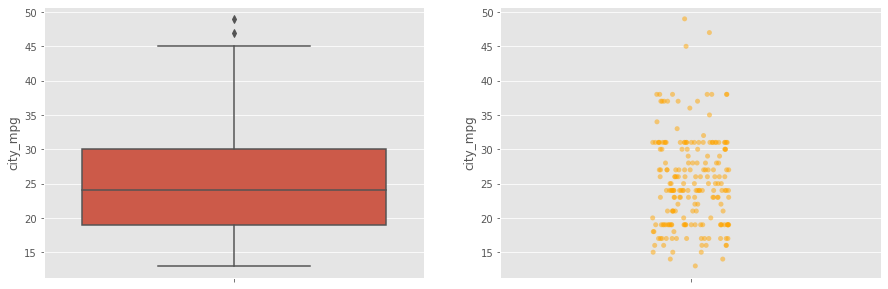


-------------------- highway_mpg --------------------


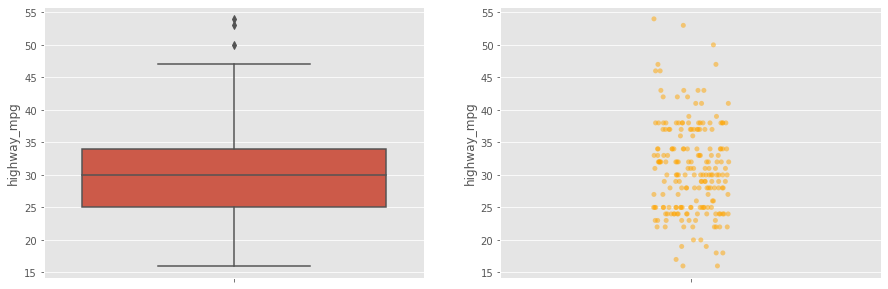


-------------------- price --------------------


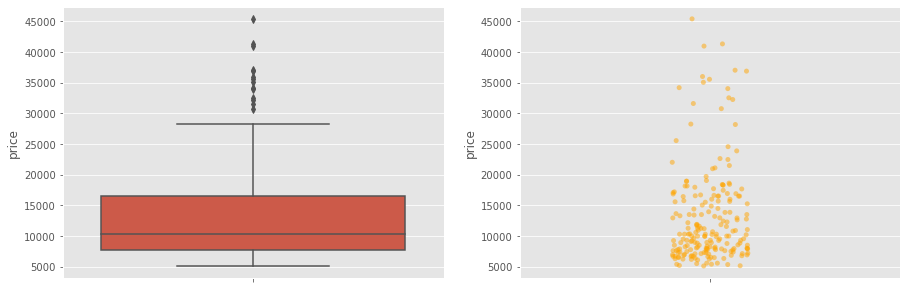


-------------------- aspiration_hardtop --------------------


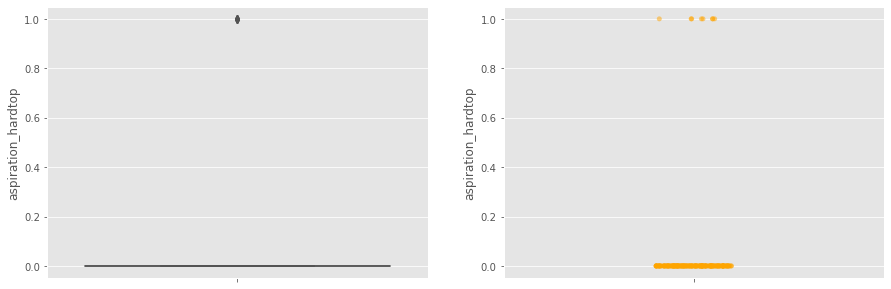


-------------------- aspiration_hatchback --------------------


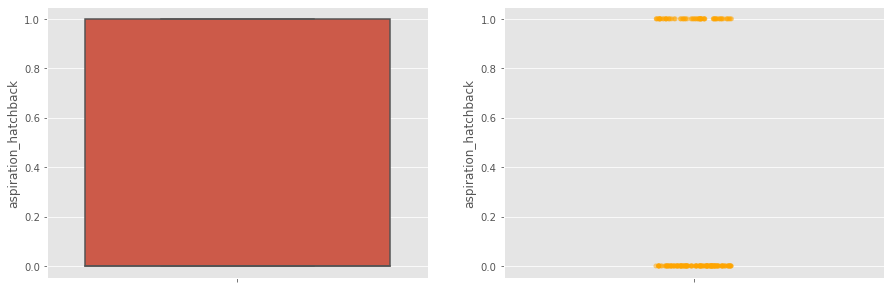


-------------------- aspiration_sedan --------------------


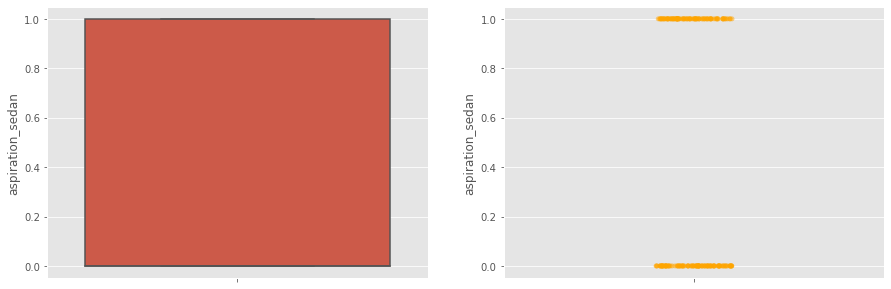


-------------------- aspiration_wagon --------------------


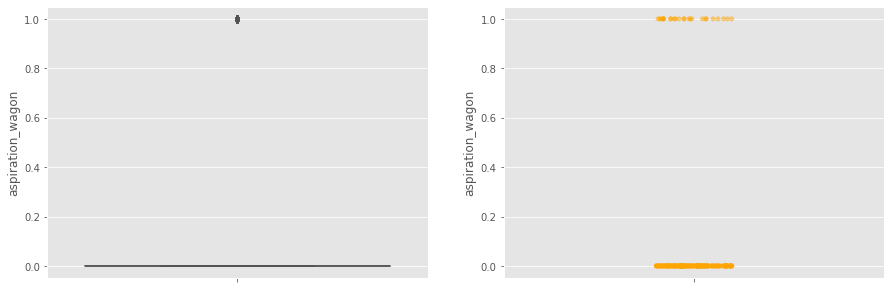


-------------------- wheel_base_fwd --------------------


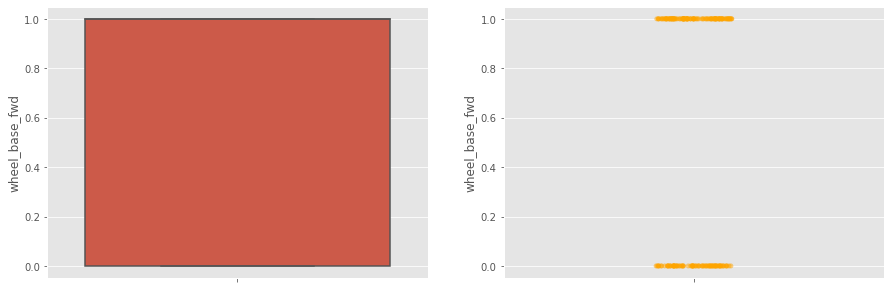


-------------------- wheel_base_rwd --------------------


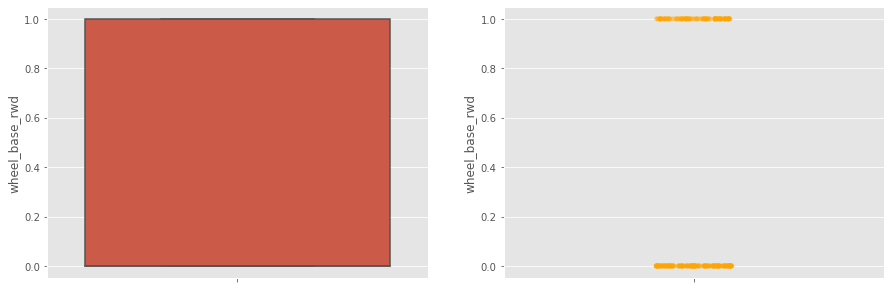


-------------------- body_style_audi --------------------


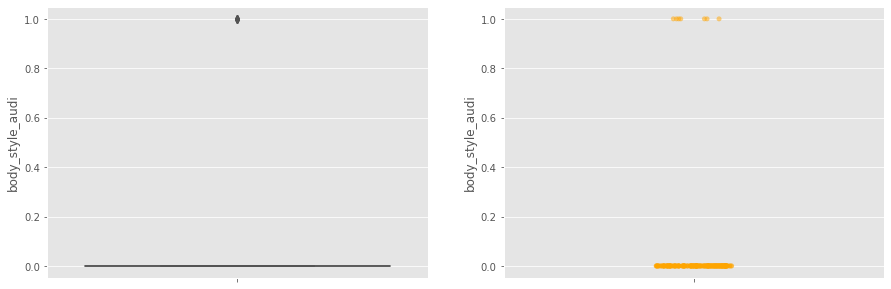


-------------------- body_style_bmw --------------------


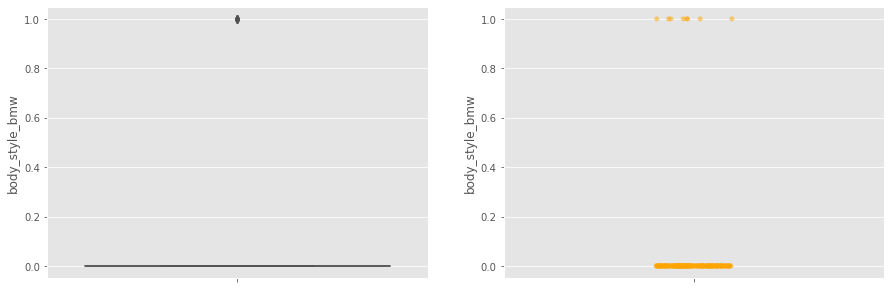


-------------------- body_style_chevrolet --------------------


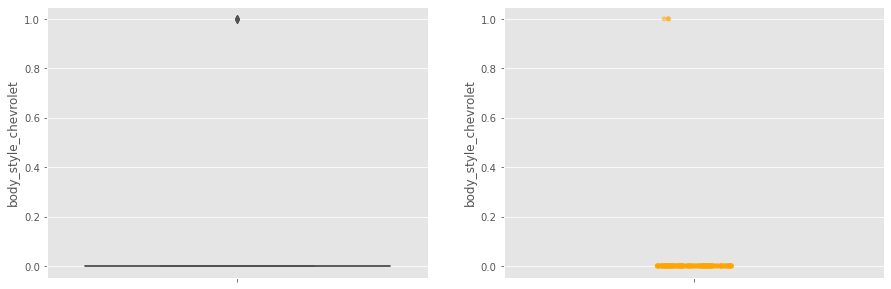


-------------------- body_style_dodge --------------------


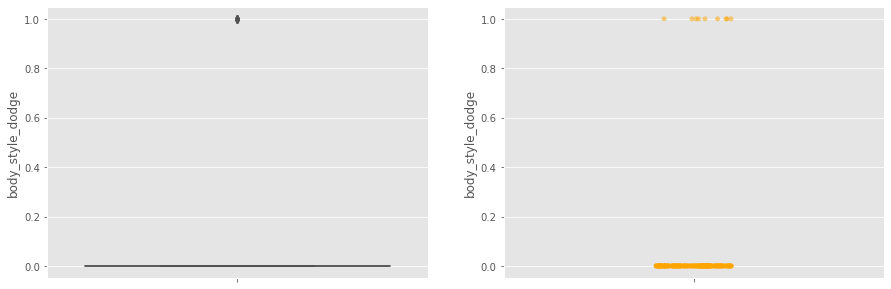


-------------------- body_style_honda --------------------


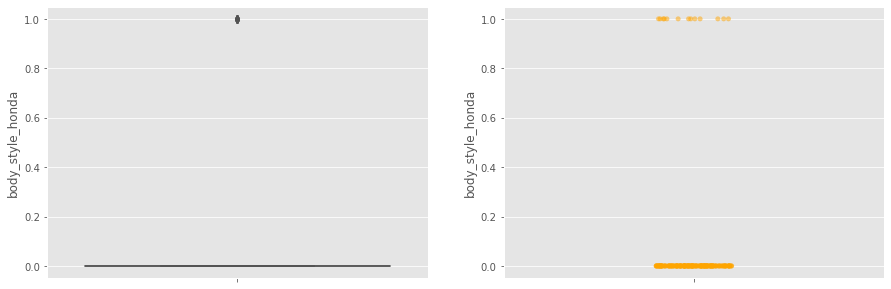


-------------------- body_style_isuzu --------------------


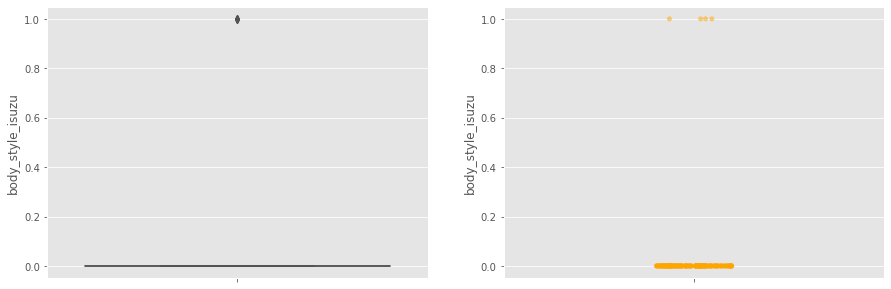


-------------------- body_style_jaguar --------------------


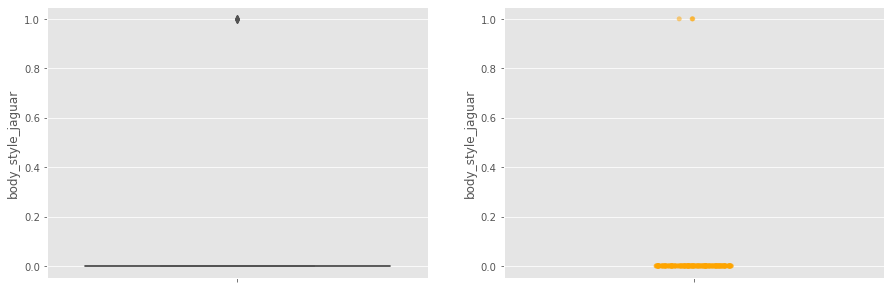


-------------------- body_style_mazda --------------------


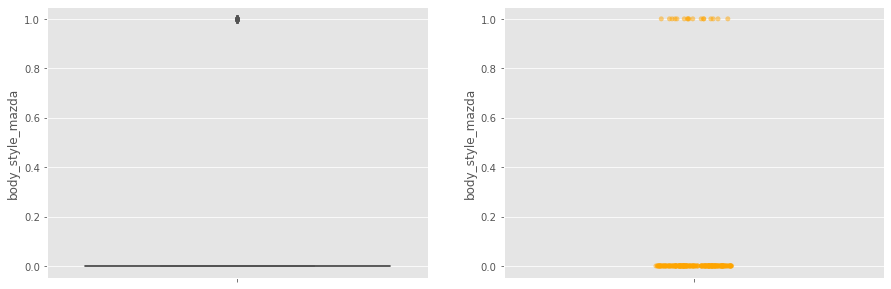


-------------------- body_style_mercedes-benz --------------------


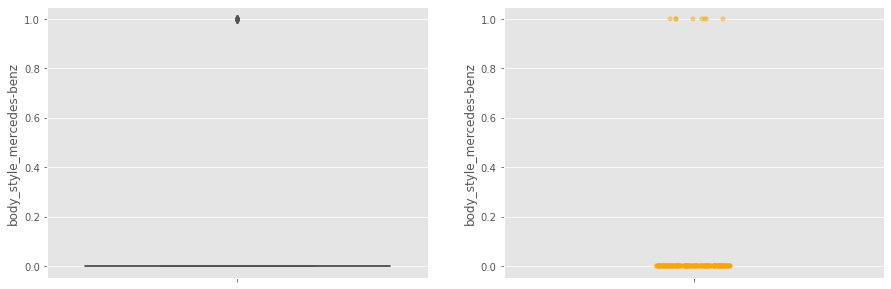


-------------------- body_style_mercury --------------------


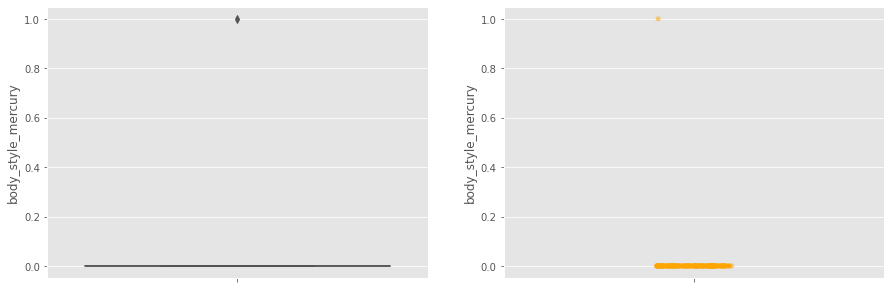


-------------------- body_style_mitsubishi --------------------


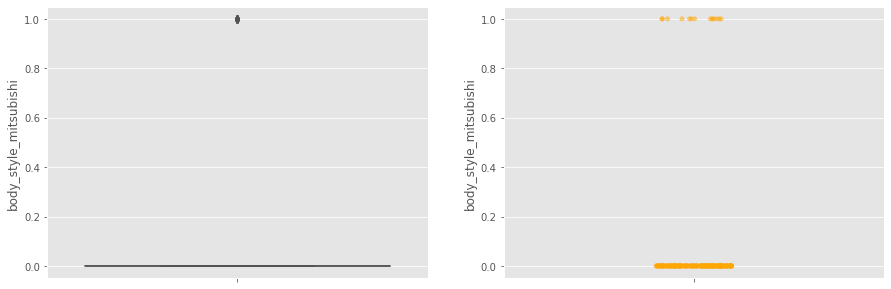


-------------------- body_style_nissan --------------------


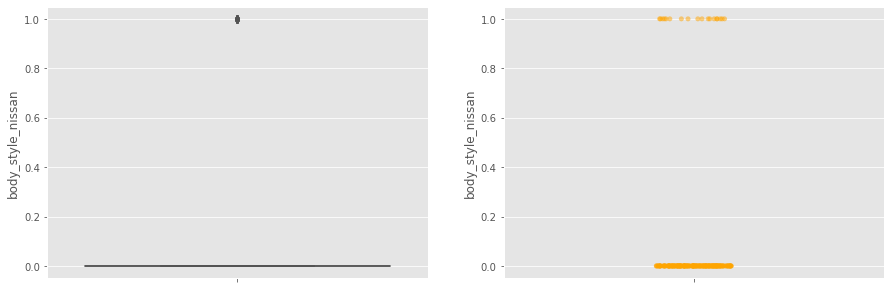


-------------------- body_style_peugot --------------------


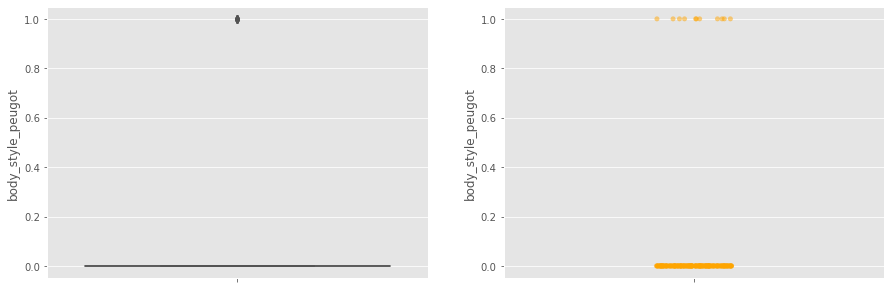


-------------------- body_style_plymouth --------------------


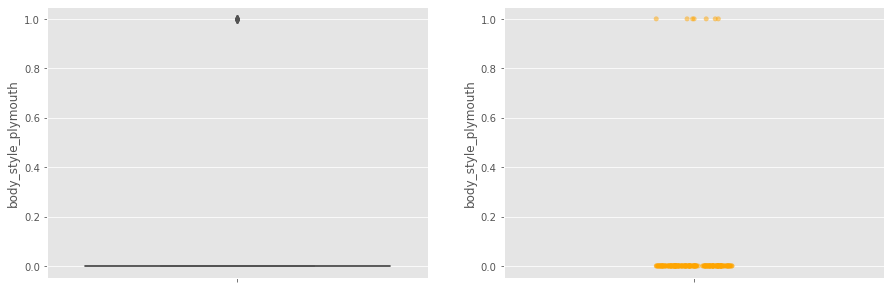


-------------------- body_style_porsche --------------------


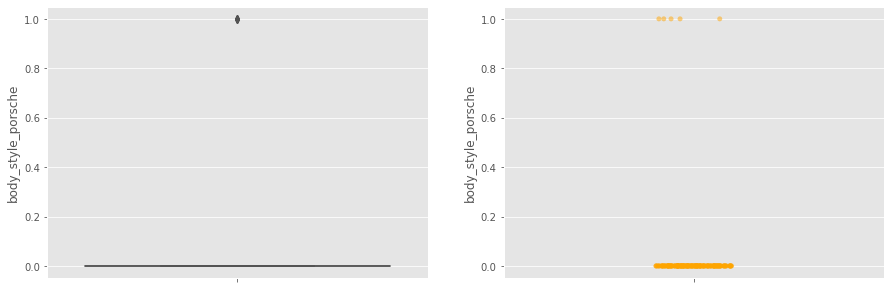


-------------------- body_style_renault --------------------


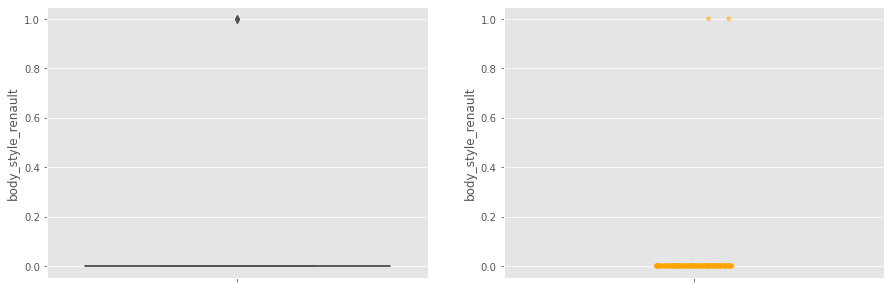


-------------------- body_style_saab --------------------


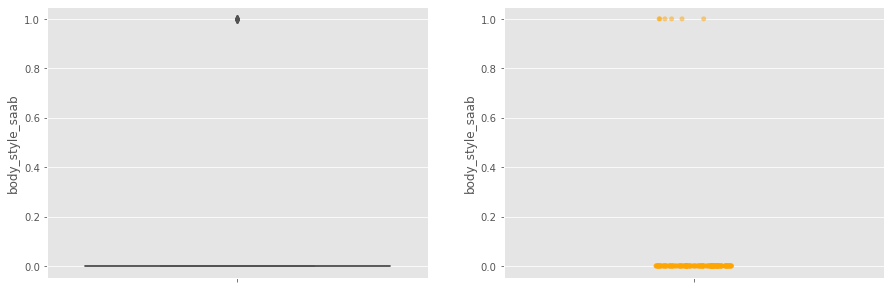


-------------------- body_style_subaru --------------------


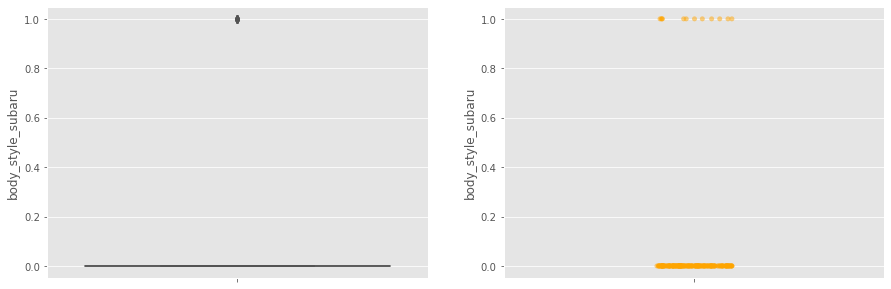


-------------------- body_style_toyota --------------------


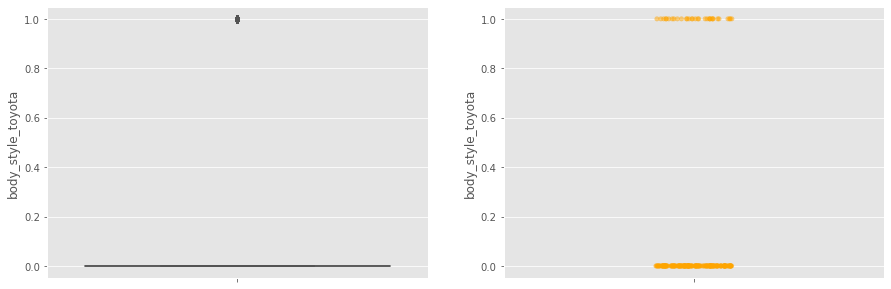


-------------------- body_style_volkswagen --------------------


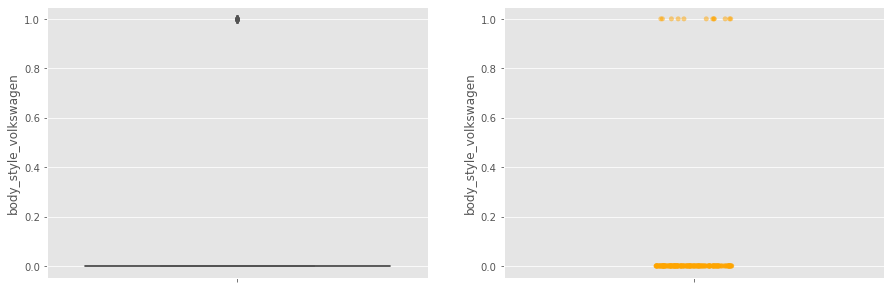


-------------------- body_style_volvo --------------------


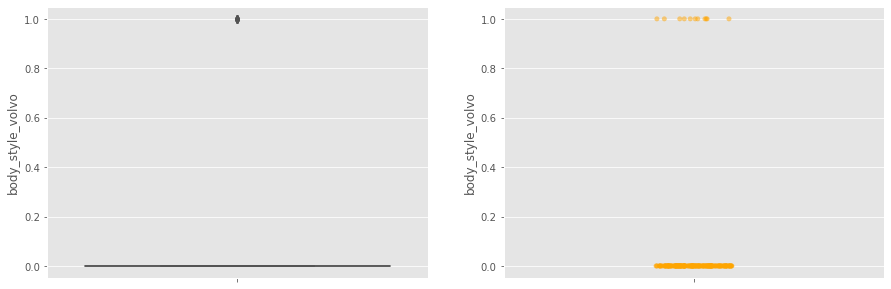


-------------------- engine_type_dohcv --------------------


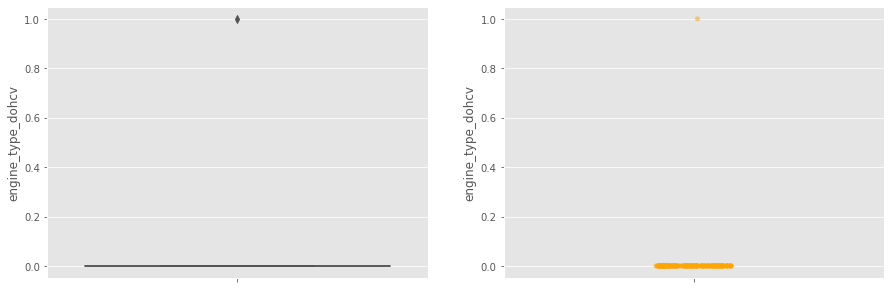


-------------------- engine_type_l --------------------


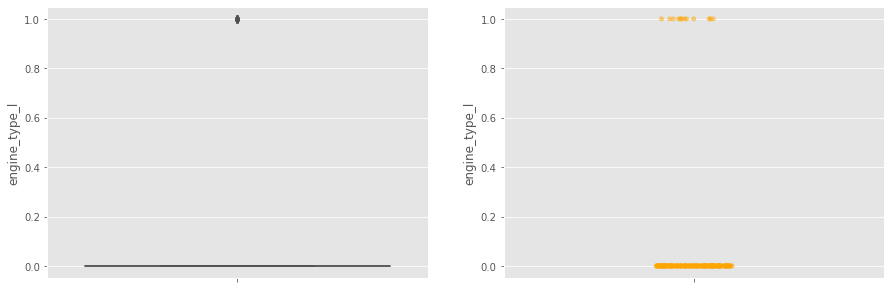


-------------------- engine_type_ohc --------------------


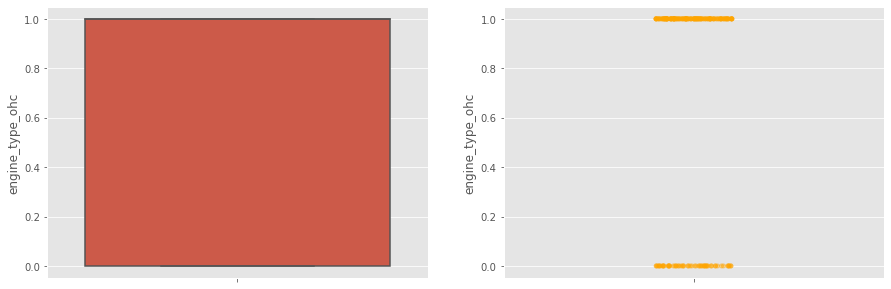


-------------------- engine_type_ohcf --------------------


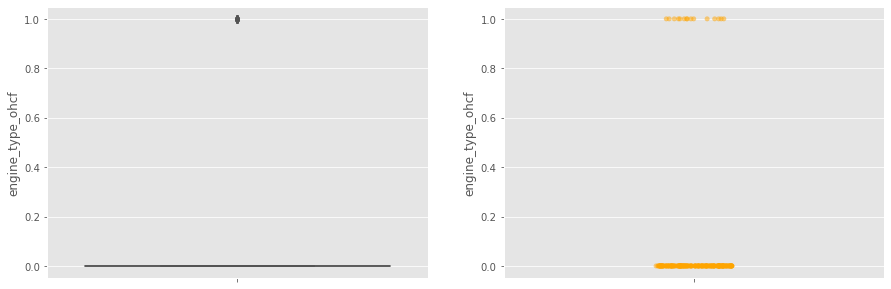


-------------------- engine_type_ohcv --------------------


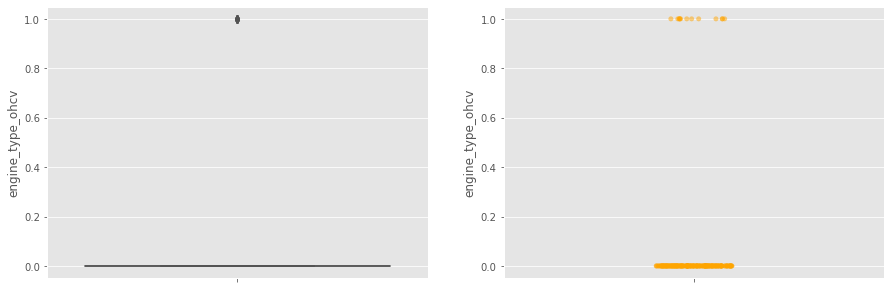


-------------------- engine_type_rotor --------------------


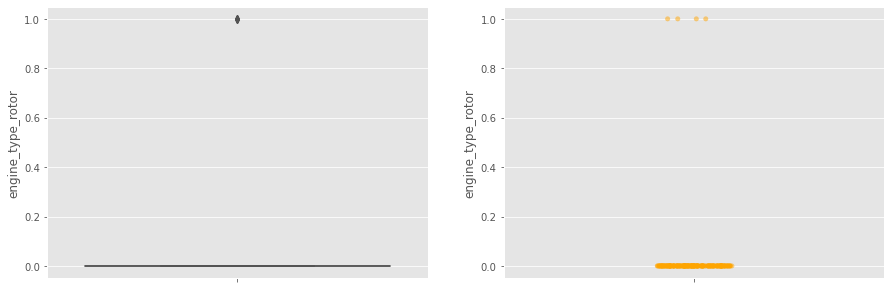


-------------------- num_of_cylinders_five --------------------


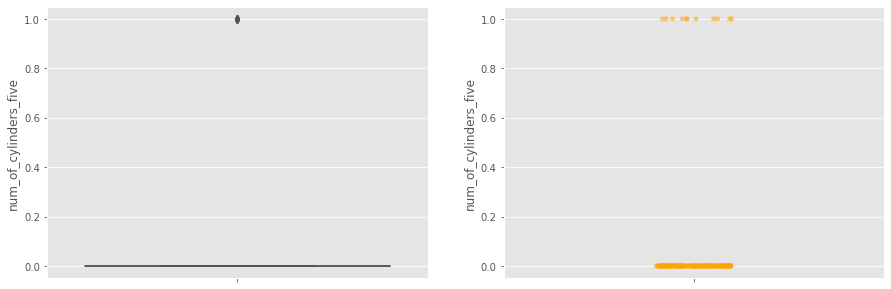


-------------------- num_of_cylinders_four --------------------


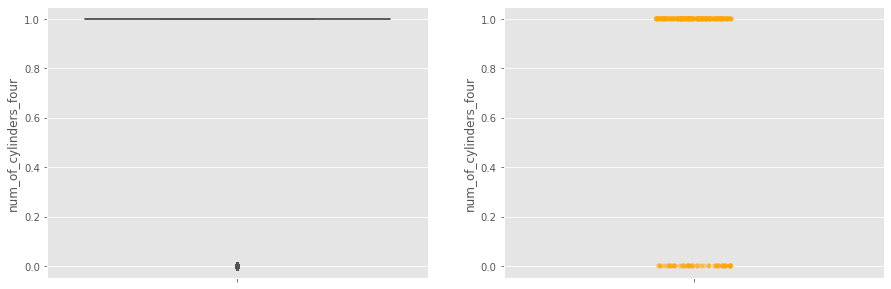


-------------------- num_of_cylinders_six --------------------


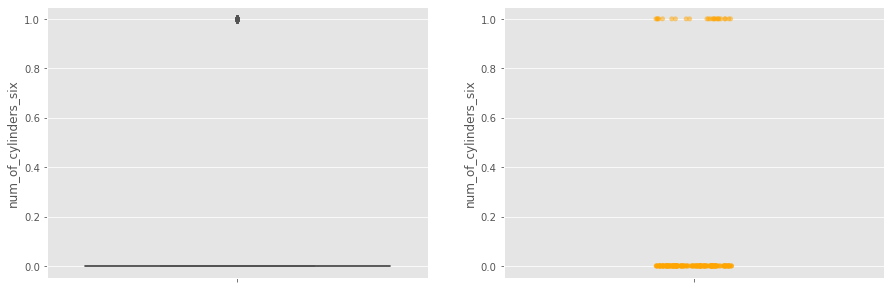


-------------------- num_of_cylinders_three --------------------


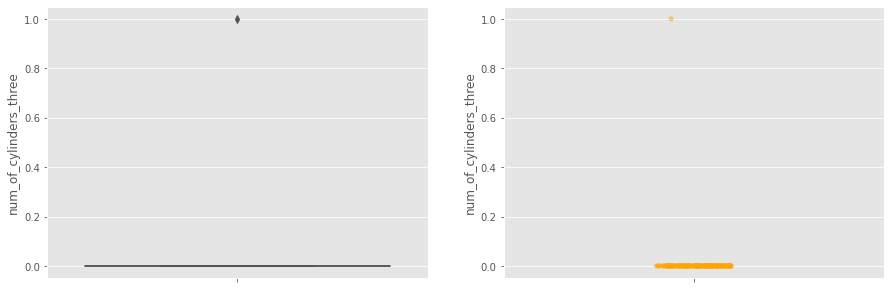


-------------------- num_of_cylinders_twelve --------------------


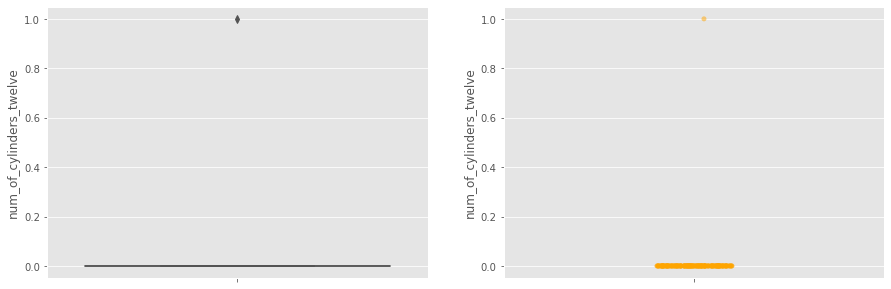


-------------------- num_of_cylinders_two --------------------


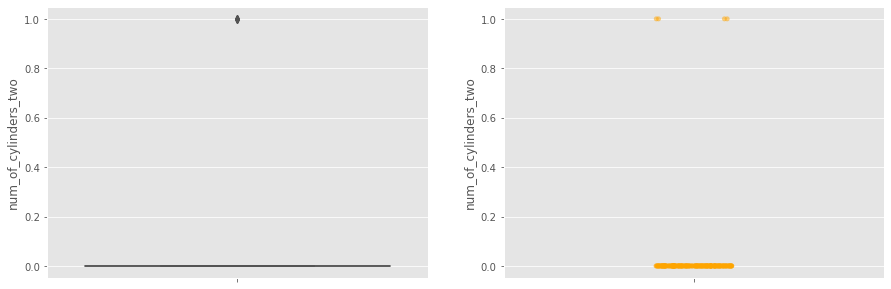


-------------------- fuel_system_2bbl --------------------


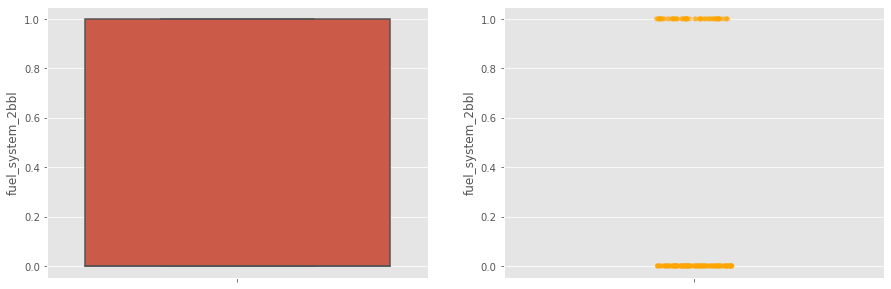


-------------------- fuel_system_4bbl --------------------


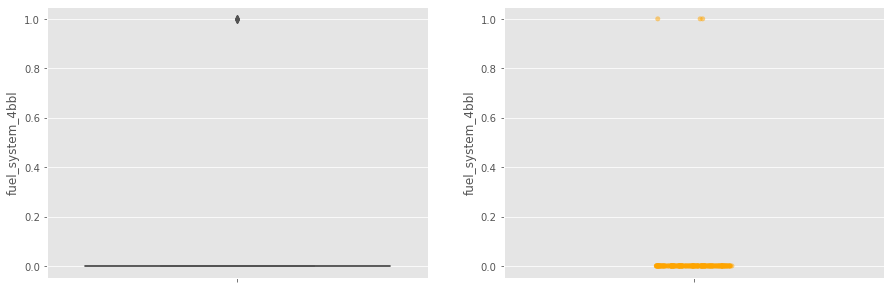


-------------------- fuel_system_idi --------------------


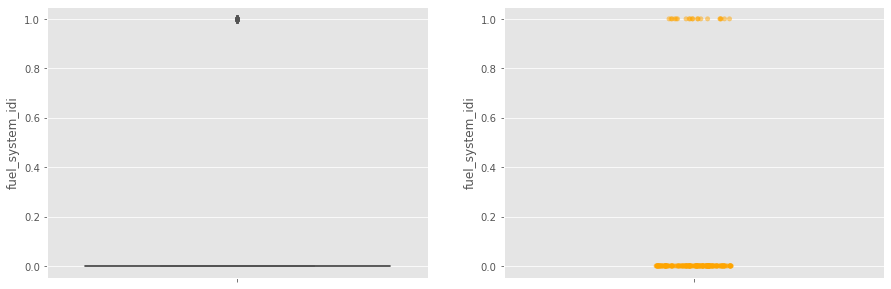


-------------------- fuel_system_mfi --------------------


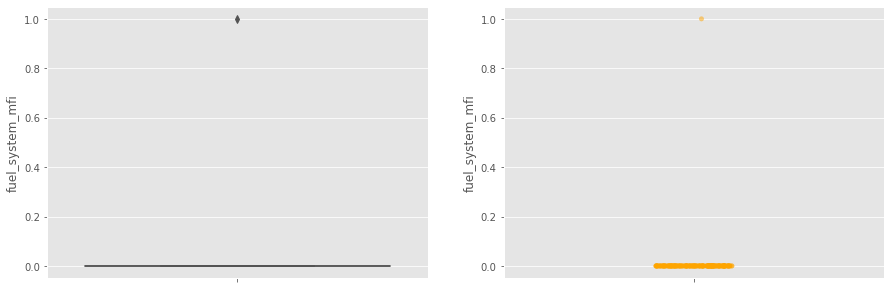


-------------------- fuel_system_mpfi --------------------


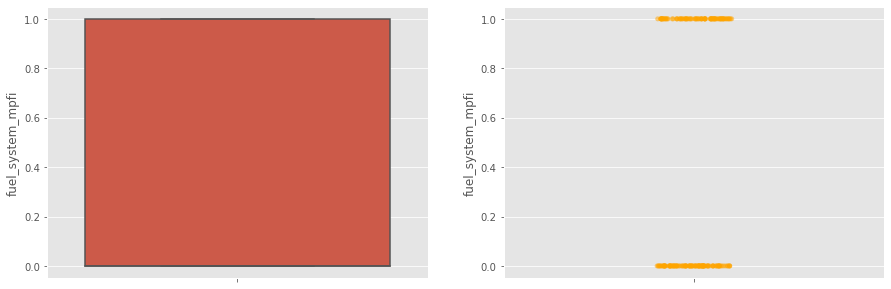


-------------------- fuel_system_spdi --------------------


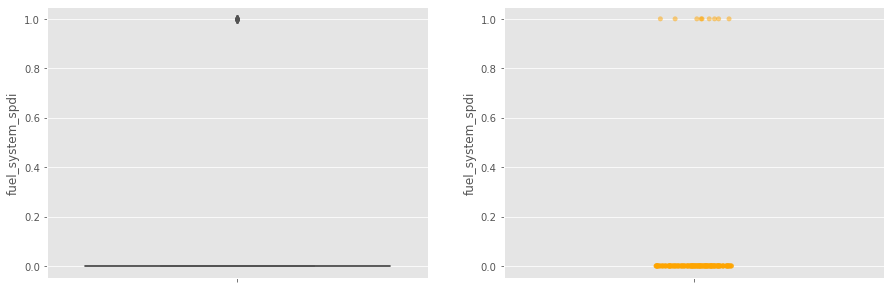


-------------------- fuel_system_spfi --------------------


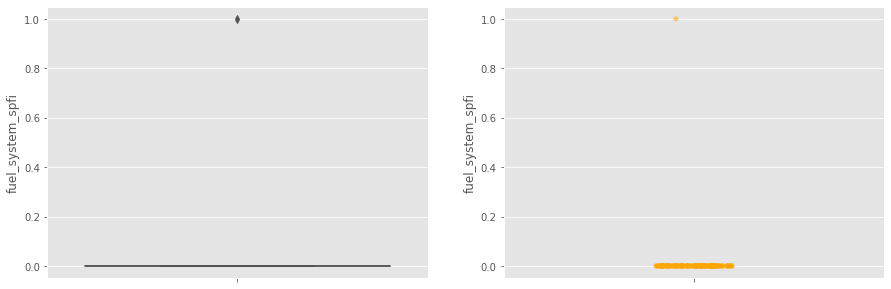

In [114]:
# show 2 graphs at the same time using subplots

for column in df1.corr().columns:
    print("--------------------",column,"--------------------")
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    sns.boxplot(y=column, data=df1, ax=axes[0])
    sns.stripplot(y=column, data=df1, jitter=True, dodge=True, marker='o', alpha=0.5, color="orange", ax=axes[1])
    plt.show()
    print("")

In [115]:
df_i = df1.copy()
df_i.head()

symboling  normalized_losses  Fuel_type  make  num_of_doors  \
0          3              115.0          1     1             0   
1          3              115.0          1     1             0   
2          1              115.0          1     1             0   
3          2              164.0          1     1             1   
4          2              164.0          1     1             1   

   engine_location  drive_wheels  length  width  height  curb_weight  \
0                1          88.6   168.8   64.1    48.8         2548   
1                1          88.6   168.8   64.1    48.8         2548   
2                1          94.5   171.2   65.5    52.4         2823   
3                1          99.8   176.6   66.2    54.3         2337   
4                1          99.4   176.6   66.4    54.3         2824   

   engine_size  bore  stroke  compression_ratio  horsepower  peak_rpm  \
0          130  3.47    2.68                9.0       111.0    5000.0   
1          130  3.47    2.68                9.0       111.0    5000.0   
2          152  2.68    3.47                9.0       154.0    5000.0   
3          109  3.19    3.40               10.0       102.0    5500.0   
4          136  3.19    3.40                8.0       115.0    5500.0   

   city_mpg  highway_mpg    price  aspiration_hardtop  aspiration_hatchback  \
0        21           27  13495.0                   0                     0   
1        21           27  16500.0                   0                     0   
2        19           26  16500.0                   0                     1   
3        24           30  13950.0                   0                     0   
4        18           22  17450.0                   0                     0   

   aspiration_sedan  aspiration_wagon  wheel_base_fwd  wheel_base_rwd  \
0                 0                 0               0               1   
1                 0                 0               0               1   
2                 0                 0               0               1   
3                 1                 0               1               0   
4                 1                 0               0               0   

   body_style_audi  body_style_bmw  body_style_chevrolet  body_style_dodge  \
0                0               0                     0                 0   
1                0               0                     0                 0   
2                0               0                     0                 0   
3                1               0                     0                 0   
4                1               0                     0                 0   

   body_style_honda  body_style_isuzu  body_style_jaguar  body_style_mazda  \
0                 0                 0                  0                 0   
1                 0                 0                  0                 0   
2                 0                 0                  0                 0   
3                 0                 0                  0                 0   
4                 0                 0                  0                 0   

   body_style_mercedes-benz  body_style_mercury  body_style_mitsubishi  \
0                         0                   0                      0   
1                         0                   0                      0   
2                         0                   0                      0   
3                         0                   0                      0   
4                         0                   0                      0   

   body_style_nissan  body_style_peugot  body_style_plymouth  \
0                  0                  0                    0   
1                  0                  0                    0   
2                  0                  0                    0   
3                  0                  0                    0   
4                  0                  0                    0   

   body_style_porsche  body_style_renault  body_styl

In [116]:
df_i.shape

(205, 66)

In [117]:
# Inter-Quartile range for each column
Q1 = df_i.quantile(0.25)
Q3 = df_i.quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
print(IQR)

symboling                      2.00
normalized_losses             36.00
Fuel_type                      0.00
make                           0.00
num_of_doors                   1.00
engine_location                0.00
drive_wheels                   7.90
length                        16.80
width                          2.80
height                         3.50
curb_weight                  790.00
engine_size                   44.00
bore                           0.43
stroke                         0.30
compression_ratio              0.80
horsepower                    46.00
peak_rpm                     700.00
city_mpg                      11.00
highway_mpg                    9.00
price                       8712.00
aspiration_hardtop             0.00
aspiration_hatchback           1.00
aspiration_sedan               1.00
aspiration_wagon               0.00
wheel_base_fwd                 1.00
wheel_base_rwd                 1.00
body_style_audi                0.00
body_style_bmw              

In [118]:
# The columns having non 0, 1 columns are the continuous columns which need to be considered for outlier detection.

In [119]:
Q1 = df_i.quantile(0.25)
Q3 = df_i.quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
df_i = df_i[~((df_i < lower_range) | (df_i > upper_range)).any(axis=1)]
df_i.head()

symboling  normalized_losses  Fuel_type  make  num_of_doors  \
0          3              115.0          1     1             0   
1          3              115.0          1     1             0   

   engine_location  drive_wheels  length  width  height  curb_weight  \
0                1          88.6   168.8   64.1    48.8         2548   
1                1          88.6   168.8   64.1    48.8         2548   

   engine_size  bore  stroke  compression_ratio  horsepower  peak_rpm  \
0          130  3.47    2.68                9.0       111.0    5000.0   
1          130  3.47    2.68                9.0       111.0    5000.0   

   city_mpg  highway_mpg    price  aspiration_hardtop  aspiration_hatchback  \
0        21           27  13495.0                   0                     0   
1        21           27  16500.0                   0                     0   

   aspiration_sedan  aspiration_wagon  wheel_base_fwd  wheel_base_rwd  \
0                 0                 0               0               1   
1                 0                 0               0               1   

   body_style_audi  body_style_bmw  body_style_chevrolet  body_style_dodge  \
0                0               0                     0                 0   
1                0               0                     0                 0   

   body_style_honda  body_style_isuzu  body_style_jaguar  body_style_mazda  \
0                 0                 0                  0                 0   
1                 0                 0                  0                 0   

   body_style_mercedes-benz  body_style_mercury  body_style_mitsubishi  \
0                         0                   0                      0   
1                         0                   0                      0   

   body_style_nissan  body_style_peugot  body_style_plymouth  \
0                  0                  0                    0   
1                  0                  0                    0   

   body_style_porsche  body_style_renault  body_style_saab  body_style_subaru  \
0                   0                   0                0                  0   
1                   0                   0                0                  0   

   body_style_toyota  body_style_volkswagen  body_style_volvo  \
0                  0                      0                 0   
1                  0                      0                 0   

   engine_type_dohcv  engine_type_l  engine_type_ohc  engine_type_ohcf  \
0                  0              0                0                 0   
1                  0              0                0                 0   

   engine_type_ohcv  engine_type_rotor  num_of_cylinders_five  \
0                 0                  0                      0   
1                 0                  0                      0   

   num_of_cylinders_four  num_of_cylinders_six  num_of_cylinders_three  \
0                      1                     0                       0   
1                      1                     0                       0   

   num_of_cylinders_twelve  num_of_cylinders_two  fuel_system_2bbl  \
0                        0                     0                 0   
1                        0                     0                 0   

   fuel_system_4bbl  fuel_system_idi  fuel_system_mfi  fuel_system_mpfi  \
0                 0                0                0                 1   
1                 0                0                0                 1   

   fuel_system_spdi  fuel_system_spfi  
0                 0                 0  
1                 0                 0

In [120]:
df_i.shape

(2, 66)

In [121]:
# We see that most of our data is removed, hence we wont remove the outliers, as they might be important.

# Sampling (Train and Test)

In [122]:
import scipy.stats as stats
from scipy.stats import zscore
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, binarize, MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV, KFold, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict

from scipy.stats import shapiro , levene , mannwhitneyu , chi2_contingency , chisquare, f_oneway
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
# from sklearn.svm import SVR
# import xgboost as xgb

from warnings import filterwarnings
filterwarnings('ignore')

In [123]:
X = df1.drop("price", axis=1)
y = df1["price"]

In [124]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()#instantiate
X_scaled = scaler.fit_transform(X)
X_scaled_df1 = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df1.head()

symboling  normalized_losses  Fuel_type  make  num_of_doors  \
0        1.0           0.261780        1.0   1.0           0.0   
1        1.0           0.261780        1.0   1.0           0.0   
2        0.6           0.261780        1.0   1.0           0.0   
3        0.8           0.518325        1.0   1.0           1.0   
4        0.8           0.518325        1.0   1.0           1.0   

   engine_location  drive_wheels    length     width    height  curb_weight  \
0              1.0      0.058309  0.413433  0.316667  0.083333     0.411171   
1              1.0      0.058309  0.413433  0.316667  0.083333     0.411171   
2              1.0      0.230321  0.449254  0.433333  0.383333     0.517843   
3              1.0      0.384840  0.529851  0.491667  0.541667     0.329325   
4              1.0      0.373178  0.529851  0.508333  0.541667     0.518231   

   engine_size      bore    stroke  compression_ratio  horsepower  peak_rpm  \
0     0.260377  0.664286  0.290476             0.1250    0.262500  0.346939   
1     0.260377  0.664286  0.290476             0.1250    0.262500  0.346939   
2     0.343396  0.100000  0.666667             0.1250    0.441667  0.346939   
3     0.181132  0.464286  0.633333             0.1875    0.225000  0.551020   
4     0.283019  0.464286  0.633333             0.0625    0.279167  0.551020   

   city_mpg  highway_mpg  aspiration_hardtop  aspiration_hatchback  \
0  0.222222     0.289474                 0.0                   0.0   
1  0.222222     0.289474                 0.0                   0.0   
2  0.166667     0.263158                 0.0                   1.0   
3  0.305556     0.368421                 0.0                   0.0   
4  0.138889     0.157895                 0.0                   0.0   

   aspiration_sedan  aspiration_wagon  wheel_base_fwd  wheel_base_rwd  \
0               0.0               0.0             0.0             1.0   
1               0.0               0.0             0.0             1.0   
2               0.0               0.0             0.0             1.0   
3               1.0               0.0             1.0             0.0   
4               1.0               0.0             0.0             0.0   

   body_style_audi  body_style_bmw  body_style_chevrolet  body_style_dodge  \
0              0.0             0.0                   0.0               0.0   
1              0.0             0.0                   0.0               0.0   
2              0.0             0.0                   0.0               0.0   
3              1.0             0.0                   0.0               0.0   
4              1.0             0.0                   0.0               0.0   

   body_style_honda  body_style_isuzu  body_style_jaguar  body_style_mazda  \
0               0.0               0.0                0.0               0.0   
1               0.0               0.0                0.0               0.0   
2               0.0               0.0                0.0               0.0   
3               0.0               0.0                0.0               0.0   
4               0.0               0.0                0.0               0.0   

   body_style_mercedes-benz  body_style_mercury  body_style_mitsubishi  \
0                       0.0                 0.0                    0.0   
1                       0.0                 0.0                    0.0   
2                       0.0                 0.0                    0.0   
3                       0.0                 0.0                    0.0   
4                       0.0                 0.0                    0.0   

   body_style_nissan  body_style_peugot  body_style_plymouth  \
0                0.0                0.0                  0.0   
1                0.0                0.0                  0.0   
2                0.0                0.0                  0.0   
3                0.0                0.0                  0.0   
4                0.0                0.0                  0.0   

   body_style_porsche  body_

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df1, y, test_size=0.2, random_state=0)

In [126]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("--------------------")
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (164, 65)
y_train:  (164,)
--------------------
X_test:  (41, 65)
y_test:  (41,)


# Linear Regression: OLS

In [127]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     54.41
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           8.84e-75
Time:                        11:53:42   Log-Likelihood:                -1803.0
No. Observations:                 205   AIC:                             3730.
Df Residuals:                     143   BIC:                             3936.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.686e+04   9023.180     -1.868      0.064   -3.47e+04     980.839
symboling                   24.7292    275.260      0.090      0.929    -519.376     568.834
normalized_losses           -3.3410      7.856     -0.425      0.671     -18.870      12.188
Fuel_type                -1.389e+04   4979.415     -2.789      0.006   -2.37e+04   -4046.915
make                     -1969.6080    895.730     -2.199      0.029   -3740.190    -199.026
num_of_doors               289.0771    539.450      0.536      0.593    -777.250    1355.404
engine_location          -1.366e+04   3789.117     -3.606      0.000   -2.12e+04   -6172.187
drive_wheels               221.0040     99.087      2.230      0.027      25.139     416.869
length                    -142.6646     54.094     -2.637      0.009    -249.591     -35.738
width                      860.3276    244.588      3.517      0.001     376.853    1343.803
height                    -198.6602    155.031     -1.281      0.202    -505.109     107.788
curb_weight                  5.7588      1.840      3.129      0.002       2.121       9.397
engine_size                105.9292     27.812      3.809      0.000      50.953     160.906
bore                     -3683.8269   2020.774     -1.823      0.070   -7678.276     310.622
stroke                   -1043.7868   1084.789     -0.962      0.338   -3188.080    1100.507
compression_ratio         -740.3445    532.537     -1.390      0.167   -1793.006     312.317
horsepower                 -17.7837     26.381     -0.674      0.501     -69.930      34.363
peak_rpm                     2.5336      0.708      3.579      0.000       1.134       3.933
city_mpg                    13.0190    146.761      0.089      0.929    -277.083     303.121
highway_mpg                 71.7680    125.263      0.573      0.568    -175.838     319.374
aspiration_hardtop       -2148.0572   1303.022     -1.649      0.101   -4723.730     427.616
aspiration_hatchback     -2953.0479   1211.763     -2.437      0.016   -5348.329    -557.766
aspiration_sedan         -2031.2705   1314.047     -1.546      0.124   -4628.738     566.197
aspiration_wagon         -2321.4174   1414.591     -1.641      0.103   -5117.628     474.793
wheel_base_fwd             732.0428    965.797      0.758      0.450   -1177.041    2641.126
wheel_base_rwd            1376.3040   1268.339      1.085      0.280   -1130.811    3883.419
body_style_audi           -566.8654   2681.917     -0.211      0.833   -5868.190    4734.460
body_style_bmw            5506.3342   2678.476      2.056      0.042     211.813    1.08e+04
body_style_chevrolet     -5024.5813   2456.937     -2.045      0.043   -9881.190    -167.973
body_style_dodge         -5736.2415   2112.261     -2.716      0.007   -9911.532   -1560.951
body_style_hon

## Backward Elimination

In [128]:
X = X.drop(["symboling"], axis=1)

In [129]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     55.70
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           1.18e-75
Time:                        11:53:42   Log-Likelihood:                -1803.0
No. Observations:                 205   AIC:                             3728.
Df Residuals:                     144   BIC:                             3931.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -1.68e+04   8970.286     -1.873      0.063   -3.45e+04     931.598
normalized_losses           -3.2809      7.801     -0.421      0.675     -18.699      12.138
Fuel_type                -1.382e+04   4910.063     -2.816      0.006   -2.35e+04   -4119.879
make                     -1984.9763    876.210     -2.265      0.025   -3716.870    -253.082
num_of_doors               274.1789    511.558      0.536      0.593    -736.953    1285.311
engine_location          -1.364e+04   3766.242     -3.621      0.000   -2.11e+04   -6193.333
drive_wheels               218.7887     95.639      2.288      0.024      29.752     407.825
length                    -143.1931     53.587     -2.672      0.008    -249.112     -37.274
width                      862.4918    242.559      3.556      0.001     383.056    1341.928
height                    -199.8413    153.940     -1.298      0.196    -504.114     104.432
curb_weight                  5.7595      1.834      3.140      0.002       2.134       9.385
engine_size                106.5489     26.850      3.968      0.000      53.477     159.621
bore                     -3683.3549   2013.796     -1.829      0.069   -7663.773     297.063
stroke                   -1049.9738   1078.865     -0.973      0.332   -3182.432    1082.485
compression_ratio         -734.9340    527.295     -1.394      0.166   -1777.172     307.304
horsepower                 -18.1854     25.909     -0.702      0.484     -69.397      33.026
peak_rpm                     2.5370      0.704      3.602      0.000       1.145       3.929
city_mpg                    12.6563    146.200      0.087      0.931    -276.318     301.631
highway_mpg                 71.9122    124.820      0.576      0.565    -174.804     318.629
aspiration_hardtop       -2154.1791   1296.749     -1.661      0.099   -4717.302     408.943
aspiration_hatchback     -2963.3241   1202.190     -2.465      0.015   -5339.542    -587.106
aspiration_sedan         -2045.9594   1299.337     -1.575      0.118   -4614.197     522.278
aspiration_wagon         -2331.9660   1404.845     -1.660      0.099   -5108.748     444.816
wheel_base_fwd             733.1110    962.392      0.762      0.447   -1169.129    2635.351
wheel_base_rwd            1392.2153   1251.579      1.112      0.268   -1081.625    3866.056
body_style_audi           -500.9618   2570.742     -0.195      0.846   -5582.226    4580.302
body_style_bmw            5507.6779   2669.193      2.063      0.041     231.818    1.08e+04
body_style_chevrolet     -5025.2659   2448.449     -2.052      0.042   -9864.809    -185.723
body_style_dodge         -5731.2247   2104.238     -2.724      0.007   -9890.409   -1572.040
body_style_honda         -3092.8432   2393.162     -1.292      0.198   -7823.108    1637.422
body_style_isu

In [130]:
X = X.drop(["city_mpg"], axis=1)

In [131]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     57.03
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           1.56e-76
Time:                        11:53:42   Log-Likelihood:                -1803.0
No. Observations:                 205   AIC:                             3726.
Df Residuals:                     145   BIC:                             3925.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.684e+04   8923.869     -1.888      0.061   -3.45e+04     792.871
normalized_losses           -3.3048      7.769     -0.425      0.671     -18.660      12.050
Fuel_type                -1.379e+04   4880.753     -2.826      0.005   -2.34e+04   -4148.041
make                     -1996.6050    862.883     -2.314      0.022   -3702.059    -291.151
num_of_doors               267.7800    504.454      0.531      0.596    -729.253    1264.813
engine_location          -1.364e+04   3752.867     -3.635      0.000   -2.11e+04   -6225.322
drive_wheels               218.2625     95.118      2.295      0.023      30.266     406.259
length                    -143.3351     53.379     -2.685      0.008    -248.836     -37.835
width                      865.0174    239.972      3.605      0.000     390.722    1339.313
height                    -199.2492    153.260     -1.300      0.196    -502.162     103.664
curb_weight                  5.7364      1.808      3.172      0.002       2.162       9.311
engine_size                106.8267     26.567      4.021      0.000      54.319     159.335
bore                     -3709.0448   1984.982     -1.869      0.064   -7632.281     214.191
stroke                   -1040.2763   1069.355     -0.973      0.332   -3153.814    1073.261
compression_ratio         -725.6737    514.561     -1.410      0.161   -1742.682     291.335
horsepower                 -18.4434     25.649     -0.719      0.473     -69.138      32.251
peak_rpm                     2.5362      0.702      3.613      0.000       1.149       3.923
highway_mpg                 81.1188     65.119      1.246      0.215     -47.587     209.825
aspiration_hardtop       -2162.2582   1288.953     -1.678      0.096   -4709.821     385.305
aspiration_hatchback     -2964.6836   1197.966     -2.475      0.014   -5332.415    -596.952
aspiration_sedan         -2046.7705   1294.849     -1.581      0.116   -4605.988     512.446
aspiration_wagon         -2325.4420   1398.013     -1.663      0.098   -5088.559     437.675
wheel_base_fwd             725.2371    954.800      0.760      0.449   -1161.886    2612.360
wheel_base_rwd            1379.1715   1238.217      1.114      0.267   -1068.114    3826.457
body_style_audi           -497.2787   2561.578     -0.194      0.846   -5560.133    4565.576
body_style_bmw            5543.0529   2628.685      2.109      0.037     347.564    1.07e+04
body_style_chevrolet     -4970.3696   2356.797     -2.109      0.037   -9628.484    -312.256
body_style_dodge         -5711.6155   2084.838     -2.740      0.007   -9832.214   -1591.017
body_style_honda         -3071.5397   2372.315     -1.295      0.197   -7760.325    1617.245
body_style_isuzu         -2328.1433   2165.435     -1.075      0.284   -6608.038    1951.752
body_style_jag

In [132]:
X = X.drop(["engine_type_l"], axis=1)

In [133]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     57.03
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           1.56e-76
Time:                        11:53:42   Log-Likelihood:                -1803.0
No. Observations:                 205   AIC:                             3726.
Df Residuals:                     145   BIC:                             3925.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.684e+04   8923.869     -1.888      0.061   -3.45e+04     792.871
normalized_losses           -3.3048      7.769     -0.425      0.671     -18.660      12.050
Fuel_type                -1.379e+04   4880.753     -2.826      0.005   -2.34e+04   -4148.041
make                     -1996.6050    862.883     -2.314      0.022   -3702.059    -291.151
num_of_doors               267.7800    504.454      0.531      0.596    -729.253    1264.813
engine_location          -1.364e+04   3752.867     -3.635      0.000   -2.11e+04   -6225.322
drive_wheels               218.2625     95.118      2.295      0.023      30.266     406.259
length                    -143.3351     53.379     -2.685      0.008    -248.836     -37.835
width                      865.0174    239.972      3.605      0.000     390.722    1339.313
height                    -199.2492    153.260     -1.300      0.196    -502.162     103.664
curb_weight                  5.7364      1.808      3.172      0.002       2.162       9.311
engine_size                106.8267     26.567      4.021      0.000      54.319     159.335
bore                     -3709.0448   1984.982     -1.869      0.064   -7632.281     214.191
stroke                   -1040.2763   1069.355     -0.973      0.332   -3153.814    1073.261
compression_ratio         -725.6737    514.561     -1.410      0.161   -1742.682     291.335
horsepower                 -18.4434     25.649     -0.719      0.473     -69.138      32.251
peak_rpm                     2.5362      0.702      3.613      0.000       1.149       3.923
highway_mpg                 81.1188     65.119      1.246      0.215     -47.587     209.825
aspiration_hardtop       -2162.2582   1288.953     -1.678      0.096   -4709.821     385.305
aspiration_hatchback     -2964.6836   1197.966     -2.475      0.014   -5332.415    -596.952
aspiration_sedan         -2046.7705   1294.849     -1.581      0.116   -4605.988     512.446
aspiration_wagon         -2325.4420   1398.013     -1.663      0.098   -5088.559     437.675
wheel_base_fwd             725.2371    954.800      0.760      0.449   -1161.886    2612.360
wheel_base_rwd            1379.1715   1238.217      1.114      0.267   -1068.114    3826.457
body_style_audi           -497.2787   2561.578     -0.194      0.846   -5560.133    4565.576
body_style_bmw            5543.0529   2628.685      2.109      0.037     347.564    1.07e+04
body_style_chevrolet     -4970.3696   2356.797     -2.109      0.037   -9628.484    -312.256
body_style_dodge         -5711.6155   2084.838     -2.740      0.007   -9832.214   -1591.017
body_style_honda         -3071.5397   2372.315     -1.295      0.197   -7760.325    1617.245
body_style_isuzu         -2328.1433   2165.435     -1.075      0.284   -6608.038    1951.752
body_style_jag

In [134]:
X = X.drop(["fuel_system_mfi"], axis=1)

In [135]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     58.41
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           2.05e-77
Time:                        11:53:42   Log-Likelihood:                -1803.0
No. Observations:                 205   AIC:                             3724.
Df Residuals:                     146   BIC:                             3920.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.672e+04   8857.549     -1.888      0.061   -3.42e+04     782.831
normalized_losses           -3.2432      7.732     -0.419      0.676     -18.525      12.039
Fuel_type                -1.369e+04   4812.275     -2.844      0.005   -2.32e+04   -4176.122
make                     -1982.3965    854.883     -2.319      0.022   -3671.941    -292.852
num_of_doors               253.3136    493.650      0.513      0.609    -722.309    1228.937
engine_location          -1.363e+04   3738.513     -3.645      0.000    -2.1e+04   -6236.628
drive_wheels               217.0144     94.442      2.298      0.023      30.364     403.664
length                    -142.7896     53.078     -2.690      0.008    -247.690     -37.889
width                      866.6592    238.923      3.627      0.000     394.464    1338.855
height                    -201.9123    151.736     -1.331      0.185    -501.795      97.971
curb_weight                  5.7524      1.799      3.197      0.002       2.196       9.308
engine_size                106.5785     26.427      4.033      0.000      54.349     158.807
bore                     -3708.1114   1978.319     -1.874      0.063   -7617.953     201.730
stroke                   -1034.2737   1065.037     -0.971      0.333   -3139.155    1070.608
compression_ratio         -729.0124    512.364     -1.423      0.157   -1741.621     283.596
horsepower                 -18.0516     25.432     -0.710      0.479     -68.315      32.212
peak_rpm                     2.5234      0.694      3.634      0.000       1.151       3.896
highway_mpg                 79.4938     64.012      1.242      0.216     -47.017     206.004
aspiration_hardtop       -2155.5280   1283.867     -1.679      0.095   -4692.893     381.837
aspiration_hatchback     -2953.0970   1191.509     -2.478      0.014   -5307.930    -598.264
aspiration_sedan         -2022.7015   1280.733     -1.579      0.116   -4553.873     508.470
aspiration_wagon         -2303.3199   1385.686     -1.662      0.099   -5041.915     435.275
wheel_base_fwd             732.8281    950.285      0.771      0.442   -1145.263    2610.919
wheel_base_rwd            1359.1082   1226.969      1.108      0.270   -1065.808    3784.024
body_style_audi           -510.6978   2551.461     -0.200      0.842   -5553.266    4531.871
body_style_bmw            5548.2673   2619.649      2.118      0.036     370.936    1.07e+04
body_style_chevrolet     -4952.5369   2345.958     -2.111      0.036   -9588.961    -316.112
body_style_dodge         -5686.0440   2071.012     -2.746      0.007   -9779.079   -1593.009
body_style_honda         -3196.0731   2217.500     -1.441      0.152   -7578.620    1186.474
body_style_isuzu         -2319.5491   2157.434     -1.075      0.284   -6583.385    1944.287
body_style_jag

In [136]:
X = X.drop(["body_style_subaru"], axis=1)

In [137]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     58.41
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           2.05e-77
Time:                        11:53:42   Log-Likelihood:                -1803.0
No. Observations:                 205   AIC:                             3724.
Df Residuals:                     146   BIC:                             3920.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.705e+04   1.08e+04     -1.578      0.117   -3.84e+04    4306.950
normalized_losses           -3.2432      7.732     -0.419      0.676     -18.525      12.039
Fuel_type                -1.385e+04   5528.355     -2.505      0.013   -2.48e+04   -2924.906
make                     -1982.3965    854.883     -2.319      0.022   -3671.941    -292.852
num_of_doors               253.3136    493.650      0.513      0.609    -722.309    1228.937
engine_location          -1.313e+04   3738.512     -3.513      0.001   -2.05e+04   -5744.611
drive_wheels               217.0144     94.442      2.298      0.023      30.364     403.664
length                    -142.7896     53.078     -2.690      0.008    -247.690     -37.889
width                      866.6592    238.923      3.627      0.000     394.464    1338.855
height                    -201.9123    151.736     -1.331      0.185    -501.795      97.971
curb_weight                  5.7524      1.799      3.197      0.002       2.196       9.308
engine_size                106.5785     26.427      4.033      0.000      54.349     158.807
bore                     -3708.1114   1978.319     -1.874      0.063   -7617.953     201.730
stroke                   -1034.2737   1065.037     -0.971      0.333   -3139.155    1070.608
compression_ratio         -729.0124    512.364     -1.423      0.157   -1741.621     283.596
horsepower                 -18.0516     25.432     -0.710      0.479     -68.315      32.212
peak_rpm                     2.5234      0.694      3.634      0.000       1.151       3.896
highway_mpg                 79.4938     64.012      1.242      0.216     -47.017     206.004
aspiration_hardtop       -2155.5280   1283.867     -1.679      0.095   -4692.893     381.837
aspiration_hatchback     -2953.0970   1191.509     -2.478      0.014   -5307.930    -598.264
aspiration_sedan         -2022.7015   1280.733     -1.579      0.116   -4553.873     508.470
aspiration_wagon         -2303.3199   1385.686     -1.662      0.099   -5041.915     435.275
wheel_base_fwd             732.8281    950.285      0.771      0.442   -1145.263    2610.919
wheel_base_rwd            1359.1082   1226.969      1.108      0.270   -1065.808    3784.024
body_style_audi           -510.6978   2551.461     -0.200      0.842   -5553.266    4531.871
body_style_bmw            5548.2673   2619.649      2.118      0.036     370.936    1.07e+04
body_style_chevrolet     -4952.5369   2345.958     -2.111      0.036   -9588.961    -316.112
body_style_dodge         -5686.0440   2071.012     -2.746      0.007   -9779.079   -1593.009
body_style_honda         -3196.0731   2217.500     -1.441      0.152   -7578.620    1186.474
body_style_isuzu         -2319.5491   2157.434     -1.075      0.284   -6583.385    1944.287
body_style_jag

In [138]:
X = X.drop(["fuel_system_spfi"], axis=1)

In [139]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     59.82
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           2.69e-78
Time:                        11:53:42   Log-Likelihood:                -1803.1
No. Observations:                 205   AIC:                             3722.
Df Residuals:                     147   BIC:                             3915.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.707e+04   1.08e+04     -1.585      0.115   -3.84e+04    4217.526
normalized_losses           -3.4577      7.631     -0.453      0.651     -18.539      11.623
Fuel_type                -1.377e+04   5493.740     -2.506      0.013   -2.46e+04   -2909.168
make                     -1970.2625    849.896     -2.318      0.022   -3649.856    -290.669
num_of_doors               247.1687    491.062      0.503      0.615    -723.285    1217.623
engine_location          -1.317e+04   3721.772     -3.539      0.001   -2.05e+04   -5814.526
drive_wheels               215.4045     93.784      2.297      0.023      30.066     400.744
length                    -142.2731     52.841     -2.692      0.008    -246.698     -37.848
width                      870.1358    237.499      3.664      0.000     400.783    1339.488
height                    -202.4630    151.214     -1.339      0.183    -501.297      96.371
curb_weight                  5.7945      1.781      3.254      0.001       2.275       9.314
engine_size                105.8404     26.078      4.059      0.000      54.305     157.376
bore                     -3698.3797   1971.236     -1.876      0.063   -7594.001     197.242
stroke                   -1038.1865   1061.369     -0.978      0.330   -3135.699    1059.326
compression_ratio         -722.9197    509.767     -1.418      0.158   -1730.338     284.498
horsepower                 -18.2208     25.335     -0.719      0.473     -68.288      31.847
peak_rpm                     2.5139      0.690      3.641      0.000       1.149       3.879
highway_mpg                 77.9256     63.313      1.231      0.220     -47.197     203.048
aspiration_hardtop       -2138.6663   1276.851     -1.675      0.096   -4662.022     384.690
aspiration_hatchback     -2928.6630   1181.232     -2.479      0.014   -5263.054    -594.272
aspiration_sedan         -2004.2044   1273.146     -1.574      0.118   -4520.238     511.829
aspiration_wagon         -2295.5053   1380.591     -1.663      0.099   -5023.876     432.865
wheel_base_fwd             737.9937    946.818      0.779      0.437   -1133.139    2609.127
wheel_base_rwd            1382.7560   1217.155      1.136      0.258   -1022.627    3788.139
body_style_audi           -489.3592   2540.844     -0.193      0.848   -5510.659    4531.941
body_style_bmw            5568.7375   2609.043      2.134      0.034     412.659    1.07e+04
body_style_chevrolet     -4913.1717   2329.881     -2.109      0.037   -9517.561    -308.782
body_style_dodge         -5656.1572   2058.752     -2.747      0.007   -9724.731   -1587.583
body_style_honda         -3262.2168   2185.060     -1.493      0.138   -7580.405    1055.971
body_style_isuzu         -2196.7117   2059.700     -1.067      0.288   -6267.159    1873.735
body_style_jag

In [140]:
X = X.drop(["body_style_audi"], axis=1)

In [141]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     61.29
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           3.47e-79
Time:                        11:53:42   Log-Likelihood:                -1803.1
No. Observations:                 205   AIC:                             3720.
Df Residuals:                     148   BIC:                             3910.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.671e+04   1.06e+04     -1.580      0.116   -3.76e+04    4183.209
normalized_losses           -4.0146      7.039     -0.570      0.569     -17.925       9.895
Fuel_type                -1.367e+04   5452.755     -2.507      0.013   -2.44e+04   -2893.715
make                     -1962.2307    846.107     -2.319      0.022   -3634.241    -290.220
num_of_doors               253.5263    488.355      0.519      0.604    -711.524    1218.576
engine_location          -1.286e+04   3354.196     -3.835      0.000   -1.95e+04   -6235.134
drive_wheels               214.0290     93.207      2.296      0.023      29.841     398.217
length                    -141.7612     52.602     -2.695      0.008    -245.709     -37.814
width                      865.0849    235.277      3.677      0.000     400.149    1330.021
height                    -207.4383    148.506     -1.397      0.165    -500.904      86.027
curb_weight                  5.7998      1.775      3.268      0.001       2.293       9.307
engine_size                106.7830     25.531      4.183      0.000      56.331     157.235
bore                     -3806.5466   1883.380     -2.021      0.045   -7528.337     -84.757
stroke                   -1040.4392   1057.846     -0.984      0.327   -3130.873    1049.994
compression_ratio         -737.1504    502.740     -1.466      0.145   -1730.626     256.325
horsepower                 -18.7716     25.091     -0.748      0.456     -68.354      30.811
peak_rpm                     2.4888      0.676      3.682      0.000       1.153       3.824
highway_mpg                 77.4383     63.057      1.228      0.221     -47.170     202.046
aspiration_hardtop       -2162.9014   1266.495     -1.708      0.090   -4665.652     339.849
aspiration_hatchback     -2969.2235   1158.520     -2.563      0.011   -5258.602    -679.845
aspiration_sedan         -2047.2298   1249.310     -1.639      0.103   -4516.018     421.559
aspiration_wagon         -2341.7845   1355.090     -1.728      0.086   -5019.608     336.039
wheel_base_fwd             747.7840    942.372      0.794      0.429   -1114.458    2610.026
wheel_base_rwd            1442.4216   1173.235      1.229      0.221    -876.034    3760.878
body_style_bmw            5898.7099   1961.274      3.008      0.003    2022.992    9774.428
body_style_chevrolet     -4653.9570   1895.625     -2.455      0.015   -8399.944    -907.970
body_style_dodge         -5381.9740   1482.364     -3.631      0.000   -8311.307   -2452.641
body_style_honda         -2984.4705   1636.238     -1.824      0.070   -6217.876     248.935
body_style_isuzu         -1954.0062   1623.903     -1.203      0.231   -5163.037    1255.024
body_style_jaguar        -2034.9036   2847.148     -0.715      0.476   -7661.217    3591.410
body_style_maz

In [142]:
X = X.drop(["num_of_cylinders_four"], axis=1)

In [143]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     62.81
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           4.44e-80
Time:                        11:53:42   Log-Likelihood:                -1803.1
No. Observations:                 205   AIC:                             3718.
Df Residuals:                     149   BIC:                             3904.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.691e+04   1.05e+04     -1.612      0.109   -3.76e+04    3815.108
normalized_losses           -3.8395      6.961     -0.552      0.582     -17.595       9.916
Fuel_type                -1.377e+04   5413.051     -2.543      0.012   -2.45e+04   -3070.599
make                     -1969.2835    842.636     -2.337      0.021   -3634.344    -304.223
num_of_doors               255.3579    486.693      0.525      0.601    -706.353    1217.069
engine_location          -1.293e+04   3326.002     -3.888      0.000   -1.95e+04   -6359.207
drive_wheels               215.9765     92.393      2.338      0.021      33.406     398.547
length                    -142.8617     52.142     -2.740      0.007    -245.895     -39.829
width                      871.0819    232.589      3.745      0.000     411.483    1330.680
height                    -211.2793    146.773     -1.440      0.152    -501.304      78.745
curb_weight                  5.8002      1.769      3.279      0.001       2.305       9.296
engine_size                110.0159     19.641      5.601      0.000      71.205     148.827
bore                     -4029.0464   1511.288     -2.666      0.009   -7015.372   -1042.721
stroke                   -1021.0897   1049.974     -0.972      0.332   -3095.853    1053.673
compression_ratio         -740.7699    500.790     -1.479      0.141   -1730.337     248.797
horsepower                 -19.7185     24.557     -0.803      0.423     -68.243      28.806
peak_rpm                     2.4987      0.672      3.719      0.000       1.171       3.826
highway_mpg                 76.8238     62.778      1.224      0.223     -47.226     200.874
aspiration_hardtop       -2178.7532   1259.912     -1.729      0.086   -4668.355     310.849
aspiration_hatchback     -2981.7277   1153.083     -2.586      0.011   -5260.236    -703.220
aspiration_sedan         -2043.1147   1245.107     -1.641      0.103   -4503.462     417.232
aspiration_wagon         -2332.9138   1349.986     -1.728      0.086   -5000.503     334.676
wheel_base_fwd             731.6528    935.853      0.782      0.436   -1117.606    2580.911
wheel_base_rwd            1405.4705   1154.730      1.217      0.225    -876.292    3687.233
body_style_bmw            5993.6784   1896.273      3.161      0.002    2246.617    9740.739
body_style_chevrolet     -4654.6731   1889.503     -2.463      0.015   -8388.355    -920.991
body_style_dodge         -5417.5251   1466.826     -3.693      0.000   -8315.992   -2519.058
body_style_honda         -3019.1665   1621.684     -1.862      0.065   -6223.635     185.302
body_style_isuzu         -1945.1937   1618.060     -1.202      0.231   -5142.501    1252.114
body_style_jaguar        -2228.8781   2666.715     -0.836      0.405   -7498.342    3040.586
body_style_maz

In [144]:
X = X.drop(["engine_type_ohc"], axis=1)

In [145]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     64.36
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           5.75e-81
Time:                        11:53:42   Log-Likelihood:                -1803.2
No. Observations:                 205   AIC:                             3716.
Df Residuals:                     150   BIC:                             3899.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.646e+04   1.04e+04     -1.590      0.114   -3.69e+04    3990.437
normalized_losses           -3.9715      6.927     -0.573      0.567     -17.658       9.715
Fuel_type                -1.369e+04   5390.251     -2.539      0.012   -2.43e+04   -3036.955
make                     -1953.5657    838.469     -2.330      0.021   -3610.302    -296.829
num_of_doors               258.6914    485.090      0.533      0.595    -699.801    1217.184
engine_location          -1.307e+04   3286.343     -3.976      0.000   -1.96e+04   -6571.526
drive_wheels               217.0025     92.050      2.357      0.020      35.120     398.885
length                    -144.9347     51.530     -2.813      0.006    -246.752     -43.117
width                      880.6744    229.703      3.834      0.000     426.803    1334.545
height                    -214.0936    146.031     -1.466      0.145    -502.637      74.449
curb_weight                  5.9090      1.727      3.422      0.001       2.497       9.321
engine_size                109.9758     19.581      5.616      0.000      71.286     148.666
bore                     -4130.2567   1469.057     -2.812      0.006   -7032.974   -1227.539
stroke                    -930.5238   1003.029     -0.928      0.355   -2912.414    1051.366
compression_ratio         -767.2036    491.558     -1.561      0.121   -1738.475     204.068
horsepower                 -21.6567     23.628     -0.917      0.361     -68.344      25.030
peak_rpm                     2.4480      0.648      3.775      0.000       1.167       3.729
highway_mpg                 77.0376     62.583      1.231      0.220     -46.621     200.696
aspiration_hardtop       -2091.6295   1222.599     -1.711      0.089   -4507.369     324.110
aspiration_hatchback     -2938.0651   1140.480     -2.576      0.011   -5191.546    -684.584
aspiration_sedan         -1996.8058   1231.845     -1.621      0.107   -4430.815     437.204
aspiration_wagon         -2298.1378   1340.966     -1.714      0.089   -4947.760     351.485
wheel_base_fwd             748.4064    931.367      0.804      0.423   -1091.886    2588.699
wheel_base_rwd            1411.1524   1151.072      1.226      0.222    -863.257    3685.562
body_style_bmw            6280.7142   1634.950      3.842      0.000    3050.208    9511.220
body_style_chevrolet     -4542.2371   1846.709     -2.460      0.015   -8191.159    -893.316
body_style_dodge         -5329.5989   1433.176     -3.719      0.000   -8161.418   -2497.780
body_style_honda         -2920.9228   1583.783     -1.844      0.067   -6050.328     208.483
body_style_isuzu         -1839.1363   1574.561     -1.168      0.245   -4950.320    1272.047
body_style_jaguar        -2407.7412   2591.989     -0.929      0.354   -7529.267    2713.785
body_style_maz

In [146]:
X = X.drop(["num_of_cylinders_twelve"], axis=1)

In [147]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     65.97
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           7.34e-82
Time:                        11:53:43   Log-Likelihood:                -1803.2
No. Observations:                 205   AIC:                             3714.
Df Residuals:                     151   BIC:                             3894.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -1.63e+04   1.03e+04     -1.581      0.116   -3.67e+04    4063.450
normalized_losses           -3.7866      6.877     -0.551      0.583     -17.375       9.802
Fuel_type                -1.418e+04   5111.028     -2.774      0.006   -2.43e+04   -4081.784
make                     -1977.3858    832.067     -2.376      0.019   -3621.383    -333.388
num_of_doors               263.8046    483.315      0.546      0.586    -691.129    1218.738
engine_location          -1.321e+04   3241.803     -4.074      0.000   -1.96e+04   -6800.758
drive_wheels               220.3215     91.087      2.419      0.017      40.351     400.292
length                    -144.7260     51.369     -2.817      0.005    -246.220     -43.232
width                      883.3442    228.831      3.860      0.000     431.220    1335.468
height                    -214.4772    145.583     -1.473      0.143    -502.120      73.166
curb_weight                  6.0042      1.691      3.550      0.001       2.663       9.346
engine_size                109.1644     19.329      5.648      0.000      70.974     147.355
bore                     -4022.5134   1418.870     -2.835      0.005   -6825.915   -1219.112
stroke                    -856.4372    968.310     -0.884      0.378   -2769.623    1056.749
compression_ratio         -859.4542    378.785     -2.269      0.025   -1607.858    -111.051
horsepower                 -25.3647     19.968     -1.270      0.206     -64.817      14.087
peak_rpm                     2.5106      0.611      4.108      0.000       1.303       3.718
highway_mpg                 81.1321     60.848      1.333      0.184     -39.092     201.356
aspiration_hardtop       -2061.2391   1214.587     -1.697      0.092   -4461.019     338.540
aspiration_hatchback     -2943.9738   1136.854     -2.590      0.011   -5190.169    -697.778
aspiration_sedan         -2014.7692   1226.624     -1.643      0.103   -4438.331     408.793
aspiration_wagon         -2334.4970   1331.279     -1.754      0.082   -4964.837     295.842
wheel_base_fwd             771.7425    925.210      0.834      0.406   -1056.287    2599.772
wheel_base_rwd            1458.3994   1136.485      1.283      0.201    -787.066    3703.865
body_style_bmw            6072.2596   1470.782      4.129      0.000    3166.289    8978.230
body_style_chevrolet     -4634.9670   1814.394     -2.555      0.012   -8219.845   -1050.089
body_style_dodge         -5476.8316   1339.883     -4.088      0.000   -8124.170   -2829.493
body_style_honda         -3024.1037   1540.211     -1.963      0.051   -6067.251      19.044
body_style_isuzu         -1949.2713   1525.269     -1.278      0.203   -4962.896    1064.353
body_style_jaguar        -2808.7796   2202.380     -1.275      0.204   -7160.239    1542.680
body_style_maz

In [148]:
X = X.drop(["fuel_system_idi"], axis=1)

In [149]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     65.97
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           7.34e-82
Time:                        11:53:43   Log-Likelihood:                -1803.2
No. Observations:                 205   AIC:                             3714.
Df Residuals:                     151   BIC:                             3894.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.842e+04   1.64e+04     -1.121      0.264   -5.09e+04     1.4e+04
normalized_losses           -3.7866      6.877     -0.551      0.583     -17.375       9.802
Fuel_type                -1.206e+04   5433.845     -2.220      0.028   -2.28e+04   -1326.270
make                     -1977.3858    832.067     -2.376      0.019   -3621.383    -333.388
num_of_doors               263.8046    483.315      0.546      0.586    -691.129    1218.738
engine_location          -1.321e+04   3241.803     -4.074      0.000   -1.96e+04   -6800.758
drive_wheels               220.3215     91.087      2.419      0.017      40.351     400.292
length                    -144.7260     51.369     -2.817      0.005    -246.220     -43.232
width                      883.3442    228.831      3.860      0.000     431.220    1335.468
height                    -214.4772    145.583     -1.473      0.143    -502.120      73.166
curb_weight                  6.0042      1.691      3.550      0.001       2.663       9.346
engine_size                109.1644     19.329      5.648      0.000      70.974     147.355
bore                     -4022.5134   1418.870     -2.835      0.005   -6825.915   -1219.112
stroke                    -856.4372    968.310     -0.884      0.378   -2769.623    1056.749
compression_ratio         -859.4542    378.785     -2.269      0.025   -1607.858    -111.051
horsepower                 -25.3647     19.968     -1.270      0.206     -64.817      14.087
peak_rpm                     2.5106      0.611      4.108      0.000       1.303       3.718
highway_mpg                 81.1321     60.848      1.333      0.184     -39.092     201.356
aspiration_hardtop       -2061.2391   1214.587     -1.697      0.092   -4461.019     338.540
aspiration_hatchback     -2943.9738   1136.854     -2.590      0.011   -5190.169    -697.778
aspiration_sedan         -2014.7692   1226.624     -1.643      0.103   -4438.331     408.793
aspiration_wagon         -2334.4970   1331.279     -1.754      0.082   -4964.837     295.842
wheel_base_fwd             771.7425    925.210      0.834      0.406   -1056.287    2599.772
wheel_base_rwd            1458.3994   1136.485      1.283      0.201    -787.066    3703.865
body_style_bmw            6072.2596   1470.782      4.129      0.000    3166.289    8978.230
body_style_chevrolet     -4634.9670   1814.394     -2.555      0.012   -8219.845   -1050.089
body_style_dodge         -5476.8316   1339.883     -4.088      0.000   -8124.170   -2829.493
body_style_honda         -3024.1037   1540.211     -1.963      0.051   -6067.251      19.044
body_style_isuzu         -1949.2713   1525.269     -1.278      0.203   -4962.896    1064.353
body_style_jaguar        -2808.7796   2202.380     -1.275      0.204   -7160.239    1542.680
body_style_maz

In [150]:
X = X.drop(["fuel_system_4bbl"], axis=1)

In [151]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     67.58
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           9.92e-83
Time:                        11:53:43   Log-Likelihood:                -1803.4
No. Observations:                 205   AIC:                             3713.
Df Residuals:                     152   BIC:                             3889.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.839e+04   1.64e+04     -1.122      0.263   -5.08e+04     1.4e+04
normalized_losses           -3.6738      6.856     -0.536      0.593     -17.219       9.871
Fuel_type                -1.227e+04   5402.963     -2.271      0.025   -2.29e+04   -1593.444
make                     -1959.4280    829.102     -2.363      0.019   -3597.479    -321.377
num_of_doors               269.1499    481.956      0.558      0.577    -683.048    1221.348
engine_location          -1.318e+04   3233.039     -4.076      0.000   -1.96e+04   -6790.722
drive_wheels               219.0781     90.819      2.412      0.017      39.649     398.508
length                    -145.1880     51.229     -2.834      0.005    -246.401     -43.975
width                      879.4617    228.104      3.856      0.000     428.797    1330.126
height                    -209.6525    144.862     -1.447      0.150    -495.856      76.551
curb_weight                  6.0335      1.686      3.579      0.000       2.703       9.364
engine_size                109.0483     19.279      5.656      0.000      70.960     147.137
bore                     -4032.0171   1415.121     -2.849      0.005   -6827.864   -1236.170
stroke                    -865.6247    965.656     -0.896      0.371   -2773.466    1042.216
compression_ratio         -857.1324    377.791     -2.269      0.025   -1603.531    -110.734
horsepower                 -24.4385     19.822     -1.233      0.220     -63.602      14.725
peak_rpm                     2.4933      0.608      4.098      0.000       1.291       3.695
highway_mpg                 82.8772     60.584      1.368      0.173     -36.818     202.573
aspiration_hardtop       -2054.9770   1211.427     -1.696      0.092   -4448.386     338.432
aspiration_hatchback     -2917.6565   1132.628     -2.576      0.011   -5155.382    -679.931
aspiration_sedan         -2011.7364   1223.487     -1.644      0.102   -4428.973     405.500
aspiration_wagon         -2332.5503   1327.886     -1.757      0.081   -4956.048     290.947
wheel_base_fwd             782.5029    922.583      0.848      0.398   -1040.239    2605.245
wheel_base_rwd            1452.2645   1133.522      1.281      0.202    -787.227    3691.756
body_style_bmw            6065.4131   1466.971      4.135      0.000    3167.127    8963.700
body_style_chevrolet     -4616.7640   1809.379     -2.552      0.012   -8191.543   -1041.985
body_style_dodge         -5438.0829   1334.018     -4.076      0.000   -8073.694   -2802.471
body_style_honda         -2828.0795   1480.650     -1.910      0.058   -5753.390      97.231
body_style_isuzu         -1869.4876   1512.222     -1.236      0.218   -4857.175    1118.200
body_style_jaguar        -2823.1223   2196.573     -1.285      0.201   -7162.879    1516.634
body_style_maz

In [152]:
X = X.drop(["normalized_losses"], axis=1)

In [153]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     69.22
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           1.36e-83
Time:                        11:53:43   Log-Likelihood:                -1803.6
No. Observations:                 205   AIC:                             3711.
Df Residuals:                     153   BIC:                             3884.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -1.86e+04   1.63e+04     -1.138      0.257   -5.09e+04    1.37e+04
Fuel_type                -1.231e+04   5389.720     -2.284      0.024    -2.3e+04   -1664.831
make                     -1917.2790    823.437     -2.328      0.021   -3544.054    -290.504
num_of_doors               305.5568    476.031      0.642      0.522    -634.885    1245.999
engine_location          -1.332e+04   3214.553     -4.144      0.000   -1.97e+04   -6970.191
drive_wheels               220.8633     90.546      2.439      0.016      41.982     399.745
length                    -145.2229     51.109     -2.841      0.005    -246.194     -44.252
width                      868.4206    226.642      3.832      0.000     420.668    1316.173
height                    -193.6712    141.429     -1.369      0.173    -473.076      85.734
curb_weight                  6.0119      1.681      3.576      0.000       2.690       9.334
engine_size                108.5231     19.209      5.650      0.000      70.575     146.472
bore                     -3975.6784   1407.919     -2.824      0.005   -6757.150   -1194.207
stroke                    -907.0803    960.307     -0.945      0.346   -2804.254     990.094
compression_ratio         -856.4019    376.907     -2.272      0.024   -1601.016    -111.788
horsepower                 -22.5421     19.459     -1.158      0.248     -60.984      15.900
peak_rpm                     2.4070      0.585      4.112      0.000       1.250       3.563
highway_mpg                 82.5338     60.439      1.366      0.174     -36.869     201.937
aspiration_hardtop       -2116.8967   1203.091     -1.760      0.080   -4493.712     259.918
aspiration_hatchback     -2990.0423   1121.921     -2.665      0.009   -5206.499    -773.586
aspiration_sedan         -2093.6513   1211.069     -1.729      0.086   -4486.228     298.926
aspiration_wagon         -2378.3409   1322.044     -1.799      0.074   -4990.157     233.476
wheel_base_fwd             831.7669    915.850      0.908      0.365    -977.578    2641.112
wheel_base_rwd            1360.4992   1117.898      1.217      0.225    -848.010    3569.008
body_style_bmw            5992.9486   1457.319      4.112      0.000    3113.884    8872.013
body_style_chevrolet     -4485.1394   1788.448     -2.508      0.013   -8018.380    -951.898
body_style_dodge         -5459.7441   1330.296     -4.104      0.000   -8087.863   -2831.625
body_style_honda         -2721.6727   1463.853     -1.859      0.065   -5613.646     170.300
body_style_isuzu         -1793.9499   1502.126     -1.194      0.234   -4761.536    1173.636
body_style_jaguar        -2747.9846   2186.981     -1.257      0.211   -7068.563    1572.593
body_style_mazda         -2643.4348   1171.656     -2.256      0.025   -4958.147    -328.723
body_style_mer

In [154]:
X = X.drop(["num_of_doors"], axis=1)

In [155]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     70.87
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           1.97e-84
Time:                        11:53:43   Log-Likelihood:                -1803.9
No. Observations:                 205   AIC:                             3710.
Df Residuals:                     154   BIC:                             3879.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.902e+04   1.63e+04     -1.167      0.245   -5.12e+04    1.32e+04
Fuel_type                -1.241e+04   5377.475     -2.307      0.022    -2.3e+04   -1782.628
make                     -1895.0946    821.140     -2.308      0.022   -3517.246    -272.943
engine_location          -1.346e+04   3200.621     -4.207      0.000   -1.98e+04   -7141.734
drive_wheels               223.3974     90.287      2.474      0.014      45.037     401.758
length                    -143.0761     50.902     -2.811      0.006    -243.633     -42.519
width                      868.8515    226.208      3.841      0.000     421.980    1315.723
height                    -192.4751    141.146     -1.364      0.175    -471.307      86.357
curb_weight                  6.1198      1.670      3.665      0.000       2.821       9.418
engine_size                106.4968     18.911      5.631      0.000      69.138     143.856
bore                     -3880.9053   1397.480     -2.777      0.006   -6641.611   -1120.199
stroke                    -922.6225    958.168     -0.963      0.337   -2815.471     970.226
compression_ratio         -866.5042    375.859     -2.305      0.022   -1609.009    -124.000
horsepower                 -22.6785     19.420     -1.168      0.245     -61.043      15.686
peak_rpm                     2.3683      0.581      4.075      0.000       1.220       3.516
highway_mpg                 83.5423     60.303      1.385      0.168     -35.586     202.671
aspiration_hardtop       -2127.5406   1200.678     -1.772      0.078   -4499.466     244.384
aspiration_hatchback     -2978.4535   1119.632     -2.660      0.009   -5190.273    -766.634
aspiration_sedan         -1895.5945   1168.865     -1.622      0.107   -4204.674     413.485
aspiration_wagon         -2186.9308   1285.512     -1.701      0.091   -4726.445     352.584
wheel_base_fwd             856.5577    913.287      0.938      0.350    -947.630    2660.745
wheel_base_rwd            1263.0852   1105.433      1.143      0.255    -920.684    3446.854
body_style_bmw            5941.2221   1452.308      4.091      0.000    3072.204    8810.240
body_style_chevrolet     -4454.4349   1784.392     -2.496      0.014   -7979.480    -929.389
body_style_dodge         -5413.2696   1325.786     -4.083      0.000   -8032.343   -2794.196
body_style_honda         -2731.1094   1460.982     -1.869      0.063   -5617.261     155.042
body_style_isuzu         -1800.8031   1499.218     -1.201      0.232   -4762.490    1160.884
body_style_jaguar        -2707.4657   2181.892     -1.241      0.217   -7017.768    1602.836
body_style_mazda         -2643.7603   1169.417     -2.261      0.025   -4953.930    -333.591
body_style_mercedes-benz  2671.3378   1632.764      1.636      0.104    -554.168    5896.844
body_style_mer

In [156]:
X = X.drop(["body_style_saab"], axis=1)

In [157]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     72.59
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           2.77e-85
Time:                        11:53:43   Log-Likelihood:                -1804.1
No. Observations:                 205   AIC:                             3708.
Df Residuals:                     155   BIC:                             3874.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -2.039e+04   1.61e+04     -1.266      0.208   -5.22e+04    1.14e+04
Fuel_type                -1.205e+04   5336.439     -2.259      0.025   -2.26e+04   -1511.356
make                     -1920.8151    818.450     -2.347      0.020   -3537.570    -304.060
engine_location          -1.391e+04   3111.374     -4.471      0.000   -2.01e+04   -7766.189
drive_wheels               211.5515     88.055      2.403      0.017      37.609     385.494
length                    -137.4103     49.971     -2.750      0.007    -236.122     -38.698
width                      865.0077    225.672      3.833      0.000     419.219    1310.797
height                    -164.1754    133.253     -1.232      0.220    -427.401      99.051
curb_weight                  6.1753      1.664      3.711      0.000       2.888       9.462
engine_size                104.6317     18.632      5.616      0.000      67.826     141.437
bore                     -3613.1450   1326.040     -2.725      0.007   -6232.587    -993.703
stroke                   -1125.5993    898.382     -1.253      0.212   -2900.251     649.053
compression_ratio         -834.8842    371.621     -2.247      0.026   -1568.979    -100.789
horsepower                 -21.3148     19.256     -1.107      0.270     -59.353      16.723
peak_rpm                     2.3610      0.580      4.071      0.000       1.215       3.506
highway_mpg                 85.3425     60.113      1.420      0.158     -33.404     204.089
aspiration_hardtop       -1957.1718   1166.303     -1.678      0.095   -4261.072     346.728
aspiration_hatchback     -2769.6116   1065.341     -2.600      0.010   -4874.072    -665.151
aspiration_sedan         -1752.8716   1143.561     -1.533      0.127   -4011.848     506.105
aspiration_wagon         -2126.0843   1279.184     -1.662      0.099   -4652.967     400.799
wheel_base_fwd             920.0015    905.694      1.016      0.311    -869.096    2709.099
wheel_base_rwd            1220.3347   1101.068      1.108      0.269    -954.700    3395.370
body_style_bmw            5485.2253   1248.627      4.393      0.000    3018.703    7951.747
body_style_chevrolet     -4752.4222   1714.651     -2.772      0.006   -8139.521   -1365.323
body_style_dodge         -5657.8643   1262.869     -4.480      0.000   -8152.519   -3163.209
body_style_honda         -2989.6462   1397.076     -2.140      0.034   -5749.412    -229.881
body_style_isuzu         -2083.6781   1424.860     -1.462      0.146   -4898.329     730.973
body_style_jaguar        -2850.1113   2165.334     -1.316      0.190   -7127.484    1427.261
body_style_mazda         -3027.2309    989.434     -3.060      0.003   -4981.747   -1072.715
body_style_mercedes-benz  2641.2748   1628.785      1.622      0.107    -576.206    5858.755
body_style_mer

In [158]:
X = X.drop(["fuel_system_spdi"], axis=1)

In [159]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     74.31
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           4.18e-86
Time:                        11:53:43   Log-Likelihood:                -1804.5
No. Observations:                 205   AIC:                             3707.
Df Residuals:                     156   BIC:                             3870.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.833e+04   1.58e+04     -1.157      0.249   -4.96e+04     1.3e+04
Fuel_type                -1.221e+04   5324.392     -2.294      0.023   -2.27e+04   -1694.503
make                     -1918.8872    817.259     -2.348      0.020   -3533.208    -304.566
engine_location          -1.379e+04   3102.226     -4.444      0.000   -1.99e+04   -7658.803
drive_wheels               212.5658     87.916      2.418      0.017      38.906     386.226
length                    -137.9631     49.893     -2.765      0.006    -236.516     -39.410
width                      857.5733    225.121      3.809      0.000     412.894    1302.252
height                    -170.4955    132.786     -1.284      0.201    -432.786      91.795
curb_weight                  6.1696      1.662      3.713      0.000       2.887       9.452
engine_size                103.7976     18.571      5.589      0.000      67.115     140.481
bore                     -3716.2271   1316.795     -2.822      0.005   -6317.276   -1115.178
stroke                   -1103.3954    896.579     -1.231      0.220   -2874.397     667.606
compression_ratio         -878.5240    366.383     -2.398      0.018   -1602.235    -154.813
horsepower                 -19.4411     19.061     -1.020      0.309     -57.093      18.210
peak_rpm                     2.3386      0.578      4.044      0.000       1.196       3.481
highway_mpg                 82.2008     59.876      1.373      0.172     -36.071     200.473
aspiration_hardtop       -1940.3326   1164.390     -1.666      0.098   -4240.338     359.673
aspiration_hatchback     -2781.7877   1063.669     -2.615      0.010   -4882.840    -680.735
aspiration_sedan         -1726.3288   1141.342     -1.513      0.132   -3980.806     528.149
aspiration_wagon         -2100.8369   1276.875     -1.645      0.102   -4623.032     421.358
wheel_base_fwd             968.0592    902.055      1.073      0.285    -813.758    2749.876
wheel_base_rwd            1239.6060   1099.164      1.128      0.261    -931.558    3410.770
body_style_bmw            5515.2605   1246.158      4.426      0.000    3053.740    7976.781
body_style_chevrolet     -4695.9162   1710.467     -2.745      0.007   -8074.580   -1317.253
body_style_dodge         -5738.1657   1256.376     -4.567      0.000   -8219.870   -3256.461
body_style_honda         -3372.9081   1295.707     -2.603      0.010   -5932.301    -813.515
body_style_isuzu         -2166.4025   1418.411     -1.527      0.129   -4968.172     635.367
body_style_jaguar        -2836.4942   2162.116     -1.312      0.191   -7107.295    1434.306
body_style_mazda         -2989.0612    986.657     -3.029      0.003   -4937.992   -1040.130
body_style_mercedes-benz  2683.0826   1625.445      1.651      0.101    -527.638    5893.803
body_style_mer

In [160]:
X = X.drop(["num_of_cylinders_six"], axis=1)

In [161]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     75.93
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           7.36e-87
Time:                        11:53:43   Log-Likelihood:                -1805.0
No. Observations:                 205   AIC:                             3706.
Df Residuals:                     157   BIC:                             3866.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -2.017e+04   1.57e+04     -1.283      0.201   -5.12e+04    1.09e+04
Fuel_type                -1.242e+04   5317.847     -2.335      0.021   -2.29e+04   -1915.255
make                     -2022.4624    809.495     -2.498      0.014   -3621.368    -423.557
engine_location          -1.358e+04   3093.559     -4.391      0.000   -1.97e+04   -7473.344
drive_wheels               200.1679     86.889      2.304      0.023      28.546     371.790
length                    -129.3375     49.024     -2.638      0.009    -226.168     -32.507
width                      886.6416    222.904      3.978      0.000     446.364    1326.919
height                    -162.6949    132.477     -1.228      0.221    -424.363      98.973
curb_weight                  5.5146      1.508      3.657      0.000       2.536       8.493
engine_size                103.8382     18.564      5.594      0.000      67.171     140.506
bore                     -3029.4894   1095.095     -2.766      0.006   -5192.510    -866.469
stroke                   -1345.2602    858.540     -1.567      0.119   -3041.039     350.518
compression_ratio         -897.9054    365.666     -2.456      0.015   -1620.165    -175.646
horsepower                 -21.2452     18.957     -1.121      0.264     -58.690      16.199
peak_rpm                     2.3586      0.578      4.083      0.000       1.218       3.500
highway_mpg                 83.4971     59.838      1.395      0.165     -34.694     201.688
aspiration_hardtop       -1981.4651   1163.136     -1.704      0.090   -4278.878     315.948
aspiration_hatchback     -2871.9789   1058.939     -2.712      0.007   -4963.584    -780.374
aspiration_sedan         -1818.3428   1136.713     -1.600      0.112   -4063.567     426.881
aspiration_wagon         -2135.2101   1275.877     -1.674      0.096   -4655.309     384.889
wheel_base_fwd             764.7051    875.400      0.874      0.384    -964.375    2493.785
wheel_base_rwd             957.1990   1056.909      0.906      0.367   -1130.395    3044.794
body_style_bmw            5112.4362   1169.709      4.371      0.000    2802.039    7422.833
body_style_chevrolet     -4750.0688   1708.861     -2.780      0.006   -8125.393   -1374.744
body_style_dodge         -5683.8074   1254.579     -4.530      0.000   -8161.838   -3205.777
body_style_honda         -3332.1955   1294.502     -2.574      0.011   -5889.081    -775.310
body_style_isuzu         -2125.6955   1417.224     -1.500      0.136   -4924.980     673.589
body_style_jaguar        -2314.0196   2088.663     -1.108      0.270   -6439.524    1811.485
body_style_mazda         -3067.3118    982.773     -3.121      0.002   -5008.475   -1126.149
body_style_mercedes-benz  3264.8527   1502.427      2.173      0.031     297.275    6232.431
body_style_mer

In [162]:
X = X.drop(["wheel_base_fwd"], axis=1)

In [163]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     77.68
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           1.21e-87
Time:                        11:53:43   Log-Likelihood:                -1805.5
No. Observations:                 205   AIC:                             3705.
Df Residuals:                     158   BIC:                             3861.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -2.204e+04   1.56e+04     -1.417      0.159   -5.28e+04    8690.876
Fuel_type                -1.194e+04   5285.942     -2.259      0.025   -2.24e+04   -1503.240
make                     -1954.4486    805.137     -2.427      0.016   -3544.669    -364.228
engine_location          -1.378e+04   3082.816     -4.471      0.000   -1.99e+04   -7694.220
drive_wheels               207.2436     86.446      2.397      0.018      36.505     377.982
length                    -121.0850     48.069     -2.519      0.013    -216.025     -26.145
width                      902.3523    222.011      4.064      0.000     463.861    1340.844
height                    -172.5863    131.894     -1.309      0.193    -433.088      87.916
curb_weight                  5.0630      1.415      3.577      0.000       2.267       7.858
engine_size                102.7803     18.511      5.553      0.000      66.220     139.340
bore                     -2928.7373   1088.188     -2.691      0.008   -5078.009    -779.466
stroke                   -1309.8423    856.939     -1.529      0.128   -3002.375     382.690
compression_ratio         -859.7036    362.769     -2.370      0.019   -1576.206    -143.201
horsepower                 -18.1002     18.598     -0.973      0.332     -54.834      18.633
peak_rpm                     2.3180      0.575      4.029      0.000       1.182       3.454
highway_mpg                 87.6034     59.608      1.470      0.144     -30.128     205.335
aspiration_hardtop       -2135.0972   1148.900     -1.858      0.065   -4404.281     134.087
aspiration_hatchback     -2979.6269   1050.955     -2.835      0.005   -5055.361    -903.893
aspiration_sedan         -1960.6530   1124.135     -1.744      0.083   -4180.923     259.617
aspiration_wagon         -2261.9504   1266.650     -1.786      0.076   -4763.701     239.801
wheel_base_rwd             246.0137    673.470      0.365      0.715   -1084.152    1576.180
body_style_bmw            5177.9874   1166.424      4.439      0.000    2874.192    7481.783
body_style_chevrolet     -4711.3640   1707.006     -2.760      0.006   -8082.858   -1339.870
body_style_dodge         -5549.0621   1244.126     -4.460      0.000   -8006.326   -3091.798
body_style_honda         -3277.5617   1292.020     -2.537      0.012   -5829.420    -725.703
body_style_isuzu         -2028.2882   1411.770     -1.437      0.153   -4816.665     760.088
body_style_jaguar        -2128.4285   2076.271     -1.025      0.307   -6229.255    1972.398
body_style_mazda         -3022.2410    980.682     -3.082      0.002   -4959.178   -1085.304
body_style_mercedes-benz  3469.1416   1483.002      2.339      0.021     540.077    6398.206
body_style_mercury       -3262.0296   2227.911     -1.464      0.145   -7662.360    1138.301
body_style_mit

In [164]:
X = X.drop(["wheel_base_rwd"], axis=1)

In [165]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     79.84
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           1.43e-88
Time:                        11:53:43   Log-Likelihood:                -1805.6
No. Observations:                 205   AIC:                             3703.
Df Residuals:                     159   BIC:                             3856.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -2.077e+04   1.51e+04     -1.373      0.172   -5.06e+04    9099.545
Fuel_type                -1.171e+04   5233.157     -2.238      0.027    -2.2e+04   -1375.474
make                     -1897.6391    787.819     -2.409      0.017   -3453.579    -341.699
engine_location          -1.371e+04   3067.721     -4.469      0.000   -1.98e+04   -7650.120
drive_wheels               211.3216     85.488      2.472      0.014      42.483     380.160
length                    -122.8304     47.700     -2.575      0.011    -217.038     -28.623
width                      882.8060    214.878      4.108      0.000     458.423    1307.189
height                    -191.0692    121.470     -1.573      0.118    -430.972      48.833
curb_weight                  5.1881      1.370      3.788      0.000       2.483       7.893
engine_size                102.0281     18.345      5.561      0.000      65.796     138.260
bore                     -2892.3652   1080.666     -2.676      0.008   -5026.676    -758.054
stroke                   -1296.7419    853.852     -1.519      0.131   -2983.095     389.612
compression_ratio         -838.8914    357.290     -2.348      0.020   -1544.537    -133.246
horsepower                 -16.8392     18.225     -0.924      0.357     -52.834      19.156
peak_rpm                     2.3193      0.574      4.042      0.000       1.186       3.452
highway_mpg                 85.3257     59.119      1.443      0.151     -31.435     202.086
aspiration_hardtop       -2122.6589   1145.262     -1.853      0.066   -4384.547     139.229
aspiration_hatchback     -3008.6551   1045.087     -2.879      0.005   -5072.698    -944.612
aspiration_sedan         -1990.3369   1118.135     -1.780      0.077   -4198.649     217.975
aspiration_wagon         -2280.5223   1262.176     -1.807      0.073   -4773.315     212.270
body_style_bmw            5329.9294   1086.767      4.904      0.000    3183.569    7476.290
body_style_chevrolet     -4723.7845   1702.010     -2.775      0.006   -8085.248   -1362.321
body_style_dodge         -5588.5482   1236.039     -4.521      0.000   -8029.721   -3147.375
body_style_honda         -3309.2851   1285.581     -2.574      0.011   -5848.302    -770.268
body_style_isuzu         -1964.0506   1396.953     -1.406      0.162   -4723.027     794.926
body_style_jaguar        -2145.0776   2070.106     -1.036      0.302   -6233.530    1943.375
body_style_mazda         -2963.4566    964.749     -3.072      0.003   -4868.832   -1058.082
body_style_mercedes-benz  3653.2320   1390.943      2.626      0.009     906.125    6400.339
body_style_mercury       -3098.2834   2176.395     -1.424      0.157   -7396.655    1200.088
body_style_mitsubishi    -5946.0072   1205.398     -4.933      0.000   -8326.664   -3565.350
body_style_nis

In [166]:
X = X.drop(["horsepower"], axis=1)

In [167]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     81.71
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           2.39e-89
Time:                        11:53:43   Log-Likelihood:                -1806.2
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     160   BIC:                             3852.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -2.139e+04   1.51e+04     -1.417      0.158   -5.12e+04    8425.629
Fuel_type                -1.201e+04   5220.863     -2.300      0.023   -2.23e+04   -1697.598
make                     -1436.9311    609.660     -2.357      0.020   -2640.950    -232.913
engine_location          -1.312e+04   3000.149     -4.374      0.000    -1.9e+04   -7198.206
drive_wheels               225.9066     83.979      2.690      0.008      60.056     391.758
length                    -123.4999     47.673     -2.591      0.010    -217.649     -29.351
width                      879.6902    214.753      4.096      0.000     455.574    1303.806
height                    -180.9726    120.922     -1.497      0.136    -419.782      57.836
curb_weight                  4.8389      1.316      3.678      0.000       2.240       7.437
engine_size                 91.0884     14.007      6.503      0.000      63.427     118.750
bore                     -2848.5207   1079.130     -2.640      0.009   -4979.696    -717.345
stroke                   -1254.0601    852.211     -1.472      0.143   -2937.093     428.973
compression_ratio         -843.1640    357.096     -2.361      0.019   -1548.394    -137.934
peak_rpm                     2.0678      0.505      4.096      0.000       1.071       3.065
highway_mpg                 88.1746     59.012      1.494      0.137     -28.368     204.717
aspiration_hardtop       -2236.6271   1138.079     -1.965      0.051   -4484.221      10.967
aspiration_hatchback     -3207.3467   1022.255     -3.138      0.002   -5226.200   -1188.493
aspiration_sedan         -2181.8543   1098.251     -1.987      0.049   -4350.792     -12.917
aspiration_wagon         -2453.1013   1247.708     -1.966      0.051   -4917.201      10.999
body_style_bmw            5360.8042   1085.756      4.937      0.000    3216.543    7505.066
body_style_chevrolet     -4728.8438   1701.223     -2.780      0.006   -8088.591   -1369.096
body_style_dodge         -5446.5642   1225.889     -4.443      0.000   -7867.573   -3025.555
body_style_honda         -3247.6383   1283.261     -2.531      0.012   -5781.952    -713.325
body_style_isuzu         -1907.6881   1394.982     -1.368      0.173   -4662.640     847.264
body_style_jaguar        -1716.5088   2016.548     -0.851      0.396   -5698.992    2265.974
body_style_mazda         -2956.7297    964.280     -3.066      0.003   -4861.088   -1052.372
body_style_mercedes-benz  4095.3249   1305.456      3.137      0.002    1517.178    6673.472
body_style_mercury       -3528.1733   2125.107     -1.660      0.099   -7725.050     668.703
body_style_mitsubishi    -5871.7112   1202.163     -4.884      0.000   -8245.865   -3497.557
body_style_nissan        -3417.6154    944.010     -3.620      0.000   -5281.942   -1553.289
body_style_peu

In [168]:
X = X.drop(["body_style_jaguar"], axis=1)

In [169]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     83.73
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           3.71e-90
Time:                        11:53:43   Log-Likelihood:                -1806.6
No. Observations:                 205   AIC:                             3701.
Df Residuals:                     161   BIC:                             3847.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -2.313e+04   1.49e+04     -1.547      0.124   -5.27e+04    6388.350
Fuel_type                -1.267e+04   5158.938     -2.455      0.015   -2.29e+04   -2478.152
make                     -1419.5249    608.796     -2.332      0.021   -2621.779    -217.271
engine_location          -1.296e+04   2991.173     -4.332      0.000   -1.89e+04   -7049.313
drive_wheels               202.0913     79.114      2.554      0.012      45.856     358.326
length                    -107.5885     43.818     -2.455      0.015    -194.120     -21.057
width                      908.8873    211.815      4.291      0.000     490.594    1327.181
height                    -149.1573    114.902     -1.298      0.196    -376.067      77.752
curb_weight                  4.4580      1.236      3.606      0.000       2.017       6.899
engine_size                 86.6582     12.993      6.670      0.000      61.000     112.316
bore                     -2754.2831   1072.517     -2.568      0.011   -4872.299    -636.267
stroke                   -1278.1341    851.013     -1.502      0.135   -2958.721     402.453
compression_ratio         -881.9472    353.875     -2.492      0.014   -1580.782    -183.113
peak_rpm                     2.0296      0.502      4.039      0.000       1.037       3.022
highway_mpg                 81.4815     58.436      1.394      0.165     -33.918     196.881
aspiration_hardtop       -2343.6635   1130.143     -2.074      0.040   -4575.479    -111.848
aspiration_hatchback     -3338.7487   1009.667     -3.307      0.001   -5332.648   -1344.849
aspiration_sedan         -2409.1997   1064.368     -2.264      0.025   -4511.123    -307.277
aspiration_wagon         -2709.2167   1209.849     -2.239      0.027   -5098.437    -319.997
body_style_bmw            5851.6206    919.206      6.366      0.000    4036.365    7666.877
body_style_chevrolet     -4270.8465   1612.514     -2.649      0.009   -7455.252   -1086.441
body_style_dodge         -5015.7224   1115.563     -4.496      0.000   -7218.745   -2812.699
body_style_honda         -2894.5075   1213.313     -2.386      0.018   -5290.569    -498.446
body_style_isuzu         -1447.7695   1284.994     -1.127      0.262   -3985.386    1089.847
body_style_mazda         -2712.1732    919.697     -2.949      0.004   -4528.398    -895.948
body_style_mercedes-benz  4594.0372   1165.601      3.941      0.000    2292.199    6895.875
body_style_mercury       -3264.1562   2100.551     -1.554      0.122   -7412.341     884.029
body_style_mitsubishi    -5454.6970   1096.871     -4.973      0.000   -7620.807   -3288.587
body_style_nissan        -3138.6266    884.528     -3.548      0.001   -4885.400   -1391.853
body_style_peugot        -5706.4040   1219.216     -4.680      0.000   -8114.122   -3298.686
body_style_ply

In [170]:
X = X.drop(["body_style_isuzu"], axis=1)

In [171]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     85.55
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           7.44e-91
Time:                        11:53:43   Log-Likelihood:                -1807.4
No. Observations:                 205   AIC:                             3701.
Df Residuals:                     162   BIC:                             3844.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -2.733e+04   1.45e+04     -1.886      0.061   -5.59e+04    1280.249
Fuel_type                -1.269e+04   5163.188     -2.457      0.015   -2.29e+04   -2492.512
make                     -1468.5402    607.744     -2.416      0.017   -2668.662    -268.419
engine_location          -1.216e+04   2907.998     -4.180      0.000   -1.79e+04   -6413.419
drive_wheels               182.3341     77.210      2.362      0.019      29.866     334.802
length                     -96.3720     42.707     -2.257      0.025    -180.706     -12.038
width                      944.4120    209.629      4.505      0.000     530.455    1358.369
height                    -113.4136    110.527     -1.026      0.306    -331.674     104.847
curb_weight                  4.2442      1.223      3.472      0.001       1.830       6.658
engine_size                 89.8544     12.690      7.081      0.000      64.796     114.913
bore                     -2957.3488   1058.143     -2.795      0.006   -5046.881    -867.816
stroke                   -1395.8508    845.277     -1.651      0.101   -3065.032     273.330
compression_ratio         -867.9111    353.949     -2.452      0.015   -1566.860    -168.962
peak_rpm                     2.0181      0.503      4.014      0.000       1.025       3.011
highway_mpg                 79.6443     58.461      1.362      0.175     -35.801     195.089
aspiration_hardtop       -2532.0216   1118.638     -2.263      0.025   -4741.014    -323.029
aspiration_hatchback     -3498.4423   1000.500     -3.497      0.001   -5474.145   -1522.739
aspiration_sedan         -2645.9784   1044.282     -2.534      0.012   -4708.138    -583.819
aspiration_wagon         -2993.3637   1184.255     -2.528      0.012   -5331.930    -654.798
body_style_bmw            6130.8864    885.892      6.921      0.000    4381.501    7880.272
body_style_chevrolet     -3586.3394   1494.924     -2.399      0.018   -6538.390    -634.289
body_style_dodge         -4356.6599    950.684     -4.583      0.000   -6233.990   -2479.329
body_style_honda         -2225.2423   1058.836     -2.102      0.037   -4316.142    -134.343
body_style_mazda         -2242.2346    820.357     -2.733      0.007   -3862.206    -622.263
body_style_mercedes-benz  4679.4879   1164.098      4.020      0.000    2380.726    6978.250
body_style_mercury       -2961.8822   2085.079     -1.421      0.157   -7079.320    1155.555
body_style_mitsubishi    -4781.3151    920.500     -5.194      0.000   -6599.041   -2963.589
body_style_nissan        -2632.5031    762.600     -3.452      0.001   -4138.421   -1126.586
body_style_peugot        -5325.4535   1172.367     -4.542      0.000   -7640.545   -3010.362
body_style_plymouth      -4186.6825    984.700     -4.252      0.000   -6131.186   -2242.179
body_style_por

In [172]:
X = X.drop(["height"], axis=1)

In [173]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     87.59
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           1.33e-91
Time:                        11:53:44   Log-Likelihood:                -1808.1
No. Observations:                 205   AIC:                             3700.
Df Residuals:                     163   BIC:                             3840.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -3.419e+04   1.29e+04     -2.660      0.009   -5.96e+04   -8805.837
Fuel_type                -1.204e+04   5124.900     -2.349      0.020   -2.22e+04   -1917.644
make                     -1505.5215    606.773     -2.481      0.014   -2703.670    -307.373
engine_location          -1.158e+04   2853.572     -4.058      0.000   -1.72e+04   -5944.133
drive_wheels               153.2319     71.824      2.133      0.034      11.406     295.058
length                     -98.7296     42.652     -2.315      0.022    -182.952     -14.507
width                      972.8882    207.818      4.681      0.000     562.527    1383.250
curb_weight                  4.1438      1.219      3.400      0.001       1.737       6.551
engine_size                 94.0408     12.018      7.825      0.000      70.310     117.772
bore                     -2979.1000   1058.103     -2.816      0.005   -5068.456    -889.744
stroke                   -1371.9628    845.093     -1.623      0.106   -3040.704     296.779
compression_ratio         -820.7030    351.003     -2.338      0.021   -1513.803    -127.603
peak_rpm                     2.0772      0.500      4.158      0.000       1.091       3.064
highway_mpg                 82.3358     58.412      1.410      0.161     -33.006     197.678
aspiration_hardtop       -2619.2116   1115.587     -2.348      0.020   -4822.078    -416.345
aspiration_hatchback     -3575.0459    997.873     -3.583      0.000   -5545.470   -1604.622
aspiration_sedan         -2779.6088   1036.298     -2.682      0.008   -4825.908    -733.310
aspiration_wagon         -3317.5572   1141.517     -2.906      0.004   -5571.625   -1063.489
body_style_bmw            6072.1748    884.186      6.868      0.000    4326.240    7818.110
body_style_chevrolet     -3427.8046   1487.160     -2.305      0.022   -6364.388    -491.221
body_style_dodge         -4126.9494    924.100     -4.466      0.000   -5951.701   -2302.198
body_style_honda         -2274.6396   1057.912     -2.150      0.033   -4363.619    -185.660
body_style_mazda         -2271.3408    819.999     -2.770      0.006   -3890.532    -652.150
body_style_mercedes-benz  4541.3830   1156.478      3.927      0.000    2257.772    6824.994
body_style_mercury       -3029.7640   2084.367     -1.454      0.148   -7145.607    1086.079
body_style_mitsubishi    -4490.3668    875.884     -5.127      0.000   -6219.908   -2760.825
body_style_nissan        -2631.1372    762.722     -3.450      0.001   -4137.227   -1125.047
body_style_peugot        -5209.4767   1167.096     -4.464      0.000   -7514.052   -2904.901
body_style_plymouth      -3972.7244    962.527     -4.127      0.000   -5873.353   -2072.096
body_style_porsche        3938.3538   2208.659      1.783      0.076    -422.918    8299.626
body_style_ren

In [174]:
X = X.drop(["highway_mpg"], axis=1)

In [175]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     89.19
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           3.70e-92
Time:                        11:53:44   Log-Likelihood:                -1809.4
No. Observations:                 205   AIC:                             3701.
Df Residuals:                     164   BIC:                             3837.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -3.125e+04   1.27e+04     -2.456      0.015   -5.64e+04   -6127.512
Fuel_type                -1.156e+04   5129.180     -2.254      0.026   -2.17e+04   -1434.818
make                     -1283.6991    587.771     -2.184      0.030   -2444.273    -123.125
engine_location          -1.217e+04   2831.519     -4.297      0.000   -1.78e+04   -6574.771
drive_wheels               145.5146     71.830      2.026      0.044       3.683     287.346
length                    -112.0867     41.711     -2.687      0.008    -194.447     -29.727
width                     1034.7864    203.735      5.079      0.000     632.504    1437.069
curb_weight                  3.5613      1.150      3.096      0.002       1.290       5.832
engine_size                 92.6649     12.014      7.713      0.000      68.942     116.387
bore                     -2957.8545   1061.174     -2.787      0.006   -5053.179    -862.530
stroke                   -1353.0385    847.525     -1.596      0.112   -3026.506     320.429
compression_ratio         -737.8833    347.091     -2.126      0.035   -1423.226     -52.541
peak_rpm                     1.9018      0.485      3.919      0.000       0.944       2.860
aspiration_hardtop       -2482.6673   1114.712     -2.227      0.027   -4683.706    -281.629
aspiration_hatchback     -3354.8965    988.535     -3.394      0.001   -5306.794   -1402.999
aspiration_sedan         -2500.0803   1020.202     -2.451      0.015   -4514.505    -485.656
aspiration_wagon         -3015.9148   1124.648     -2.682      0.008   -5236.571    -795.259
body_style_bmw            5987.8670    884.811      6.767      0.000    4240.777    7734.957
body_style_chevrolet     -3090.3745   1472.177     -2.099      0.037   -5997.238    -183.511
body_style_dodge         -4164.8143    926.485     -4.495      0.000   -5994.191   -2335.438
body_style_honda         -2291.8027   1061.020     -2.160      0.032   -4386.824    -196.782
body_style_mazda         -2405.6655    816.890     -2.945      0.004   -4018.643    -792.688
body_style_mercedes-benz  4604.6741   1159.078      3.973      0.000    2316.034    6893.314
body_style_mercury       -3143.8370   2089.053     -1.505      0.134   -7268.744     981.070
body_style_mitsubishi    -4522.7197    878.213     -5.150      0.000   -6256.782   -2788.657
body_style_nissan        -2596.9343    764.626     -3.396      0.001   -4106.715   -1087.153
body_style_peugot        -5244.7883   1170.332     -4.481      0.000   -7555.649   -2933.927
body_style_plymouth      -3942.5746    965.180     -4.085      0.000   -5848.356   -2036.794
body_style_porsche        3539.2599   2197.017      1.611      0.109    -798.825    7877.345
body_style_renault       -4015.6994   1602.786     -2.505      0.013   -7180.457    -850.942
body_style_toy

In [176]:
X = X.drop(["fuel_system_mpfi"], axis=1)

In [177]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     90.75
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           1.15e-92
Time:                        11:53:44   Log-Likelihood:                -1810.7
No. Observations:                 205   AIC:                             3701.
Df Residuals:                     165   BIC:                             3834.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -3.523e+04   1.25e+04     -2.822      0.005   -5.99e+04   -1.06e+04
Fuel_type                -9565.1854   4969.119     -1.925      0.056   -1.94e+04     246.070
make                     -1187.3796    586.359     -2.025      0.044   -2345.114     -29.645
engine_location          -1.199e+04   2839.453     -4.222      0.000   -1.76e+04   -6382.067
drive_wheels               153.0444     71.917      2.128      0.035      11.049     295.040
length                    -108.7298     41.804     -2.601      0.010    -191.269     -26.190
width                     1044.5326    204.381      5.111      0.000     640.993    1448.073
curb_weight                  3.6552      1.153      3.171      0.002       1.379       5.931
engine_size                 91.3815     12.027      7.598      0.000      67.634     115.129
bore                     -2989.0072   1064.881     -2.807      0.006   -5091.558    -886.457
stroke                   -1374.8577    850.524     -1.616      0.108   -3054.171     304.456
compression_ratio         -661.0191    344.501     -1.919      0.057   -1341.217      19.179
peak_rpm                     1.9592      0.485      4.035      0.000       1.001       2.918
aspiration_hardtop       -2576.5973   1117.033     -2.307      0.022   -4782.118    -371.076
aspiration_hatchback     -3595.2463    978.879     -3.673      0.000   -5527.990   -1662.503
aspiration_sedan         -2688.3664   1016.078     -2.646      0.009   -4694.556    -682.176
aspiration_wagon         -3271.5522   1115.580     -2.933      0.004   -5474.205   -1068.900
body_style_bmw            6137.2110    882.357      6.955      0.000    4395.046    7879.376
body_style_chevrolet     -3146.2679   1477.127     -2.130      0.035   -6062.775    -229.761
body_style_dodge         -4150.0939    929.850     -4.463      0.000   -5986.031   -2314.157
body_style_honda         -3023.3435    944.027     -3.203      0.002   -4887.273   -1159.414
body_style_mazda         -2404.4847    819.903     -2.933      0.004   -4023.338    -785.631
body_style_mercedes-benz  4467.4572   1159.675      3.852      0.000    2177.742    6757.172
body_style_mercury       -2813.0339   2084.880     -1.349      0.179   -6929.517    1303.449
body_style_mitsubishi    -4895.1449    844.988     -5.793      0.000   -6563.528   -3226.762
body_style_nissan        -2609.0810    767.403     -3.400      0.001   -4124.277   -1093.885
body_style_peugot        -5174.2569   1173.687     -4.409      0.000   -7491.639   -2856.875
body_style_plymouth      -4159.2464    957.679     -4.343      0.000   -6050.131   -2268.362
body_style_porsche        3751.7314   2200.470      1.705      0.090    -592.976    8096.439
body_style_renault       -3744.0857   1598.257     -2.343      0.020   -6899.757    -588.414
body_style_toy

In [178]:
X = X.drop(["body_style_mercury"], axis=1)

In [179]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     92.63
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           2.89e-93
Time:                        11:53:44   Log-Likelihood:                -1811.9
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     166   BIC:                             3831.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -3.41e+04   1.25e+04     -2.731      0.007   -5.88e+04   -9447.749
Fuel_type                -9125.5787   4970.665     -1.836      0.068   -1.89e+04     688.292
make                     -1115.0456    585.344     -1.905      0.059   -2270.725      40.634
engine_location          -1.114e+04   2775.453     -4.013      0.000   -1.66e+04   -5658.283
drive_wheels               137.2078     71.128      1.929      0.055      -3.223     277.639
length                     -97.0329     40.996     -2.367      0.019    -177.974     -16.092
width                     1001.3532    202.359      4.948      0.000     601.825    1400.881
curb_weight                  3.6079      1.155      3.124      0.002       1.328       5.888
engine_size                 92.9505     12.001      7.745      0.000      69.257     116.644
bore                     -3371.6490   1028.957     -3.277      0.001   -5403.179   -1340.119
stroke                   -1187.5118    841.185     -1.412      0.160   -2848.311     473.288
compression_ratio         -629.6465    344.563     -1.827      0.069   -1309.938      50.645
peak_rpm                     1.9727      0.487      4.054      0.000       1.012       2.933
aspiration_hardtop       -2633.6156   1118.989     -2.354      0.020   -4842.900    -424.332
aspiration_hatchback     -3679.9149    979.277     -3.758      0.000   -5613.358   -1746.472
aspiration_sedan         -2747.5707   1017.635     -2.700      0.008   -4756.747    -738.394
aspiration_wagon         -3361.8255   1116.321     -3.012      0.003   -5565.842   -1157.809
body_style_bmw            6323.6755    873.618      7.238      0.000    4598.841    8048.510
body_style_chevrolet     -2970.5839   1475.009     -2.014      0.046   -5882.779     -58.389
body_style_dodge         -3970.5916    922.555     -4.304      0.000   -5792.045   -2149.139
body_style_honda         -2960.9520    945.221     -3.133      0.002   -4827.156   -1094.748
body_style_mazda         -2189.0825    806.195     -2.715      0.007   -3780.801    -597.365
body_style_mercedes-benz  4747.3258   1143.790      4.151      0.000    2489.076    7005.576
body_style_mitsubishi    -4703.6975    835.046     -5.633      0.000   -6352.376   -3055.019
body_style_nissan        -2498.9216    764.931     -3.267      0.001   -4009.169    -988.674
body_style_peugot        -4679.8016   1117.761     -4.187      0.000   -6886.662   -2472.941
body_style_plymouth      -4009.6684    953.589     -4.205      0.000   -5892.393   -2126.943
body_style_porsche        4259.8119   2173.361      1.960      0.052     -31.180    8550.804
body_style_renault       -3688.2640   1601.665     -2.303      0.023   -6850.524    -526.004
body_style_toyota        -2681.9050    608.802     -4.405      0.000   -3883.898   -1479.912
body_style_vol

In [180]:
X = X.drop(["body_style_volvo"], axis=1)

In [181]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     94.88
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           5.80e-94
Time:                        11:53:44   Log-Likelihood:                -1812.7
No. Observations:                 205   AIC:                             3701.
Df Residuals:                     167   BIC:                             3828.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -3.072e+04   1.22e+04     -2.525      0.012   -5.47e+04   -6702.569
Fuel_type                -9370.0677   4971.912     -1.885      0.061   -1.92e+04     445.834
make                     -1048.3012    583.234     -1.797      0.074   -2199.764     103.162
engine_location          -1.021e+04   2663.479     -3.833      0.000   -1.55e+04   -4951.619
drive_wheels               108.3284     66.812      1.621      0.107     -23.577     240.234
length                     -85.8047     39.909     -2.150      0.033    -164.597      -7.013
width                      970.7002    200.893      4.832      0.000     574.083    1367.318
curb_weight                  3.4638      1.150      3.013      0.003       1.194       5.734
engine_size                 96.7241     11.575      8.356      0.000      73.872     119.576
bore                     -3837.1989    950.516     -4.037      0.000   -5713.774   -1960.624
stroke                   -1057.8953    834.848     -1.267      0.207   -2706.111     590.320
compression_ratio         -652.9547    344.380     -1.896      0.060   -1332.853      26.944
peak_rpm                     1.9244      0.485      3.965      0.000       0.966       2.883
aspiration_hardtop       -2665.9080   1119.915     -2.380      0.018   -4876.923    -454.893
aspiration_hatchback     -3662.8527    980.276     -3.737      0.000   -5598.183   -1727.523
aspiration_sedan         -2766.3120   1018.660     -2.716      0.007   -4777.423    -755.201
aspiration_wagon         -3413.2357   1116.722     -3.056      0.003   -5617.947   -1208.524
body_style_bmw            6595.4018    843.340      7.821      0.000    4930.421    8260.383
body_style_chevrolet     -2722.2813   1461.411     -1.863      0.064   -5607.502     162.939
body_style_dodge         -3759.1827    905.825     -4.150      0.000   -5547.527   -1970.839
body_style_honda         -2820.7351    938.701     -3.005      0.003   -4673.986    -967.484
body_style_mazda         -1931.9412    776.737     -2.487      0.014   -3465.430    -398.453
body_style_mercedes-benz  5141.0943   1094.723      4.696      0.000    2979.815    7302.374
body_style_mitsubishi    -4526.4514    822.207     -5.505      0.000   -6149.711   -2903.192
body_style_nissan        -2292.9615    745.375     -3.076      0.002   -3764.534    -821.389
body_style_peugot        -3965.4764    938.626     -4.225      0.000   -5818.579   -2112.374
body_style_plymouth      -3821.7062    941.109     -4.061      0.000   -5679.711   -1963.701
body_style_porsche        4781.7004   2129.799      2.245      0.026     576.900    8986.501
body_style_renault       -3579.2192   1600.776     -2.236      0.027   -6739.585    -418.854
body_style_toyota        -2429.9315    570.343     -4.260      0.000   -3555.943   -1303.920
body_style_vol

In [182]:
X = X.drop(["stroke"], axis=1)

In [183]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     97.12
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           1.29e-94
Time:                        11:53:44   Log-Likelihood:                -1813.7
No. Observations:                 205   AIC:                             3701.
Df Residuals:                     168   BIC:                             3824.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -3.642e+04   1.13e+04     -3.217      0.002   -5.88e+04   -1.41e+04
Fuel_type                -7306.2749   4706.054     -1.553      0.122   -1.66e+04    1984.346
make                     -1110.1779    582.233     -1.907      0.058   -2259.615      39.259
engine_location          -9908.5191   2657.606     -3.728      0.000   -1.52e+04   -4661.913
drive_wheels               101.8248     66.735      1.526      0.129     -29.922     233.571
length                     -80.6632     39.774     -2.028      0.044    -159.185      -2.142
width                      959.6307    201.065      4.773      0.000     562.692    1356.570
curb_weight                  3.4632      1.152      3.007      0.003       1.189       5.737
engine_size                 92.5277     11.111      8.327      0.000      70.592     114.463
bore                     -3989.9106    944.543     -4.224      0.000   -5854.613   -2125.208
compression_ratio         -514.3360    327.132     -1.572      0.118   -1160.154     131.482
peak_rpm                     2.0171      0.481      4.196      0.000       1.068       2.966
aspiration_hardtop       -2844.2756   1113.035     -2.555      0.011   -5041.612    -646.939
aspiration_hatchback     -3784.8977    977.290     -3.873      0.000   -5714.249   -1855.546
aspiration_sedan         -2917.9292   1013.431     -2.879      0.005   -4918.629    -917.229
aspiration_wagon         -3534.4764   1114.620     -3.171      0.002   -5734.942   -1334.011
body_style_bmw            6828.5070    824.514      8.282      0.000    5200.763    8456.251
body_style_chevrolet     -2965.2941   1451.382     -2.043      0.043   -5830.592     -99.997
body_style_dodge         -4106.0047    865.042     -4.747      0.000   -5813.757   -2398.252
body_style_honda         -3382.4464    828.934     -4.080      0.000   -5018.916   -1745.976
body_style_mazda         -2068.5788    770.601     -2.684      0.008   -3589.888    -547.269
body_style_mercedes-benz  5439.3477   1071.046      5.079      0.000    3324.904    7553.792
body_style_mitsubishi    -4857.3687    781.037     -6.219      0.000   -6399.280   -3315.458
body_style_nissan        -2634.9768    696.043     -3.786      0.000   -4009.095   -1260.858
body_style_peugot        -3626.6836    901.363     -4.024      0.000   -5406.142   -1847.225
body_style_plymouth      -4177.5782    899.847     -4.643      0.000   -5954.043   -2401.113
body_style_porsche        4926.4348   2130.565      2.312      0.022     720.306    9132.564
body_style_renault       -4346.7755   1484.419     -2.928      0.004   -7277.293   -1416.258
body_style_toyota        -2561.3341    561.847     -4.559      0.000   -3670.524   -1452.144
body_style_volkswagen    -2617.7643    728.808     -3.592      0.000   -4056.567   -1178.961
engine_type_do

In [184]:
X = X.drop(["engine_type_ohcf"], axis=1)

In [185]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     99.31
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           3.29e-95
Time:                        11:53:44   Log-Likelihood:                -1814.8
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     169   BIC:                             3821.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -3.947e+04   1.11e+04     -3.545      0.001   -6.14e+04   -1.75e+04
Fuel_type                -6467.2514   4679.539     -1.382      0.169   -1.57e+04    2770.629
make                     -1201.3445    580.068     -2.071      0.040   -2346.457     -56.232
engine_location          -8350.6750   2414.282     -3.459      0.001   -1.31e+04   -3584.640
drive_wheels               115.0949     66.222      1.738      0.084     -15.634     245.824
length                     -71.2414     39.294     -1.813      0.072    -148.812       6.329
width                      928.0103    200.305      4.633      0.000     532.587    1323.433
curb_weight                  3.6121      1.150      3.141      0.002       1.342       5.882
engine_size                 93.2888     11.128      8.383      0.000      71.322     115.256
bore                     -4552.5284    855.007     -5.325      0.000   -6240.399   -2864.658
compression_ratio         -451.7231    324.870     -1.390      0.166   -1093.049     189.603
peak_rpm                     2.1564      0.471      4.575      0.000       1.226       3.087
aspiration_hardtop       -3018.0140   1108.939     -2.722      0.007   -5207.171    -828.857
aspiration_hatchback     -4051.2330    960.775     -4.217      0.000   -5947.900   -2154.566
aspiration_sedan         -3230.3405    990.679     -3.261      0.001   -5186.040   -1274.641
aspiration_wagon         -3988.1870   1068.265     -3.733      0.000   -6097.049   -1879.325
body_style_bmw            7025.4251    814.361      8.627      0.000    5417.795    8633.055
body_style_chevrolet     -2593.8807   1430.251     -1.814      0.072   -5417.341     229.579
body_style_dodge         -3746.6091    827.427     -4.528      0.000   -5380.034   -2113.184
body_style_honda         -3134.4473    811.551     -3.862      0.000   -4736.531   -1532.363
body_style_mazda         -1617.4530    700.245     -2.310      0.022   -2999.808    -235.098
body_style_mercedes-benz  5517.2314   1072.468      5.144      0.000    3400.071    7634.392
body_style_mitsubishi    -4487.1799    735.852     -6.098      0.000   -5939.825   -3034.535
body_style_nissan        -2243.8444    637.882     -3.518      0.001   -3503.088    -984.600
body_style_peugot        -3384.3781    886.613     -3.817      0.000   -5134.642   -1634.114
body_style_plymouth      -3841.3277    868.815     -4.421      0.000   -5556.456   -2126.200
body_style_porsche        5575.8304   2083.948      2.676      0.008    1461.908    9689.753
body_style_renault       -3902.0477   1453.190     -2.685      0.008   -6770.791   -1033.305
body_style_toyota        -2226.9424    508.682     -4.378      0.000   -3231.132   -1222.753
body_style_volkswagen    -2409.5379    715.061     -3.370      0.001   -3821.140    -997.936
engine_type_do

In [186]:
X = X.drop(["Fuel_type"], axis=1)

In [187]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     101.6
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           8.29e-96
Time:                        11:53:44   Log-Likelihood:                -1816.0
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     170   BIC:                             3818.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -4.641e+04   9964.439     -4.657      0.000   -6.61e+04   -2.67e+04
make                     -1606.2768    501.968     -3.200      0.002   -2597.170    -615.383
engine_location          -8428.8626   2420.070     -3.483      0.001   -1.32e+04   -3651.603
drive_wheels               120.8394     66.268      1.823      0.070      -9.975     251.654
length                     -73.3199     39.370     -1.862      0.064    -151.038       4.398
width                      876.4354    197.324      4.442      0.000     486.914    1265.957
curb_weight                  3.7589      1.148      3.274      0.001       1.493       6.025
engine_size                 93.2829     11.157      8.361      0.000      71.258     115.308
bore                     -4367.6700    846.737     -5.158      0.000   -6039.143   -2696.197
compression_ratio           -7.2656     46.114     -0.158      0.875     -98.296      83.765
peak_rpm                     1.9743      0.454      4.351      0.000       1.079       2.870
aspiration_hardtop       -3142.0121   1108.258     -2.835      0.005   -5329.732    -954.292
aspiration_hatchback     -4025.3870    963.161     -4.179      0.000   -5926.682   -2124.092
aspiration_sedan         -3211.3585    993.231     -3.233      0.001   -5172.014   -1250.703
aspiration_wagon         -3972.5985   1071.060     -3.709      0.000   -6086.889   -1858.308
body_style_bmw            7221.3794    804.066      8.981      0.000    5634.139    8808.619
body_style_chevrolet     -2563.4194   1433.904     -1.788      0.076   -5393.970     267.131
body_style_dodge         -3491.5262    808.735     -4.317      0.000   -5087.982   -1895.070
body_style_honda         -2990.8637    807.025     -3.706      0.000   -4583.945   -1397.783
body_style_mazda         -1263.4228    653.449     -1.933      0.055   -2553.342      26.496
body_style_mercedes-benz  5810.0018   1054.148      5.512      0.000    3729.096    7890.908
body_style_mitsubishi    -4078.0342    675.472     -6.037      0.000   -5411.428   -2744.640
body_style_nissan        -2052.0963    624.275     -3.287      0.001   -3284.425    -819.767
body_style_peugot        -2943.5089    829.448     -3.549      0.001   -4580.853   -1306.164
body_style_plymouth      -3585.6388    851.157     -4.213      0.000   -5265.837   -1905.441
body_style_porsche        5479.7439   2088.355      2.624      0.009    1357.297    9602.191
body_style_renault       -3643.6393   1444.963     -2.522      0.013   -6496.020    -791.259
body_style_toyota        -2147.3938    506.766     -4.237      0.000   -3147.759   -1147.029
body_style_volkswagen    -2273.5731    710.154     -3.202      0.002   -3675.429    -871.717
engine_type_dohcv        -2.275e+04   2725.275     -8.349      0.000   -2.81e+04   -1.74e+04
engine_type_oh

In [188]:
X = X.drop(["compression_ratio"], axis=1)

In [189]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     105.3
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           8.10e-97
Time:                        11:53:44   Log-Likelihood:                -1816.0
No. Observations:                 205   AIC:                             3700.
Df Residuals:                     171   BIC:                             3813.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -4.675e+04   9688.664     -4.826      0.000   -6.59e+04   -2.76e+04
make                     -1596.9812    497.065     -3.213      0.002   -2578.156    -615.807
engine_location          -8409.6163   2410.084     -3.489      0.001   -1.32e+04   -3652.270
drive_wheels               120.2996     65.991      1.823      0.070      -9.961     250.561
length                     -72.7883     39.114     -1.861      0.064    -149.996       4.419
width                      876.1429    196.752      4.453      0.000     487.767    1264.519
curb_weight                  3.7456      1.142      3.281      0.001       1.492       5.999
engine_size                 93.4613     11.068      8.444      0.000      71.614     115.309
bore                     -4341.3481    827.722     -5.245      0.000   -5975.217   -2707.479
peak_rpm                     2.0061      0.405      4.951      0.000       1.206       2.806
aspiration_hardtop       -3151.9056   1103.318     -2.857      0.005   -5329.783    -974.028
aspiration_hatchback     -4032.3335    959.404     -4.203      0.000   -5926.133   -2138.534
aspiration_sedan         -3229.7454    983.535     -3.284      0.001   -5171.179   -1288.312
aspiration_wagon         -3984.1164   1065.511     -3.739      0.000   -6087.365   -1880.867
body_style_bmw            7230.6930    799.601      9.043      0.000    5652.334    8809.052
body_style_chevrolet     -2575.0838   1427.903     -1.803      0.073   -5393.669     243.501
body_style_dodge         -3490.1910    806.381     -4.328      0.000   -5081.934   -1898.448
body_style_honda         -2995.9573    804.075     -3.726      0.000   -4583.148   -1408.767
body_style_mazda         -1272.4892    649.052     -1.961      0.052   -2553.674       8.696
body_style_mercedes-benz  5777.8868   1031.301      5.603      0.000    3742.168    7813.606
body_style_mitsubishi    -4071.7702    672.376     -6.056      0.000   -5398.996   -2744.545
body_style_nissan        -2067.8145    614.492     -3.365      0.001   -3280.782    -854.847
body_style_peugot        -2950.9019    825.755     -3.574      0.000   -4580.888   -1320.916
body_style_plymouth      -3587.5248    848.643     -4.227      0.000   -5262.689   -1912.360
body_style_porsche        5449.8697   2073.791      2.628      0.009    1356.344    9543.396
body_style_renault       -3648.3905   1440.523     -2.533      0.012   -6491.887    -804.894
body_style_toyota        -2147.6931    505.316     -4.250      0.000   -3145.153   -1150.234
body_style_volkswagen    -2290.3263    700.143     -3.271      0.001   -3672.363    -908.290
engine_type_dohcv        -2.277e+04   2716.177     -8.382      0.000   -2.81e+04   -1.74e+04
engine_type_ohcv         -2786.5664    928.027     -3.003      0.003   -4618.430    -954.703
engine_type_ro

In [190]:
X = X.drop(["fuel_system_2bbl"], axis=1)

In [191]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     108.2
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           1.67e-97
Time:                        11:53:44   Log-Likelihood:                -1816.9
No. Observations:                 205   AIC:                             3700.
Df Residuals:                     172   BIC:                             3810.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -4.448e+04   9532.053     -4.666      0.000   -6.33e+04   -2.57e+04
make                     -1405.6447    473.736     -2.967      0.003   -2340.729    -470.560
engine_location          -8507.0090   2412.784     -3.526      0.001   -1.33e+04   -3744.531
drive_wheels               116.8638     66.042      1.770      0.079     -13.493     247.220
length                     -74.6851     39.148     -1.908      0.058    -151.958       2.588
width                      871.3250    197.038      4.422      0.000     482.402    1260.248
curb_weight                  3.4885      1.125      3.101      0.002       1.268       5.709
engine_size                 94.0776     11.075      8.494      0.000      72.217     115.939
bore                     -4405.6083    827.485     -5.324      0.000   -6038.940   -2772.276
peak_rpm                     1.9067      0.398      4.791      0.000       1.121       2.692
aspiration_hardtop       -3093.7102   1104.148     -2.802      0.006   -5273.136    -914.285
aspiration_hatchback     -3861.5924    951.210     -4.060      0.000   -5739.140   -1984.045
aspiration_sedan         -3033.5503    972.551     -3.119      0.002   -4953.221   -1113.879
aspiration_wagon         -3702.6393   1043.204     -3.549      0.000   -5761.770   -1643.509
body_style_bmw            7066.8411    790.100      8.944      0.000    5507.300    8626.382
body_style_chevrolet     -2446.9038   1426.563     -1.715      0.088   -5262.728     368.920
body_style_dodge         -3429.3574    806.236     -4.254      0.000   -5020.749   -1837.966
body_style_honda         -3326.1048    760.797     -4.372      0.000   -4827.806   -1824.404
body_style_mazda         -1192.8627    646.985     -1.844      0.067   -2469.916      84.191
body_style_mercedes-benz  6043.9362   1010.801      5.979      0.000    4048.765    8039.107
body_style_mitsubishi    -4026.7978    672.518     -5.988      0.000   -5354.248   -2699.348
body_style_nissan        -1979.6647    611.443     -3.238      0.001   -3186.564    -772.766
body_style_peugot        -2934.1103    827.002     -3.548      0.001   -4566.491   -1301.730
body_style_plymouth      -3486.6064    846.189     -4.120      0.000   -5156.858   -1816.355
body_style_porsche        5304.6129   2073.940      2.558      0.011    1210.961    9398.264
body_style_renault       -3947.9203   1422.826     -2.775      0.006   -6756.369   -1139.472
body_style_toyota        -2223.6186    502.483     -4.425      0.000   -3215.446   -1231.791
body_style_volkswagen    -2580.2188    661.784     -3.899      0.000   -3886.483   -1273.955
engine_type_dohcv        -2.258e+04   2716.405     -8.311      0.000   -2.79e+04   -1.72e+04
engine_type_ohcv         -2947.7336    920.554     -3.202      0.002   -4764.771   -1130.696
engine_type_ro

In [192]:
X = X.drop(["body_style_chevrolet"], axis=1)

In [193]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     110.3
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           6.68e-98
Time:                        11:53:44   Log-Likelihood:                -1818.7
No. Observations:                 205   AIC:                             3701.
Df Residuals:                     173   BIC:                             3808.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -4.59e+04   9549.171     -4.807      0.000   -6.47e+04   -2.71e+04
make                     -1370.7186    475.947     -2.880      0.004   -2310.130    -431.308
engine_location          -8635.4839   2425.119     -3.561      0.000   -1.34e+04   -3848.853
drive_wheels               105.7594     66.092      1.600      0.111     -24.690     236.209
length                     -66.9775     39.107     -1.713      0.089    -144.166      10.211
width                      883.6865    198.008      4.463      0.000     492.864    1274.509
curb_weight                  3.6106      1.129      3.199      0.002       1.383       5.839
engine_size                 92.0999     11.077      8.315      0.000      70.237     113.963
bore                     -4222.6556    825.174     -5.117      0.000   -5851.361   -2593.950
peak_rpm                     1.8393      0.398      4.619      0.000       1.053       2.625
aspiration_hardtop       -3131.6228   1110.106     -2.821      0.005   -5322.718    -940.527
aspiration_hatchback     -3893.1418    956.355     -4.071      0.000   -5780.768   -2005.515
aspiration_sedan         -3063.9480    977.832     -3.133      0.002   -4993.964   -1133.932
aspiration_wagon         -3750.7090   1048.664     -3.577      0.000   -5820.533   -1680.885
body_style_bmw            7191.4122    791.159      9.090      0.000    5629.845    8752.979
body_style_dodge         -3112.3935    789.166     -3.944      0.000   -4670.026   -1554.761
body_style_honda         -2992.0211    739.559     -4.046      0.000   -4451.741   -1532.301
body_style_mazda         -1025.5129    643.166     -1.594      0.113   -2294.976     243.951
body_style_mercedes-benz  6033.8831   1016.441      5.936      0.000    4027.660    8040.106
body_style_mitsubishi    -3804.9366    663.656     -5.733      0.000   -5114.841   -2495.032
body_style_nissan        -1791.5049    604.889     -2.962      0.003   -2985.418    -597.592
body_style_peugot        -2924.6826    831.613     -3.517      0.001   -4566.097   -1283.269
body_style_plymouth      -3206.4085    834.918     -3.840      0.000   -4854.346   -1558.471
body_style_porsche        5362.6500   2085.271      2.572      0.011    1246.802    9478.498
body_style_renault       -3859.6549   1429.854     -2.699      0.008   -6681.860   -1037.450
body_style_toyota        -2051.8393    495.158     -4.144      0.000   -3029.168   -1074.511
body_style_volkswagen    -2393.4842    656.422     -3.646      0.000   -3689.110   -1097.858
engine_type_dohcv        -2.259e+04   2731.602     -8.269      0.000    -2.8e+04   -1.72e+04
engine_type_ohcv         -2900.9359    925.300     -3.135      0.002   -4727.267   -1074.605
engine_type_rotor         2291.9521    644.538      3.556      0.000    1019.780    3564.124
num_of_cylinde

In [194]:
X = X.drop(["body_style_mazda"], axis=1)

In [195]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     112.9
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           2.18e-98
Time:                        11:53:44   Log-Likelihood:                -1820.2
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     174   BIC:                             3805.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -4.568e+04   9590.365     -4.763      0.000   -6.46e+04   -2.67e+04
make                     -1425.5826    476.801     -2.990      0.003   -2366.641    -484.524
engine_location          -8527.1134   2434.887     -3.502      0.001   -1.33e+04   -3721.398
drive_wheels               110.6144     66.313      1.668      0.097     -20.268     241.496
length                     -71.7049     39.167     -1.831      0.069    -149.009       5.599
width                      854.5758    198.036      4.315      0.000     463.713    1245.439
curb_weight                  3.8901      1.120      3.473      0.001       1.679       6.101
engine_size                 91.0309     11.105      8.197      0.000      69.112     112.949
bore                     -4054.5538    822.031     -4.932      0.000   -5676.989   -2432.118
peak_rpm                     1.9658      0.392      5.015      0.000       1.192       2.739
aspiration_hardtop       -3165.0004   1114.817     -2.839      0.005   -5365.305    -964.696
aspiration_hatchback     -3983.0350    958.914     -4.154      0.000   -5875.635   -2090.435
aspiration_sedan         -3101.9201    981.865     -3.159      0.002   -5039.818   -1164.022
aspiration_wagon         -3771.5448   1053.220     -3.581      0.000   -5850.276   -1692.813
body_style_bmw            7393.5577    784.389      9.426      0.000    5845.416    8941.699
body_style_dodge         -2868.2462    777.592     -3.689      0.000   -4402.973   -1333.520
body_style_honda         -2743.5042    726.146     -3.778      0.000   -4176.692   -1310.317
body_style_mercedes-benz  6124.5658   1019.337      6.008      0.000    4112.709    8136.422
body_style_mitsubishi    -3554.4257    647.642     -5.488      0.000   -4832.671   -2276.181
body_style_nissan        -1549.5503    588.136     -2.635      0.009   -2710.348    -388.752
body_style_peugot        -2788.0970    830.847     -3.356      0.001   -4427.934   -1148.261
body_style_plymouth      -2955.7342    823.609     -3.589      0.000   -4581.285   -1330.184
body_style_porsche        5530.5932   2091.819      2.644      0.009    1401.988    9659.199
body_style_renault       -3565.9373   1424.209     -2.504      0.013   -6376.886    -754.988
body_style_toyota        -1763.4499    462.981     -3.809      0.000   -2677.231    -849.668
body_style_volkswagen    -2121.4305    636.662     -3.332      0.001   -3378.005    -864.856
engine_type_dohcv         -2.26e+04   2743.674     -8.236      0.000    -2.8e+04   -1.72e+04
engine_type_ohcv         -2812.0925    927.705     -3.031      0.003   -4643.097    -981.088
engine_type_rotor         1854.2605    585.740      3.166      0.002     698.191    3010.330
num_of_cylinders_five    -3082.4010    837.245     -3.682      0.000   -4734.865   -1429.937
num_of_cylinde

In [196]:
X = X.drop(["drive_wheels"], axis=1)

In [197]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     115.6
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           7.87e-99
Time:                        11:53:44   Log-Likelihood:                -1821.8
No. Observations:                 205   AIC:                             3704.
Df Residuals:                     175   BIC:                             3803.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -4.646e+04   9627.354     -4.826      0.000   -6.55e+04   -2.75e+04
make                     -1351.3307    477.130     -2.832      0.005   -2293.000    -409.661
engine_location          -8538.5308   2447.246     -3.489      0.001   -1.34e+04   -3708.616
length                     -48.0991     36.707     -1.310      0.192    -120.544      24.346
width                      959.6143    188.712      5.085      0.000     587.170    1332.059
curb_weight                  3.9285      1.126      3.490      0.001       1.707       6.150
engine_size                 91.9506     11.148      8.248      0.000      69.949     113.952
bore                     -4057.3222    826.205     -4.911      0.000   -5687.930   -2426.714
peak_rpm                     1.9427      0.394      4.934      0.000       1.166       2.720
aspiration_hardtop       -2794.1242   1097.969     -2.545      0.012   -4961.090    -627.158
aspiration_hatchback     -3487.3266    916.334     -3.806      0.000   -5295.814   -1678.839
aspiration_sedan         -2509.2017    919.961     -2.728      0.007   -4324.849    -693.555
aspiration_wagon         -3131.2929    985.771     -3.176      0.002   -5076.822   -1185.763
body_style_bmw            7460.7186    787.334      9.476      0.000    5906.827    9014.611
body_style_dodge         -2736.5999    777.506     -3.520      0.001   -4271.095   -1202.104
body_style_honda         -2716.2057    729.649     -3.723      0.000   -4156.250   -1276.161
body_style_mercedes-benz  6661.4487    972.101      6.853      0.000    4742.897    8580.000
body_style_mitsubishi    -3662.8094    647.647     -5.656      0.000   -4941.014   -2384.605
body_style_nissan        -1626.5711    589.299     -2.760      0.006   -2789.618    -463.524
body_style_peugot        -2268.7667    774.222     -2.930      0.004   -3796.781    -740.753
body_style_plymouth      -2896.1462    827.014     -3.502      0.001   -4528.351   -1263.941
body_style_porsche        4944.7775   2072.602      2.386      0.018     854.264    9035.291
body_style_renault       -4086.0056   1396.722     -2.925      0.004   -6842.594   -1329.417
body_style_toyota        -1678.1249    462.484     -3.629      0.000   -2590.889    -765.361
body_style_volkswagen    -2134.5963    639.847     -3.336      0.001   -3397.406    -871.787
engine_type_dohcv        -2.281e+04   2754.596     -8.281      0.000   -2.82e+04   -1.74e+04
engine_type_ohcv         -3174.1710    906.535     -3.501      0.001   -4963.320   -1385.023
engine_type_rotor         1789.0114    587.401      3.046      0.003     629.709    2948.313
num_of_cylinders_five    -3287.6146    832.364     -3.950      0.000   -4930.379   -1644.850
num_of_cylinders_three    4358.9632   2019.756      2.158      0.032     372.747    8345.179
num_of_cylinde

In [198]:
X = X.drop(["length"], axis=1)

In [199]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     119.1
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           1.67e-99
Time:                        11:53:44   Log-Likelihood:                -1822.8
No. Observations:                 205   AIC:                             3704.
Df Residuals:                     176   BIC:                             3800.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -4.455e+04   9535.247     -4.672      0.000   -6.34e+04   -2.57e+04
make                     -1508.3410    462.779     -3.259      0.001   -2421.652    -595.030
engine_location          -8024.3494   2420.498     -3.315      0.001   -1.28e+04   -3247.414
width                      836.3197    163.914      5.102      0.000     512.829    1159.810
curb_weight                  3.1653      0.965      3.280      0.001       1.261       5.070
engine_size                 94.0890     11.050      8.515      0.000      72.281     115.897
bore                     -4170.6691    823.336     -5.066      0.000   -5795.552   -2545.786
peak_rpm                     1.8900      0.392      4.815      0.000       1.115       2.665
aspiration_hardtop       -3056.6796   1081.729     -2.826      0.005   -5191.508    -921.851
aspiration_hatchback     -3670.5472    907.446     -4.045      0.000   -5461.423   -1879.672
aspiration_sedan         -2874.8842    878.396     -3.273      0.001   -4608.429   -1141.339
aspiration_wagon         -3522.1179    941.479     -3.741      0.000   -5380.160   -1664.076
body_style_bmw            7416.6944    788.218      9.409      0.000    5861.120    8972.269
body_style_dodge         -2567.8821    768.331     -3.342      0.001   -4084.210   -1051.554
body_style_honda         -2478.9313    708.262     -3.500      0.001   -3876.710   -1081.152
body_style_mercedes-benz  6674.0832    974.032      6.852      0.000    4751.798    8596.368
body_style_mitsubishi    -3592.6843    646.746     -5.555      0.000   -4869.060   -2316.309
body_style_nissan        -1701.8969    587.682     -2.896      0.004   -2861.707    -542.087
body_style_peugot        -2192.0618    773.577     -2.834      0.005   -3718.742    -665.381
body_style_plymouth      -2850.5482    827.963     -3.443      0.001   -4484.562   -1216.535
body_style_porsche        5687.6597   1997.614      2.847      0.005    1745.299    9630.020
body_style_renault       -4174.9872   1397.910     -2.987      0.003   -6933.810   -1416.164
body_style_toyota        -1694.0066    463.266     -3.657      0.000   -2608.278    -779.735
body_style_volkswagen    -2153.2336    640.991     -3.359      0.001   -3418.250    -888.217
engine_type_dohcv        -2.229e+04   2731.757     -8.161      0.000   -2.77e+04   -1.69e+04
engine_type_ohcv         -2844.5677    872.712     -3.259      0.001   -4566.894   -1122.241
engine_type_rotor         1919.2276    580.112      3.308      0.001     774.356    3064.099
num_of_cylinders_five    -3044.3547    813.049     -3.744      0.000   -4648.935   -1439.774
num_of_cylinders_three    4522.7320   2019.988      2.239      0.026     536.216    8509.248
num_of_cylinders_two      1919.2276    580.112      3.308      0.001     774.356    3064.099
==============

In [200]:
Xc.shape

(205, 30)

In [201]:
# Using Backward Elimination we have managed to get significant 30 attributes to explain the variation in y

In [202]:
Xc.columns

Index(['const', 'make', 'engine_location', 'width', 'curb_weight',
       'engine_size', 'bore', 'peak_rpm', 'aspiration_hardtop',
       'aspiration_hatchback', 'aspiration_sedan', 'aspiration_wagon',
       'body_style_bmw', 'body_style_dodge', 'body_style_honda',
       'body_style_mercedes-benz', 'body_style_mitsubishi',
       'body_style_nissan', 'body_style_peugot', 'body_style_plymouth',
       'body_style_porsche', 'body_style_renault', 'body_style_toyota',
       'body_style_volkswagen', 'engine_type_dohcv', 'engine_type_ohcv',
       'engine_type_rotor', 'num_of_cylinders_five', 'num_of_cylinders_three',
       'num_of_cylinders_two'],
      dtype='object')

In [203]:
df1.shape

(205, 66)

## Assumptions of LR

### Multi-Coolinearity

#### Heatmap

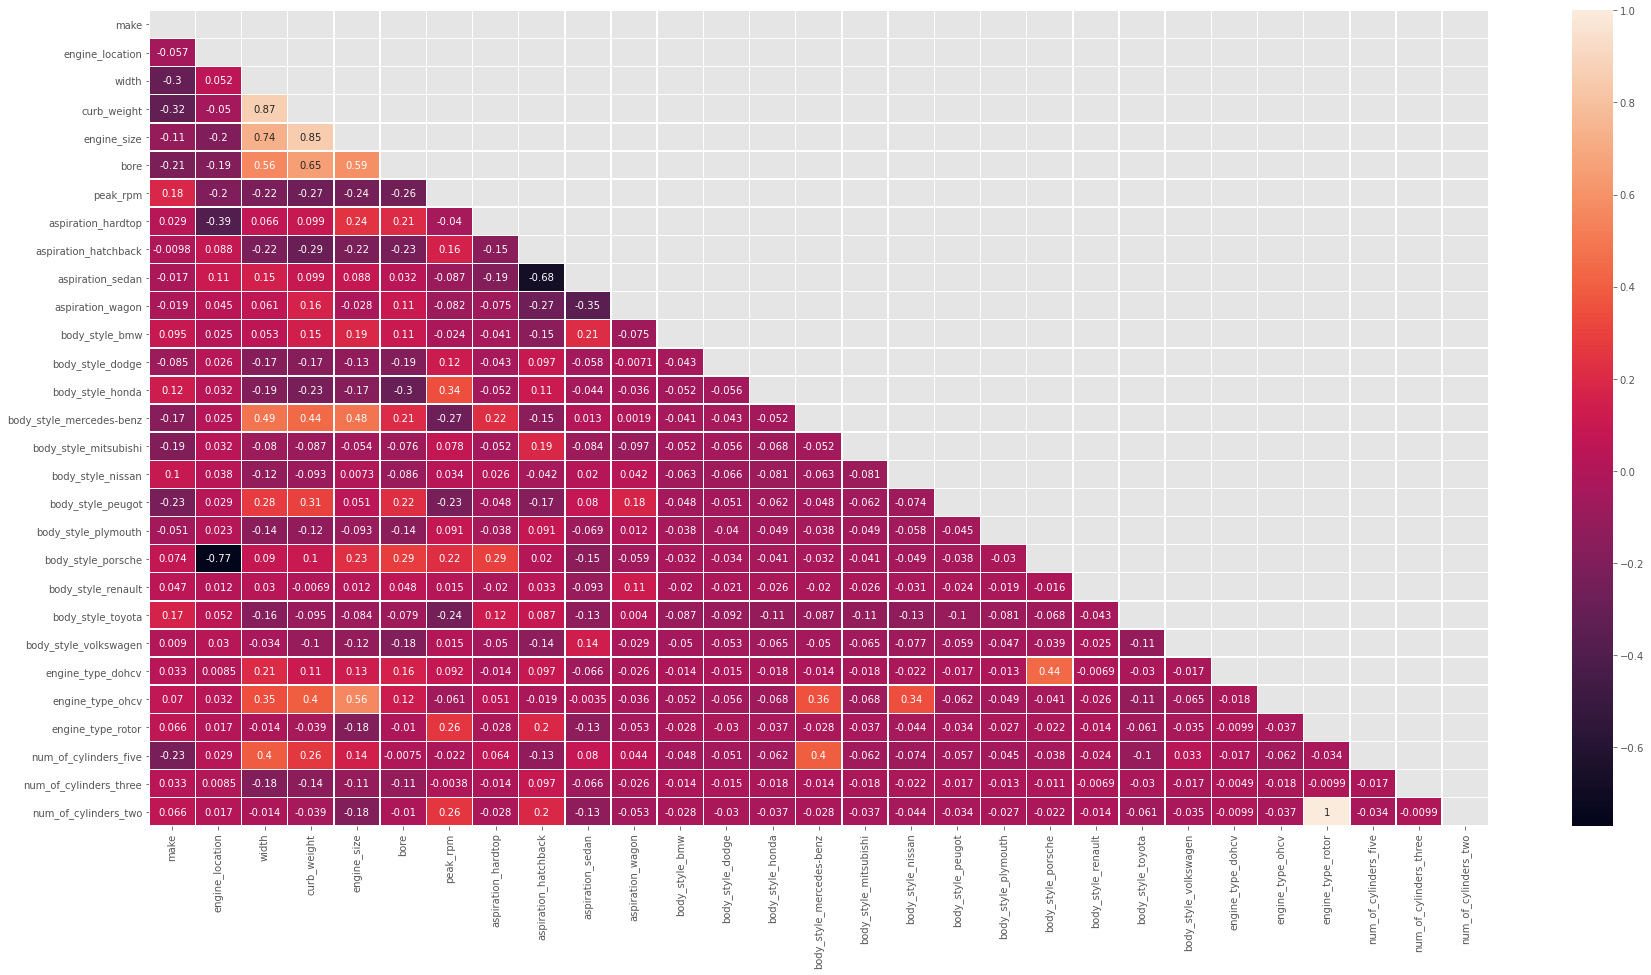

In [204]:
plt.figure(figsize=(30,15))
corr_back = X.corr()
mask = np.zeros_like(corr_back, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_back, mask=mask, annot=True, linewidth=0.5)
plt.show()

#### Variance Inflation Factor

In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vifm = [vif(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif':vifm}, index=Xc.columns)

vif
const                     5168.720919
make                         1.800820
engine_location              4.802789
width                        6.994659
curb_weight                 14.283776
engine_size                 11.979070
bore                         2.813403
peak_rpm                     1.983129
aspiration_hardtop           2.494619
aspiration_hatchback        10.526517
aspiration_sedan            10.921691
aspiration_wagon             5.395672
body_style_bmw               1.324524
body_style_dodge             1.408662
body_style_honda             1.693728
body_style_mercedes-benz     2.022618
body_style_mitsubishi        1.412289
body_style_nissan            1.572569
body_style_peugot            1.727479
body_style_plymouth          1.285276
body_style_porsche           5.398023
body_style_renault           1.073237
body_style_toyota            1.607194
body_style_volkswagen        1.287221
engine_type_dohcv            2.059330
engine_type_ohcv             2.571565
engine_type_rotor                 inf
num_of_cylinders_five        1.908268
num_of_cylinders_three       1.126002
num_of_cylinders_two              inf

#### Handling Multi-Coolinearity

In [206]:
X = X.drop(["engine_type_rotor"], axis=1)
Xc = Xc.drop(['engine_type_rotor'], axis=1)

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vifm = [vif(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif':vifm}, index=Xc.columns)

vif
const                     5168.720919
make                         1.800820
engine_location              4.802789
width                        6.994659
curb_weight                 14.283776
engine_size                 11.979070
bore                         2.813403
peak_rpm                     1.983129
aspiration_hardtop           2.494619
aspiration_hatchback        10.526517
aspiration_sedan            10.921691
aspiration_wagon             5.395672
body_style_bmw               1.324524
body_style_dodge             1.408662
body_style_honda             1.693728
body_style_mercedes-benz     2.022618
body_style_mitsubishi        1.412289
body_style_nissan            1.572569
body_style_peugot            1.727479
body_style_plymouth          1.285276
body_style_porsche           5.398023
body_style_renault           1.073237
body_style_toyota            1.607194
body_style_volkswagen        1.287221
engine_type_dohcv            2.059330
engine_type_ohcv             2.571565
num_of_cylinders_five        1.908268
num_of_cylinders_three       1.126002
num_of_cylinders_two         1.464036

In [208]:
X = X.drop(["curb_weight"], axis=1)
Xc = Xc.drop(['curb_weight'], axis=1)

# Most one-hot encoded columns show high degree of multi-coolinearity with other columns one hot-encoded columns.

In [209]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vifm = [vif(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif':vifm}, index=Xc.columns)

vif
const                     4533.601869
make                         1.484659
engine_location              4.791509
width                        5.890231
engine_size                  6.102772
bore                         2.767462
peak_rpm                     1.933081
aspiration_hardtop           2.382865
aspiration_hatchback        10.272001
aspiration_sedan            10.766659
aspiration_wagon             5.345740
body_style_bmw               1.319620
body_style_dodge             1.383966
body_style_honda             1.668180
body_style_mercedes-benz     2.009496
body_style_mitsubishi        1.391622
body_style_nissan            1.550207
body_style_peugot            1.498362
body_style_plymouth          1.276931
body_style_porsche           5.373871
body_style_renault           1.057610
body_style_toyota            1.574376
body_style_volkswagen        1.284280
engine_type_dohcv            2.055922
engine_type_ohcv             2.568249
num_of_cylinders_five        1.888893
num_of_cylinders_three       1.125792
num_of_cylinders_two         1.349545

In [210]:
X = X.drop(["aspiration_sedan"], axis=1)
Xc = Xc.drop(['aspiration_sedan'], axis=1)

In [211]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vifm = [vif(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif':vifm}, index=Xc.columns)

vif
const                     4487.901635
make                         1.482523
engine_location              4.744588
width                        5.650257
engine_size                  6.009526
bore                         2.744029
peak_rpm                     1.924062
aspiration_hardtop           1.401265
aspiration_hatchback         1.480705
aspiration_wagon             1.188601
body_style_bmw               1.304191
body_style_dodge             1.380462
body_style_honda             1.662717
body_style_mercedes-benz     1.951651
body_style_mitsubishi        1.389282
body_style_nissan            1.539769
body_style_peugot            1.495566
body_style_plymouth          1.274154
body_style_porsche           5.373443
body_style_renault           1.057584
body_style_toyota            1.573593
body_style_volkswagen        1.275536
engine_type_dohcv            2.054787
engine_type_ohcv             2.567878
num_of_cylinders_five        1.888806
num_of_cylinders_three       1.123801
num_of_cylinders_two         1.349334

In [212]:
# vif=1 is is ideal as it shows no multi-coolinearity, but vif<10 is acceptable.

### Linearity

In [213]:
%config InlineBackend.figure_format ='retina'
sns.mpl.rcParams['figure.figsize'] = (13.0, 6.0)

def linearity_test(linear_reg, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = linear_reg.predict()
    resids = linear_reg.resid

    fig, axes = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=axes[0], line_kws={'color': 'red'}, color="#47DBCD")
    axes[0].set_title('Observed vs. Predicted Values', fontsize=16)
    axes[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=axes[1], line_kws={'color': 'red'}, color="#F5B14C")
    axes[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    axes[1].set(xlabel='Predicted', ylabel='Residuals')
    
    plt.show()

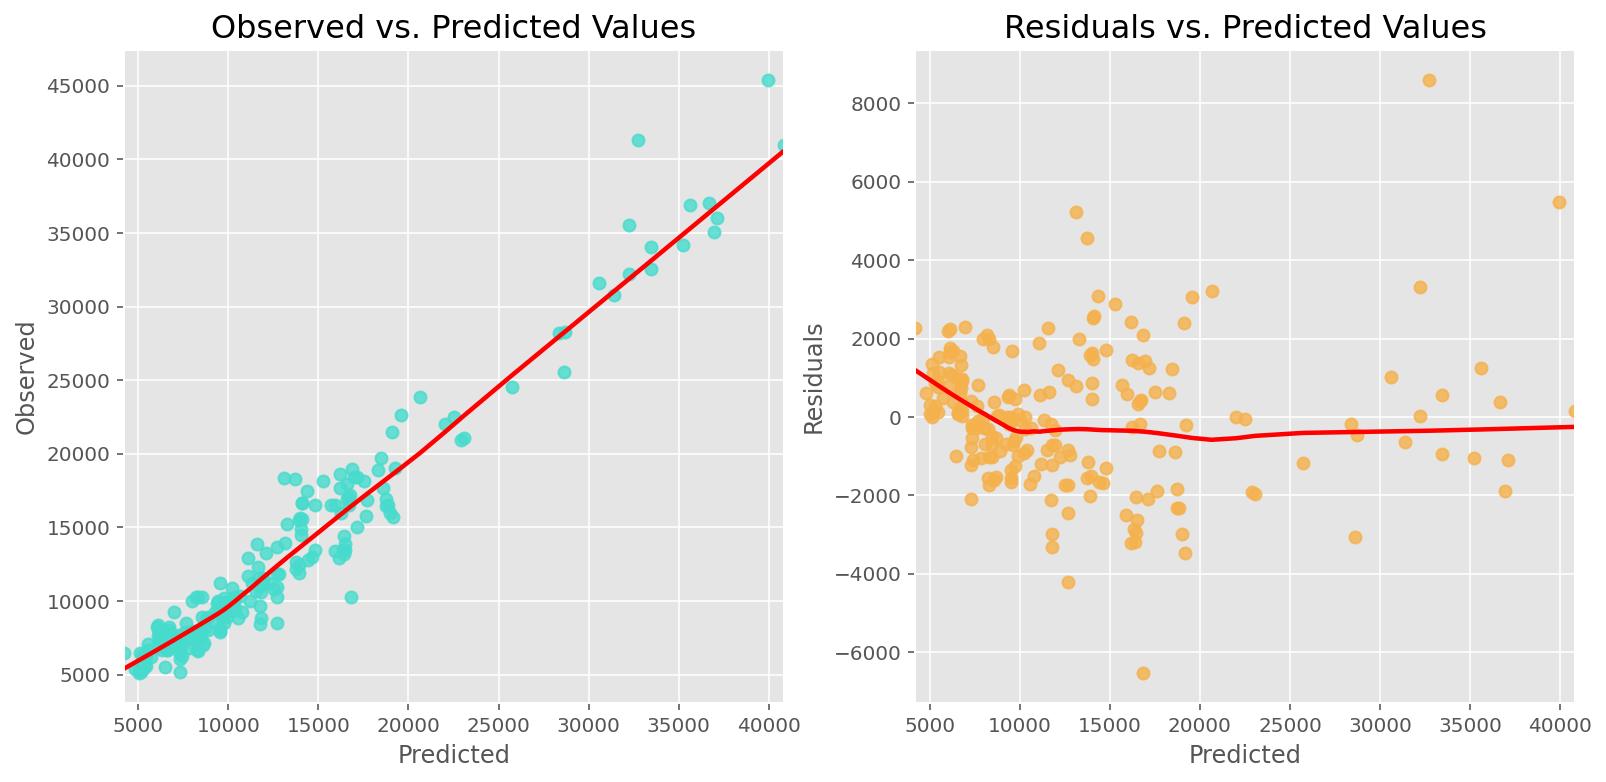

In [214]:
linearity_test(lr_ols, y) 

In [215]:
lr_ols.resid.mean()

1.6828225187321261e-09

In [216]:
# We see that the error is small, which means the model captures almost all the variation in the data.
# This is since the data has random pattern.

In [217]:
# We see that the data is randomly distributed across the regression line. 
# There seems to be no pattern in the data and the relationship between X and y is linear.

### Hetro-Scedasticity

In [218]:
# H0: σ is constant across the range of data. 
# H1: σ is not constant across the range of data
resids = lr_ols.resid
import statsmodels.stats.api as sms
name = ['F-statistic','p-value']
test = sms.het_goldfeldquandt(y=resids, x=Xc)
test

(0.4180689565249081, 0.9999520370203852, 'increasing')

In [219]:
# The data is definetely homo-scedastic.

### Autocorrelation

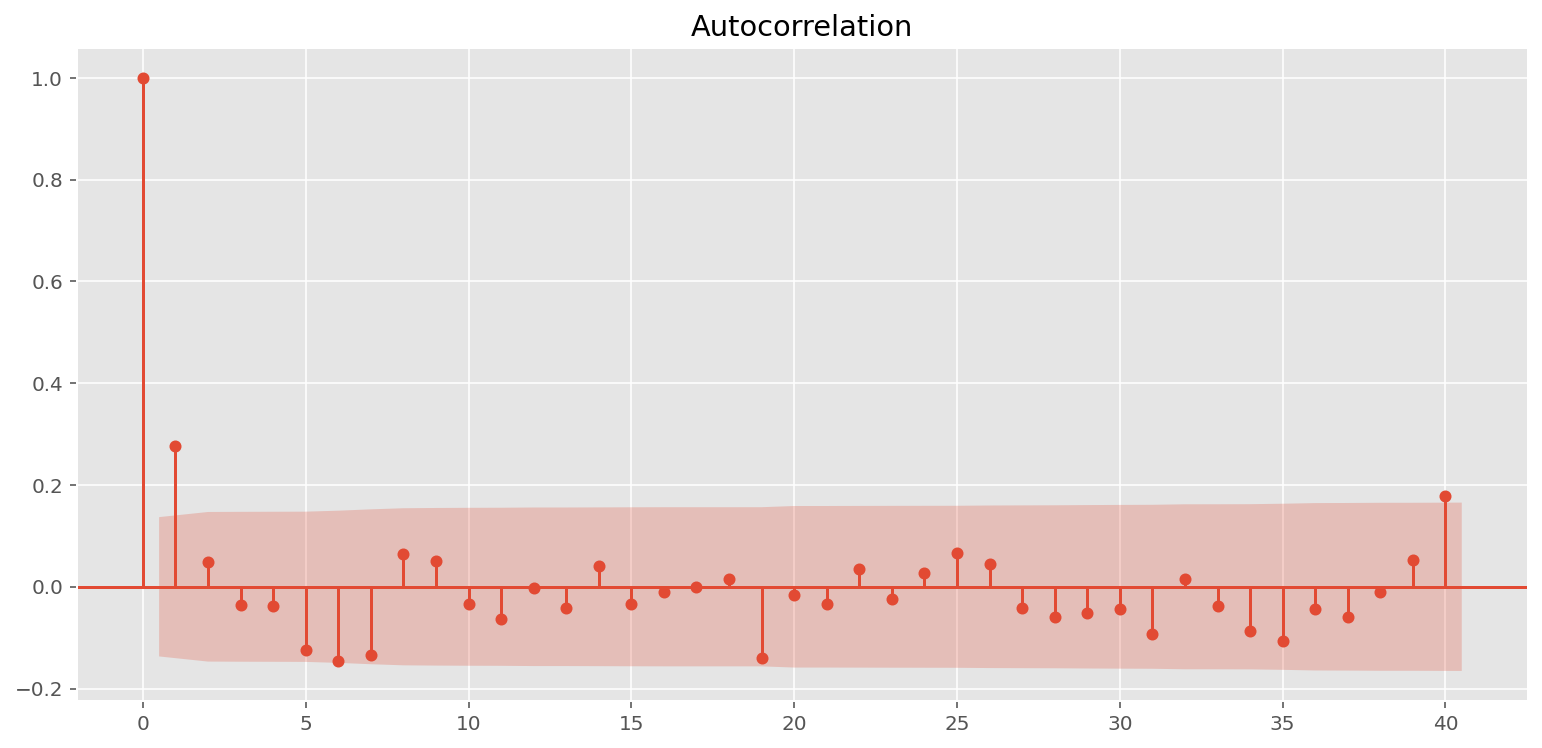

In [220]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lr_ols.resid, lags=40 , alpha=0.05)
acf.show()

In [221]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(lr_ols.resid)


1.4295951268740412

In [222]:
# There is no auto-correlation between values of residuals.

### Normality of Residuals

In [223]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)    # tests for normality using skewness and kurtosis (normal distr'n has skew=0, kurt=3)
    # h0: normal, h1: not normal
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')

Jarque-Bera test ---- statistic: 91.7494, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9647, p-value: 0.0001
Kolmogorov-Smirnov test ---- statistic: 0.4927, p-value: 0.0000
Anderson-Darling test ---- statistic: 0.8743, 5% critical value: 0.7720
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


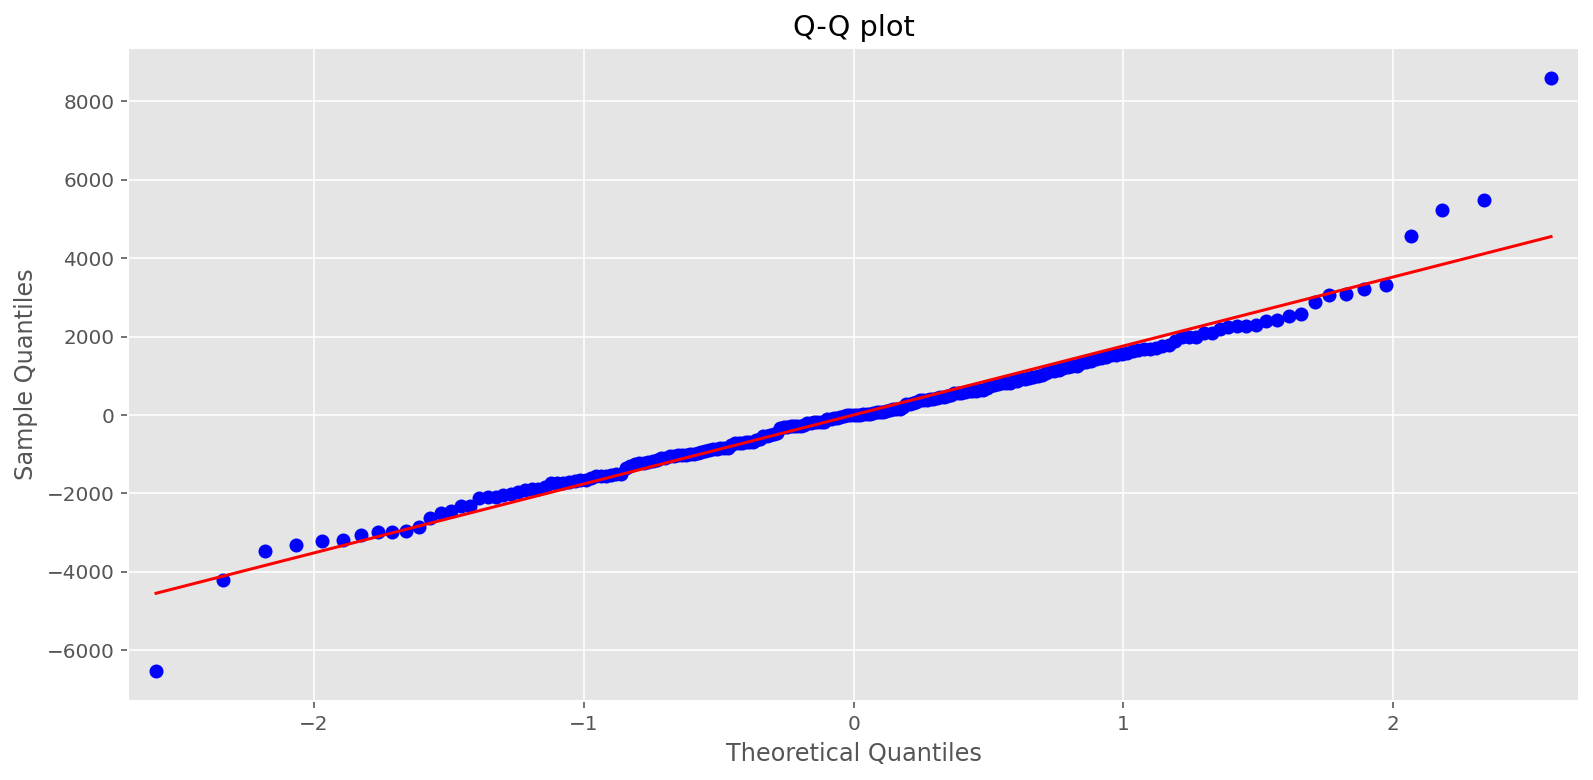

In [224]:
normality_of_residuals_test(lr_ols)

In [225]:
# The residuals are Non Normal.
# The reason can be the outlies in the data.

## Fit OLS Model

In [226]:
X.columns

Index(['make', 'engine_location', 'width', 'engine_size', 'bore', 'peak_rpm',
       'aspiration_hardtop', 'aspiration_hatchback', 'aspiration_wagon',
       'body_style_bmw', 'body_style_dodge', 'body_style_honda',
       'body_style_mercedes-benz', 'body_style_mitsubishi',
       'body_style_nissan', 'body_style_peugot', 'body_style_plymouth',
       'body_style_porsche', 'body_style_renault', 'body_style_toyota',
       'body_style_volkswagen', 'engine_type_dohcv', 'engine_type_ohcv',
       'num_of_cylinders_five', 'num_of_cylinders_three',
       'num_of_cylinders_two'],
      dtype='object')

In [227]:
Xc.columns

Index(['const', 'make', 'engine_location', 'width', 'engine_size', 'bore',
       'peak_rpm', 'aspiration_hardtop', 'aspiration_hatchback',
       'aspiration_wagon', 'body_style_bmw', 'body_style_dodge',
       'body_style_honda', 'body_style_mercedes-benz', 'body_style_mitsubishi',
       'body_style_nissan', 'body_style_peugot', 'body_style_plymouth',
       'body_style_porsche', 'body_style_renault', 'body_style_toyota',
       'body_style_volkswagen', 'engine_type_dohcv', 'engine_type_ohcv',
       'num_of_cylinders_five', 'num_of_cylinders_three',
       'num_of_cylinders_two'],
      dtype='object')

In [228]:
#constant is adding because of independent coefficient
#fitting the variables to model
# Xc = sm.add_constant(Xc) 
lr_ols = sm.OLS(y,Xc).fit()
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     113.1
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           1.21e-96
Time:                        11:53:50   Log-Likelihood:                -1836.1
No. Observations:                 205   AIC:                             3726.
Df Residuals:                     178   BIC:                             3816.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -5.221e+04   9426.980     -5.538      0.000   -7.08e+04   -3.36e+04
make                     -2085.5316    445.502     -4.681      0.000   -2964.677   -1206.386
engine_location          -8522.4027   2552.511     -3.339      0.001   -1.36e+04   -3485.325
width                      937.9236    156.307      6.001      0.000     629.471    1246.377
engine_size                123.0719      8.304     14.821      0.000     106.685     139.459
bore                     -3548.3169    862.713     -4.113      0.000   -5250.778   -1845.856
peak_rpm                     2.1922      0.410      5.344      0.000       1.383       3.002
aspiration_hardtop       -1303.8192    860.175     -1.516      0.131   -3001.272     393.634
aspiration_hatchback     -1073.3367    361.096     -2.972      0.003   -1785.917    -360.756
aspiration_wagon          -175.7214    468.831     -0.375      0.708   -1100.904     749.461
body_style_bmw            7260.0999    829.846      8.749      0.000    5622.499    8897.701
body_style_dodge         -3042.9723    806.989     -3.771      0.000   -4635.469   -1450.476
body_style_honda         -2912.6666    744.546     -3.912      0.000   -4381.940   -1443.393
body_style_mercedes-benz  7024.5686   1015.144      6.920      0.000    5021.302    9027.835
body_style_mitsubishi    -3946.4285    680.578     -5.799      0.000   -5289.468   -2603.389
body_style_nissan        -2108.4249    616.986     -3.417      0.001   -3325.974    -890.876
body_style_peugot        -1153.1799    763.678     -1.510      0.133   -2660.208     353.848
body_style_plymouth      -3211.3825    874.650     -3.672      0.000   -4937.400   -1485.365
body_style_porsche        5183.7737   2114.614      2.451      0.015    1010.835    9356.712
body_style_renault       -4753.8438   1472.309     -3.229      0.001   -7659.271   -1848.417
body_style_toyota        -1439.1480    486.354     -2.959      0.004   -2398.911    -479.385
body_style_volkswagen    -2058.8032    676.989     -3.041      0.003   -3394.761    -722.845
engine_type_dohcv        -2.242e+04   2895.163     -7.745      0.000   -2.81e+04   -1.67e+04
engine_type_ohcv         -2908.6868    925.273     -3.144      0.002   -4734.602   -1082.772
num_of_cylinders_five    -2755.3883    858.225     -3.211      0.002   -4448.993   -1061.783
num_of_cylinders_three    4118.7335   2141.087      1.924      0.056    -106.447    8343.914
num_of_cylinders_two      4953.9957   1181.780      4.192      0.000    2621.894    7286.097
==============================================================================
Omnibus:                       20.983   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.701
Skew:                           0.528   Prob(JB):       

In [229]:
X = X.drop(["aspiration_wagon"], axis=1)

In [230]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     118.2
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           1.18e-97
Time:                        11:53:50   Log-Likelihood:                -1836.2
No. Observations:                 205   AIC:                             3724.
Df Residuals:                     179   BIC:                             3811.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -5.21e+04   9399.934     -5.542      0.000   -7.06e+04   -3.35e+04
make                     -2091.5180    444.146     -4.709      0.000   -2967.953   -1215.083
engine_location          -8508.5815   2546.110     -3.342      0.001   -1.35e+04   -3484.329
width                      936.9586    155.910      6.010      0.000     629.300    1244.617
engine_size                123.3450      8.252     14.947      0.000     107.061     139.629
bore                     -3587.6151    854.259     -4.200      0.000   -5273.330   -1901.901
peak_rpm                     2.1954      0.409      5.366      0.000       1.388       3.003
aspiration_hardtop       -1267.2766    852.577     -1.486      0.139   -2949.672     415.119
aspiration_hatchback     -1038.7107    348.240     -2.983      0.003   -1725.894    -351.528
body_style_bmw            7283.0232    825.599      8.821      0.000    5653.863    8912.183
body_style_dodge         -3061.4416    803.547     -3.810      0.000   -4647.085   -1475.798
body_style_honda         -2925.4620    741.975     -3.943      0.000   -4389.606   -1461.318
body_style_mercedes-benz  7021.6639   1012.675      6.934      0.000    5023.348    9019.980
body_style_mitsubishi    -3947.5671    678.935     -5.814      0.000   -5287.313   -2607.821
body_style_nissan        -2123.5525    614.185     -3.458      0.001   -3335.527    -911.578
body_style_peugot        -1181.5079    758.102     -1.559      0.121   -2677.475     314.459
body_style_plymouth      -3235.4187    870.199     -3.718      0.000   -4952.587   -1518.251
body_style_porsche        5195.0920   2109.316      2.463      0.015    1032.768    9357.416
body_style_renault       -4827.4631   1455.641     -3.316      0.001   -7699.888   -1955.039
body_style_toyota        -1452.0960    483.960     -3.000      0.003   -2407.097    -497.095
body_style_volkswagen    -2051.2760    675.065     -3.039      0.003   -3383.385    -719.167
engine_type_dohcv        -2.243e+04   2888.052     -7.768      0.000   -2.81e+04   -1.67e+04
engine_type_ohcv         -2917.3238    922.762     -3.162      0.002   -4738.215   -1096.432
num_of_cylinders_five    -2772.9118    854.891     -3.244      0.001   -4459.872   -1085.951
num_of_cylinders_three    4107.7320   2135.740      1.923      0.056    -106.735    8322.199
num_of_cylinders_two      4957.8646   1178.894      4.206      0.000    2631.547    7284.183
==============================================================================
Omnibus:                       21.343   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.219
Skew:                           0.538   Prob(JB):                     3.05e-09
Kurtosis:                       4.853   Cond. No.                     

In [231]:
X = X.drop(["aspiration_hardtop"], axis=1)

In [232]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     122.2
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           3.14e-98
Time:                        11:53:50   Log-Likelihood:                -1837.4
No. Observations:                 205   AIC:                             3725.
Df Residuals:                     180   BIC:                             3808.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -5.352e+04   9382.764     -5.704      0.000    -7.2e+04    -3.5e+04
make                     -2109.7451    445.465     -4.736      0.000   -2988.751   -1230.739
engine_location          -7798.6075   2509.294     -3.108      0.002   -1.28e+04   -2847.192
width                      957.6226    155.810      6.146      0.000     650.174    1265.071
engine_size                122.1865      8.243     14.823      0.000     105.921     138.452
bore                     -3729.5736    851.751     -4.379      0.000   -5410.275   -2048.872
peak_rpm                     2.1905      0.410      5.337      0.000       1.381       3.000
aspiration_hatchback      -995.4209    348.184     -2.859      0.005   -1682.467    -308.374
body_style_bmw            7347.0859    827.239      8.881      0.000    5714.753    8979.419
body_style_dodge         -3106.4576    805.669     -3.856      0.000   -4696.229   -1516.687
body_style_honda         -2980.6072    743.533     -4.009      0.000   -4447.769   -1513.446
body_style_mercedes-benz  6731.7587    997.048      6.752      0.000    4764.353    8699.165
body_style_mitsubishi    -3983.5836    680.778     -5.852      0.000   -5326.916   -2640.251
body_style_nissan        -2221.0948    612.717     -3.625      0.000   -3430.127   -1012.063
body_style_peugot        -1189.4618    760.626     -1.564      0.120   -2690.352     311.428
body_style_plymouth      -3274.5519    872.718     -3.752      0.000   -4996.625   -1552.479
body_style_porsche        5228.0767   2116.273      2.470      0.014    1052.182    9403.972
body_style_renault       -4828.3025   1460.523     -3.306      0.001   -7710.251   -1946.354
body_style_toyota        -1581.9601    477.605     -3.312      0.001   -2524.385    -639.536
body_style_volkswagen    -2088.8267    676.854     -3.086      0.002   -3424.417    -753.237
engine_type_dohcv        -2.245e+04   2897.702     -7.749      0.000   -2.82e+04   -1.67e+04
engine_type_ohcv         -2824.1870    923.720     -3.057      0.003   -4646.899   -1001.475
num_of_cylinders_five    -2829.8871    856.895     -3.302      0.001   -4520.739   -1139.035
num_of_cylinders_three    4053.5734   2142.591      1.892      0.060    -174.253    8281.399
num_of_cylinders_two      4866.6651   1181.245      4.120      0.000    2535.796    7197.534
==============================================================================
Omnibus:                       20.530   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.775
Skew:                           0.507   Prob(JB):                     3.80e-09
Kurtosis:                       4.874   Cond. No.                     3.46e+05
==============================================================================

Warn

In [233]:
X = X.drop(["body_style_peugot"], axis=1)

In [234]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     126.4
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           9.19e-99
Time:                        11:53:50   Log-Likelihood:                -1838.8
No. Observations:                 205   AIC:                             3726.
Df Residuals:                     181   BIC:                             3805.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -4.907e+04   8977.686     -5.466      0.000   -6.68e+04   -3.14e+04
make                     -2054.1321    445.813     -4.608      0.000   -2933.791   -1174.473
engine_location          -7375.9673   2504.638     -2.945      0.004   -1.23e+04   -2433.923
width                      865.2063    144.742      5.978      0.000     579.608    1150.805
engine_size                125.0599      8.067     15.502      0.000     109.141     140.978
bore                     -3735.6969    855.136     -4.369      0.000   -5423.015   -2048.379
peak_rpm                     2.3256      0.403      5.773      0.000       1.531       3.121
aspiration_hatchback      -934.2528    347.358     -2.690      0.008   -1619.645    -248.861
body_style_bmw            7424.9831    829.028      8.956      0.000    5789.180    9060.786
body_style_dodge         -3118.4223    808.843     -3.855      0.000   -4714.397   -1522.448
body_style_honda         -3030.0358    745.821     -4.063      0.000   -4501.657   -1558.414
body_style_mercedes-benz  6982.6921    987.972      7.068      0.000    5033.268    8932.116
body_style_mitsubishi    -3924.1255    682.424     -5.750      0.000   -5270.656   -2577.595
body_style_nissan        -2208.2124    615.103     -3.590      0.000   -3421.908    -994.517
body_style_plymouth      -3286.3978    876.162     -3.751      0.000   -5015.204   -1557.592
body_style_porsche        5403.6580   2121.714      2.547      0.012    1217.183    9590.133
body_style_renault       -4691.6697   1463.717     -3.205      0.002   -7579.813   -1803.526
body_style_toyota        -1491.8151    476.003     -3.134      0.002   -2431.043    -552.587
body_style_volkswagen    -1954.7904    674.081     -2.900      0.004   -3284.858    -624.723
engine_type_dohcv        -2.227e+04   2906.786     -7.661      0.000    -2.8e+04   -1.65e+04
engine_type_ohcv         -2767.3081    926.682     -2.986      0.003   -4595.796    -938.820
num_of_cylinders_five    -2513.2537    835.948     -3.006      0.003   -4162.710    -863.797
num_of_cylinders_three    3796.1765   2144.772      1.770      0.078    -435.796    8028.149
num_of_cylinders_two      4956.0988   1184.561      4.184      0.000    2618.773    7293.424
==============================================================================
Omnibus:                       20.337   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.566
Skew:                           0.491   Prob(JB):                     2.56e-09
Kurtosis:                       4.915   Cond. No.                     3.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specif

In [235]:
X = X.drop(["num_of_cylinders_three"], axis=1)

In [236]:
#constant is adding because of independent coefficient
Xc = sm.add_constant(X) 
#fitting the variables to model
lr_ols = sm.OLS(y,Xc).fit()
#summary of the model
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     130.5
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           3.71e-99
Time:                        11:53:50   Log-Likelihood:                -1840.6
No. Observations:                 205   AIC:                             3727.
Df Residuals:                     182   BIC:                             3804.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -4.522e+04   8760.631     -5.162      0.000   -6.25e+04   -2.79e+04
make                     -2097.9981    447.724     -4.686      0.000   -2981.396   -1214.601
engine_location          -7173.5477   2516.643     -2.850      0.005   -1.21e+04   -2207.999
width                      808.3275    141.954      5.694      0.000     528.241    1088.414
engine_size                125.9364      8.099     15.549      0.000     109.956     141.917
bore                     -3831.6571    858.402     -4.464      0.000   -5525.356   -2137.959
peak_rpm                     2.3283      0.405      5.746      0.000       1.529       3.128
aspiration_hatchback      -891.0157    348.522     -2.557      0.011   -1578.680    -203.352
body_style_bmw            7367.7335    833.237      8.842      0.000    5723.687    9011.780
body_style_dodge         -3326.5923    804.922     -4.133      0.000   -4914.771   -1738.414
body_style_honda         -3215.4819    742.739     -4.329      0.000   -4680.968   -1749.996
body_style_mercedes-benz  7065.2144    992.637      7.118      0.000    5106.658    9023.771
body_style_mitsubishi    -4080.3807    680.643     -5.995      0.000   -5423.347   -2737.414
body_style_nissan        -2365.5107    612.205     -3.864      0.000   -3573.443   -1157.579
body_style_plymouth      -3487.7036    873.825     -3.991      0.000   -5211.833   -1763.574
body_style_porsche        5464.4703   2133.830      2.561      0.011    1254.245    9674.695
body_style_renault       -4737.3774   1472.039     -3.218      0.002   -7641.835   -1832.920
body_style_toyota        -1623.9967    472.854     -3.434      0.001   -2556.978    -691.015
body_style_volkswagen    -2058.0205    675.476     -3.047      0.003   -3390.792    -725.249
engine_type_dohcv        -2.209e+04   2921.953     -7.559      0.000   -2.79e+04   -1.63e+04
engine_type_ohcv         -2708.5274    931.497     -2.908      0.004   -4546.449    -870.606
num_of_cylinders_five    -2449.7839    840.058     -2.916      0.004   -4107.288    -792.280
num_of_cylinders_two      4876.0295   1190.613      4.095      0.000    2526.851    7225.208
==============================================================================
Omnibus:                       19.963   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.946
Skew:                           0.490   Prob(JB):                     5.75e-09
Kurtosis:                       4.866   Cond. No.                     3.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong m

In [237]:
X.shape

(205, 22)

In [238]:
# After handling multi-coolinearity and through Backward elimination, we have gove 22 X variables to predict y

# Linear Regression: Sklearn

In [239]:
# We will use the Predictors got from Backward Elimination to fit our model.

In [240]:
X_ols = X.copy()
y_ols = y.copy()
print(X_ols.shape)
print(y_ols.shape)

(205, 22)
(205,)


In [241]:
X_ols.head(4)

make  engine_location  width  engine_size  bore  peak_rpm  \
0     1                1   64.1          130  3.47    5000.0   
1     1                1   64.1          130  3.47    5000.0   
2     1                1   65.5          152  2.68    5000.0   
3     1                1   66.2          109  3.19    5500.0   

   aspiration_hatchback  body_style_bmw  body_style_dodge  body_style_honda  \
0                     0               0                 0                 0   
1                     0               0                 0                 0   
2                     1               0                 0                 0   
3                     0               0                 0                 0   

   body_style_mercedes-benz  body_style_mitsubishi  body_style_nissan  \
0                         0                      0                  0   
1                         0                      0                  0   
2                         0                      0                  0   
3                         0                      0                  0   

   body_style_plymouth  body_style_porsche  body_style_renault  \
0                    0                   0                   0   
1                    0                   0                   0   
2                    0                   0                   0   
3                    0                   0                   0   

   body_style_toyota  body_style_volkswagen  engine_type_dohcv  \
0                  0                      0                  0   
1                  0                      0                  0   
2                  0                      0                  0   
3                  0                      0                  0   

   engine_type_ohcv  num_of_cylinders_five  num_of_cylinders_two  
0                 0                      0                     0  
1                 0                      0                     0  
2                 1                      0                     0  
3                 0                      0                     0

In [242]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()#instantiate
X_scaled_ols = scaler.fit_transform(X_ols)
X_scaled_ols_df1 = pd.DataFrame(X_scaled_ols, columns=X_ols.columns)
X_scaled_ols_df1.head()

make  engine_location     width  engine_size      bore  peak_rpm  \
0   1.0              1.0  0.316667     0.260377  0.664286  0.346939   
1   1.0              1.0  0.316667     0.260377  0.664286  0.346939   
2   1.0              1.0  0.433333     0.343396  0.100000  0.346939   
3   1.0              1.0  0.491667     0.181132  0.464286  0.551020   
4   1.0              1.0  0.508333     0.283019  0.464286  0.551020   

   aspiration_hatchback  body_style_bmw  body_style_dodge  body_style_honda  \
0                   0.0             0.0               0.0               0.0   
1                   0.0             0.0               0.0               0.0   
2                   1.0             0.0               0.0               0.0   
3                   0.0             0.0               0.0               0.0   
4                   0.0             0.0               0.0               0.0   

   body_style_mercedes-benz  body_style_mitsubishi  body_style_nissan  \
0                       0.0                    0.0                0.0   
1                       0.0                    0.0                0.0   
2                       0.0                    0.0                0.0   
3                       0.0                    0.0                0.0   
4                       0.0                    0.0                0.0   

   body_style_plymouth  body_style_porsche  body_style_renault  \
0                  0.0                 0.0                 0.0   
1                  0.0                 0.0                 0.0   
2                  0.0                 0.0                 0.0   
3                  0.0                 0.0                 0.0   
4                  0.0                 0.0                 0.0   

   body_style_toyota  body_style_volkswagen  engine_type_dohcv  \
0                0.0                    0.0                0.0   
1                0.0                    0.0                0.0   
2                0.0                    0.0                0.0   
3                0.0                    0.0                0.0   
4                0.0                    0.0                0.0   

   engine_type_ohcv  num_of_cylinders_five  num_of_cylinders_two  
0               0.0                    0.0                   0.0  
1               0.0                    0.0                   0.0  
2               1.0                    0.0                   0.0  
3               0.0                    0.0                   0.0  
4               0.0                    1.0                   0.0

In [243]:
X_scaled_ols_df1.shape

(205, 22)

In [244]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_ols_df1, y_ols, test_size=0.2, random_state=90)

In [245]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("--------------------")
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (164, 22)
y_train:  (164,)
--------------------
X_test:  (41, 22)
y_test:  (41,)


In [246]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [247]:
y_pred_train = lr.predict(X_train)

In [248]:
y_pred_test = lr.predict(X_test)

In [249]:
# Train data
from sklearn.metrics import r2_score, mean_squared_error
print('R² of Train data:',r2_score(y_train, y_pred_train))
print('RMSE of Train data:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

R² of Train data: 0.9410239755513508
RMSE of Train data: 1890.9330981013456


In [250]:
# Test data
from sklearn.metrics import r2_score, mean_squared_error
print('R² of Test data:',r2_score(y_test, y_pred_test))
print('RMSE of Test data:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

R² of Test data: 0.9311198917828514
RMSE of Test data: 2136.944302430912


In [251]:
lr.coef_

array([ -2194.08149757,  -8528.24026215,  10042.16136694,  32484.52405752,
        -5260.38082198,   5483.40867702,   -825.54689997,   6521.21280857,
        -3019.59667041,  -3191.06064616,   7261.37632924,  -3893.59949684,
        -2376.13508011,  -2956.6351348 ,   5558.58943507,  -4615.74435612,
        -1561.45830161,  -1793.58357498, -22004.24032182,  -2450.38171934,
        -2397.11032726,   5462.44461351])

In [252]:
lr.intercept_

12518.935846044576

In [253]:
# Adjusted R-square: Train

Rsquare = lr.score(X_train, y_train)
N = 164
K = 22 # all the features, excluding the target variable

Adj_R_square = 1 - (1-Rsquare)*(N-1) / (N-K-1)
print("Value of Adjusted R square is ", Adj_R_square)

Value of Adjusted R square is  0.9318220426586536


In [254]:
# We get a Linear Regression model with 22 predictors to explain the variance in y (price of a car)
# The rsquare is 0.931 which is almost generalized when compared to the train data rsquare of 0.941
# Also we get a very close value for adjusted-Rsquare as 0.932 which is very close to R-square meaning that our model predictors are significant with the target
# Also, that they can explain the variance of the model upto 93 percent.
# The RMSE score is 2136.

# Feature Selection

## RFE

In [255]:
X = df1.drop("price", axis=1)
y = df1["price"]

In [256]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()#instantiate
X_scaled = scaler.fit_transform(X)
X_scaled_df1 = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df1.head()

symboling  normalized_losses  Fuel_type  make  num_of_doors  \
0        1.0           0.261780        1.0   1.0           0.0   
1        1.0           0.261780        1.0   1.0           0.0   
2        0.6           0.261780        1.0   1.0           0.0   
3        0.8           0.518325        1.0   1.0           1.0   
4        0.8           0.518325        1.0   1.0           1.0   

   engine_location  drive_wheels    length     width    height  curb_weight  \
0              1.0      0.058309  0.413433  0.316667  0.083333     0.411171   
1              1.0      0.058309  0.413433  0.316667  0.083333     0.411171   
2              1.0      0.230321  0.449254  0.433333  0.383333     0.517843   
3              1.0      0.384840  0.529851  0.491667  0.541667     0.329325   
4              1.0      0.373178  0.529851  0.508333  0.541667     0.518231   

   engine_size      bore    stroke  compression_ratio  horsepower  peak_rpm  \
0     0.260377  0.664286  0.290476             0.1250    0.262500  0.346939   
1     0.260377  0.664286  0.290476             0.1250    0.262500  0.346939   
2     0.343396  0.100000  0.666667             0.1250    0.441667  0.346939   
3     0.181132  0.464286  0.633333             0.1875    0.225000  0.551020   
4     0.283019  0.464286  0.633333             0.0625    0.279167  0.551020   

   city_mpg  highway_mpg  aspiration_hardtop  aspiration_hatchback  \
0  0.222222     0.289474                 0.0                   0.0   
1  0.222222     0.289474                 0.0                   0.0   
2  0.166667     0.263158                 0.0                   1.0   
3  0.305556     0.368421                 0.0                   0.0   
4  0.138889     0.157895                 0.0                   0.0   

   aspiration_sedan  aspiration_wagon  wheel_base_fwd  wheel_base_rwd  \
0               0.0               0.0             0.0             1.0   
1               0.0               0.0             0.0             1.0   
2               0.0               0.0             0.0             1.0   
3               1.0               0.0             1.0             0.0   
4               1.0               0.0             0.0             0.0   

   body_style_audi  body_style_bmw  body_style_chevrolet  body_style_dodge  \
0              0.0             0.0                   0.0               0.0   
1              0.0             0.0                   0.0               0.0   
2              0.0             0.0                   0.0               0.0   
3              1.0             0.0                   0.0               0.0   
4              1.0             0.0                   0.0               0.0   

   body_style_honda  body_style_isuzu  body_style_jaguar  body_style_mazda  \
0               0.0               0.0                0.0               0.0   
1               0.0               0.0                0.0               0.0   
2               0.0               0.0                0.0               0.0   
3               0.0               0.0                0.0               0.0   
4               0.0               0.0                0.0               0.0   

   body_style_mercedes-benz  body_style_mercury  body_style_mitsubishi  \
0                       0.0                 0.0                    0.0   
1                       0.0                 0.0                    0.0   
2                       0.0                 0.0                    0.0   
3                       0.0                 0.0                    0.0   
4                       0.0                 0.0                    0.0   

   body_style_nissan  body_style_peugot  body_style_plymouth  \
0                0.0                0.0                  0.0   
1                0.0                0.0                  0.0   
2                0.0                0.0                  0.0   
3                0.0                0.0                  0.0   
4                0.0                0.0                  0.0   

   body_style_porsche  body_

In [257]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df1, y, test_size=0.2, random_state=90)

In [258]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("--------------------")
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (164, 65)
y_train:  (164,)
--------------------
X_test:  (41, 65)
y_test:  (41,)


In [259]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

n_features_list = list(range(1, 66)) #checking for optimal number of features between 4 to 30
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(1, 66):

    # RFE with n features
    lm = LinearRegression()

    # specifying number of features
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # selecting features selected by rfe_n
    col_n = X_train.columns[rfe_n.support_] #rfe_n.support_: returns an array with boolean values to indicate whether 
    #an attribute was selected using RFE

    # training & test data for n selected columns
    X_train_rfe_n = X_train[col_n]
    X_test_rfe_n = X_test[col_n]


    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    
    
    # fitting the model with n featues
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    
    
    # # Making predictions
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    
    
    #Calculating evaluation metrics
    
    #R-square
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    #RMSE/stan. error
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)

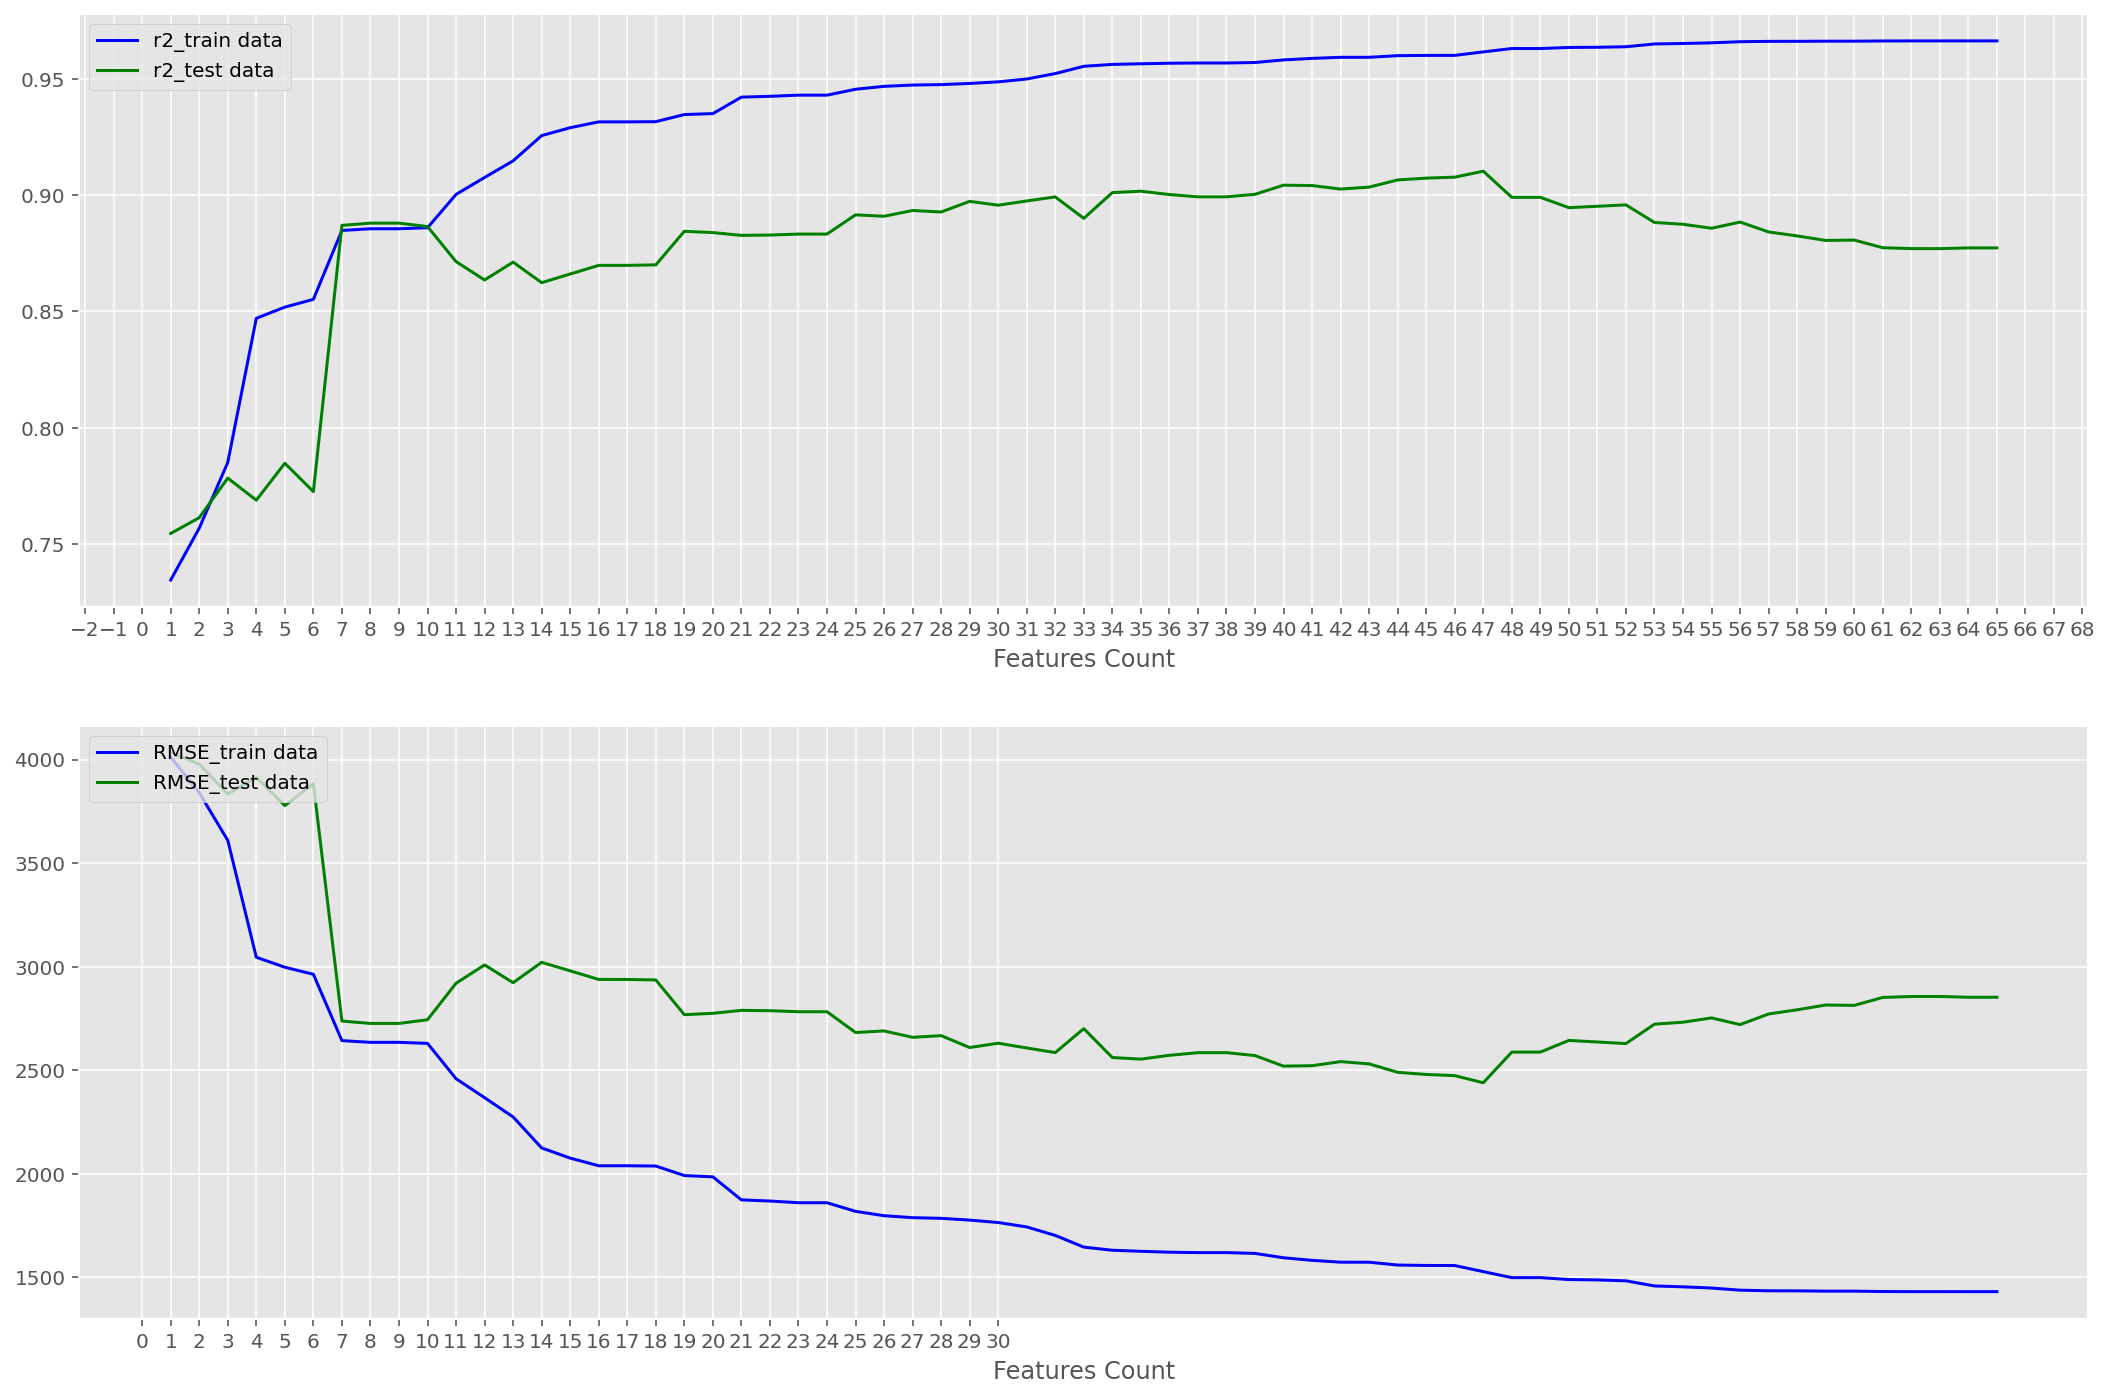

In [260]:
# plotting r2 and RMSE against n_features
import matplotlib.ticker as plticker

fig,ax=plt.subplots(2,1,figsize=(18, 12))
ax[0].plot(n_features_list, train_r2,'b', label="r2_train data")
ax[0].plot(n_features_list, test_r2,'g', label="r2_test data")
ax[0].set_xlabel('Features Count')

ax[0].legend(loc='upper left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc) #method 1 of ticks

ax[1].plot(n_features_list, train_RMSE, 'b',label="RMSE_train data")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE_test data")
ax[1].set_xlabel('Features Count')


ax[1].legend(loc='upper left')
plt.xticks(np.arange(0, 31, step=1))#method 2 of ticks

plt.show()

In [261]:
lm=LinearRegression()
rfe=RFE(lm,7)
rfe.fit(X_train,y_train)

col=X_train.columns[rfe.support_] #obtaining fetaure names of 7 most imp 

#making new Df's with  12 most imp features as per RFE algorithm
X_train_7= X_train[col]
X_test_7 = X_test[col]


# add a constant to the model
X_train_7 = sm.add_constant(X_train_7,has_constant='add')
X_test_7 = sm.add_constant(X_test_7,has_constant='add')


#fit OLS model
lm_sm=sm.OLS(y_train,X_train_7).fit()


#making predictions
y_pred_train=lm_sm.predict(X_train_7)
y_pred_test=lm_sm.predict(X_test_7)


#evlaution metrics

#R-sqaure
train_r2=lm_sm.rsquared
test_r2=r2_score(y_pred_test, y_test)

#RMSE/stan. error
error_test=y_pred_test-y_test
error_train=y_pred_train-y_train
    
test_RMSE=(((error_test**2).mean())**0.5)
train_RMSE=(((error_train**2).mean())**0.5)

print('----------------------R-sqaure-------------------------------------------')
print("R-sq for test data is {}".format(test_r2))
print("R-sq for train data is {}".format(train_r2))


print('----------------------STANDARD ERROR/RMSE-------------------------------------------')
print("RMSE for test data is {}".format(test_RMSE))
print("RMSE for train data is {}".format(train_RMSE))

print(" ")
print(lm_sm.summary())

----------------------R-sqaure-------------------------------------------
R-sq for test data is 0.8649863555807658
R-sq for train data is 0.8847694745055994
----------------------STANDARD ERROR/RMSE-------------------------------------------
RMSE for test data is 2737.654877391432
RMSE for train data is 2643.1522993421836
 
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     171.1
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           8.01e-70
Time:                        11:53:55   Log-Likelihood:                -1525.0
No. Observations:                 164   AIC:                             3066.
Df Residuals:                     156   BIC:                             3091.
Df Model:                           7     

In [262]:
# We get the best R-score with 7 variables
# Which gives a better R-suare on the test data than train, but in comparison with OLS obtained 22 features there is a drop in the R-square and adjusted R-square
# The model is however generalized.

In [263]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=7)
rfe.fit(X_train, y_train)
y_train_pred_rfe_l_2 = rfe.predict(X_train)
y_test_pred_rfe_l_2 = rfe.predict(X_test)
print('R² of Train data:',r2_score(y_train, y_train_pred_rfe_l_2))
print('RMSE of Train data:',np.sqrt(mean_squared_error(y_train, y_train_pred_rfe_l_2)))
print('R² of Test data:',r2_score(y_test, y_test_pred_rfe_l_2))
print('RMSE of Test data:',np.sqrt(mean_squared_error(y_test, y_test_pred_rfe_l_2)))

R² of Train data: 0.8847694745055994
RMSE of Train data: 2643.1522993421836
R² of Test data: 0.8869514982540548
RMSE of Test data: 2737.65487739143


In [264]:
# Adjusted R-square: Train

Rsquare = rfe.score(X_train, y_train)
N = 164
K = 7 # all the features, excluding the target variable

Adj_R_square = 1 - (1-Rsquare)*(N-1) / (N-K-1)
print("Value of Adjusted R square is ", Adj_R_square)

Value of Adjusted R square is  0.8795988740026455


In [265]:
rfe.support_

array([False, False, False, False, False,  True, False,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [266]:
rfe.ranking_

array([44, 55, 12, 41, 47,  1,  4,  1,  1, 45,  1,  1, 33, 10, 11, 40, 28,
       57, 39, 38, 34, 36, 35, 49, 42, 56,  1, 22, 23, 24, 48, 54, 20,  9,
       14, 19, 25,  5, 21, 30, 17, 46,  2, 15, 26, 27,  1, 31, 51,  3, 13,
       37,  8,  7,  6, 32, 52, 43, 50, 29, 18, 59, 58, 53, 16])

In [267]:
rf = pd.DataFrame(rfe.ranking_, columns=['selected'], index=X_train.columns)
rf.sort_values(by=['selected'])

selected
body_style_bmw                   1
engine_size                      1
curb_weight                      1
engine_type_dohcv                1
length                           1
width                            1
engine_location                  1
body_style_subaru                2
engine_type_ohcf                 3
drive_wheels                     4
body_style_peugot                5
num_of_cylinders_six             6
num_of_cylinders_four            7
num_of_cylinders_five            8
body_style_mercedes-benz         9
stroke                          10
compression_ratio               11
Fuel_type                       12
engine_type_ohcv                13
body_style_mercury              14
body_style_toyota               15
fuel_system_spfi                16
body_style_renault              17
fuel_system_idi                 18
body_style_mitsubishi           19
body_style_mazda                20
body_style_plymouth             21
body_style_chevrolet            22
body_style_dodge                23
body_style_honda                24
body_style_nissan               25
body_style_volkswagen           26
body_style_volvo                27
peak_rpm                        28
fuel_system_4bbl                29
body_style_porsche              30
engine_type_l                   31
num_of_cylinders_three          32
bore                            33
aspiration_hatchback            34
aspiration_wagon                35
aspiration_sedan                36
engine_type_rotor               37
aspiration_hardtop              38
highway_mpg                     39
horsepower                      40
make                            41
wheel_base_rwd                  42
num_of_cylinders_two            43
symboling                       44
height                          45
body_style_saab                 46
num_of_doors                    47
body_style_isuzu                48
wheel_base_fwd                  49
fuel_system_2bbl                50
engine_type_ohc                 51
num_of_cylinders_twelve         52
fuel_system_spdi                53
body_style_jaguar               54
normalized_losses               55
body_style_audi                 56
city_mpg                        57
fuel_system_mpfi                58
fuel_system_mfi                 59

# Regularization

In [268]:
# Since we get a much better result using Backward Elimination using OLS, we will use the 22 predictors as input to regualrization.

In [269]:
X_ols.shape

(205, 22)

In [270]:
y_ols.shape

(205,)

In [271]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()#instantiate
X_scaled_ols = scaler.fit_transform(X_ols)
X_scaled_ols_df1 = pd.DataFrame(X_scaled_ols, columns=X_ols.columns)
X_scaled_ols_df1.head()

make  engine_location     width  engine_size      bore  peak_rpm  \
0   1.0              1.0  0.316667     0.260377  0.664286  0.346939   
1   1.0              1.0  0.316667     0.260377  0.664286  0.346939   
2   1.0              1.0  0.433333     0.343396  0.100000  0.346939   
3   1.0              1.0  0.491667     0.181132  0.464286  0.551020   
4   1.0              1.0  0.508333     0.283019  0.464286  0.551020   

   aspiration_hatchback  body_style_bmw  body_style_dodge  body_style_honda  \
0                   0.0             0.0               0.0               0.0   
1                   0.0             0.0               0.0               0.0   
2                   1.0             0.0               0.0               0.0   
3                   0.0             0.0               0.0               0.0   
4                   0.0             0.0               0.0               0.0   

   body_style_mercedes-benz  body_style_mitsubishi  body_style_nissan  \
0                       0.0                    0.0                0.0   
1                       0.0                    0.0                0.0   
2                       0.0                    0.0                0.0   
3                       0.0                    0.0                0.0   
4                       0.0                    0.0                0.0   

   body_style_plymouth  body_style_porsche  body_style_renault  \
0                  0.0                 0.0                 0.0   
1                  0.0                 0.0                 0.0   
2                  0.0                 0.0                 0.0   
3                  0.0                 0.0                 0.0   
4                  0.0                 0.0                 0.0   

   body_style_toyota  body_style_volkswagen  engine_type_dohcv  \
0                0.0                    0.0                0.0   
1                0.0                    0.0                0.0   
2                0.0                    0.0                0.0   
3                0.0                    0.0                0.0   
4                0.0                    0.0                0.0   

   engine_type_ohcv  num_of_cylinders_five  num_of_cylinders_two  
0               0.0                    0.0                   0.0  
1               0.0                    0.0                   0.0  
2               1.0                    0.0                   0.0  
3               0.0                    0.0                   0.0  
4               0.0                    1.0                   0.0

In [272]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_ols_df1, y_ols, test_size=0.2, random_state=90)

In [273]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("--------------------")
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (164, 22)
y_train:  (164,)
--------------------
X_test:  (41, 22)
y_test:  (41,)


## Ridge

In [274]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train , y_train)

Ridge()

In [275]:
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)
print('R² of Train data:',r2_score(y_train, y_train_pred_ridge))
print('RMSE of Train data:',np.sqrt(mean_squared_error(y_train, y_train_pred_ridge)))
print('R² of Test data:',r2_score(y_test, y_test_pred_ridge))
print('RMSE of Test data:',np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)))

R² of Train data: 0.9015740298730115
RMSE of Train data: 2442.830135051333
R² of Test data: 0.8896333339478305
RMSE of Test data: 2704.9874483180442


## Lasso

In [276]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [277]:
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)
print('R² of Train data:',r2_score(y_train, y_train_pred_lasso))
print('RMSE of Train data:',np.sqrt(mean_squared_error(y_train, y_train_pred_lasso)))
print('R² of Test data:',r2_score(y_test, y_test_pred_lasso))
print('RMSE of Test data:',np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)))

R² of Train data: 0.9409909222105596
RMSE of Train data: 1891.4629142581534
R² of Test data: 0.9307979285021916
RMSE of Test data: 2141.932792554529


In [278]:
# Lasso performs better than Ridge, however the model derived from ols using backward elimination used to build the model prove to be most useful.
# In terms of high R_square, high adj_Rsquare, minimum RMSE and generalization between train and test data.
# R² of Test data: 0.9311198917828514
# RMSE of Test data: 2136.944302430912

# The most significant predictoras of car price are:
# 'make', 'engine_location', 'width', 
#'engine_size', 'bore', 'peak_rpm', 'aspiration_hatchback', 'body_style_bmw', 'body_style_dodge',
# 'body_style_honda', 'body_style_mercedes-benz', 'body_style_mitsubishi',
# 'body_style_nissan', 'body_style_plymouth', 'body_style_porsche',
#  'body_style_renault', 'body_style_toyota', 'body_style_volkswagen',
# 'engine_type_dohcv', 'engine_type_ohcv', 'num_of_cylinders_five','num_of_cylinders_two'